# Metaheuristics Exam
# João Luis Brasil Gondim

## Part 2: Continuous optimization

<font size="3">The PSO algorithm has some parameters to tune: the inertia factor (W), the self confidence factor (c1), the swarm confidence factor (c2) and the number of particles.<p> In order to search for the best alternative in the domain of these parameters, I built a Hyperparameter Optimizer, <b>class HO_PSO_hyperparameter_optimizer(), that uses a 2-step grid search algorithm</b>:<p>
- <u>First step:</u> the <b>grid_search_candidates() method</b> runs different parameter combinations and store them along with their fitness result.<p>
- <u>Second step:</u> the <b>select_best_candidate() method</b> runs each candidate (usually the six ones with best fitness in the first step) several times (usually 10 times) and computes the minimal, maximal, average and standard deviation fitness.<p>
The optimal parameter combination was chosen among the candidates with smallest average and standard deviation fitness.<p>

<font size="3">The following sections show the execution of the PSO algorithm for the best parameter alternative chosen for each problem and number of dimensions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import datetime

In [4]:
# Shifts

sphere = np.array([
97.24993590965357300000	    ,	77.06098501613456600000     ,	-19.03114880399589000000	,	25.42869799694116800000	,	-22.90880262549710300000	,	69.57217579469019600000	,	5.36971392621788370000	,	61.48073069080828600000	,	-21.30069854316695900000	,	92.34681338401503600000	,	-93.97588122564035000000	,	90.74598676939245900000	,	42.87698026959782300000	,	29.30964629938293300000	,	-10.66954845459112300000	,	-65.07461779584801300000	,	67.04941630852383100000	,	94.01877030471266000000	,	-73.00502019122909300000	,	-49.80219854393570200000	,	82.00142499321935900000	,	35.29318272568596600000	,	24.63214921806896000000	,	2.44313746870940920000	,	-99.30345089151904900000	,	-54.62233878006055900000	,	95.69145814488834400000	,	72.25048084393671400000	,	-97.12295522295288200000	,	-2.84462701932042710000	,	-16.71940701162688500000	,	54.58048362315878400000	,	-2.37049344720678330000	,	4.51291384961226070000	,	56.40988583280474700000	,	18.24586955813296600000	,	-74.72144480585325300000	,	-78.05614655111506300000	,	32.58107757924415200000	,	99.41862299092051100000	,	-30.76381166032487600000	,	-64.78909692160539200000	,	-86.42220774684709300000	,	-38.12082265661986500000	,	-33.04804035360201900000	,	-24.76648648072296100000	,	90.44136625242035200000	,	43.86410226026328000000	,	55.86848705729144600000	,	23.53173226692698000000	,	29.84766683958318400000	,	51.25666093528096200000	,	-70.43316211574477800000	,	19.89073552695180100000	,	79.72173786670555300000	,	-65.61342888884523500000	,	63.78562161574140500000	,	-86.14124825380231700000	,	91.13745240182416300000	,	-36.53243248356071900000	,	-98.95976530996462400000	,	51.98710144331872100000	,	-38.26403602795727500000	,	43.05113500849307700000	,	-83.81049636930025300000	,	69.17558481595747800000	,	43.67524066255938900000	,	74.07859960382373300000	,	74.43193847322515900000	,	52.31264480608896900000	,	33.89129180064085700000	,	80.40565424264377700000	,	64.29246395985669000000	,	66.53145387977843900000	,	27.98358669457721200000	,	-68.75913548407889700000	,	56.63358891049304600000	,	46.28107962319185700000	,	12.94639203089067800000	,	44.66985190810865400000	,	-52.05238075825224800000	,	-2.02829331827740590000	,	-15.27946394354836500000	,	59.13551043862307200000	,	52.68199692610483000000	,	-52.22223889011473800000	,	27.02186596243446100000	,	-53.69095731991106400000	,	23.18763620963098000000	,	-46.29908950168676500000	,	98.24262957199073300000	,	52.06377469815248600000	,	-3.56652609969421520000	,	89.04006716883324700000	,	-27.85234608315173000000	,	-83.12179278970515400000	,	89.70270649541137700000	,	38.16549772048793400000	,	23.10171739480442500000	,	78.99561181861344000000	,
-97.49235781815141900000	,	-39.81759244665622800000	,	93.01615151458622700000	    ,	-79.58189364479054000000	,	19.20434519560116400000	,	-6.20446461109965240000	,	43.46512790033281700000	,	71.77418665060116600000	,	-62.88031805830194500000	,	-7.52500587978993000000	,	80.65995193805525800000	,	-95.57909825978666200000	,	52.08123068245876700000	,	59.17039996711383800000	,	-37.22981867102029700000	,	-52.83496064108958700000	,	-1.10964319252536820000	,	37.05089124051562500000	,	88.92673883020552200000	,	-12.13761636172732500000	,	-0.51312950708378935000	,	-80.27641534655981600000	,	10.88750298986855100000	,	-12.86113608232777500000	,	-63.74708542625897700000	,	-69.23763774266318200000	,	86.74587574527421900000	,	-72.74687803096414000000	,	99.70899935097551700000	,	38.12412523200211500000	,	92.20849118145670800000	,	55.10030133676218600000	,	-99.85517322512082200000	,	-34.90571766924075800000	,	8.82072627822991250000	,	-38.69873620893375900000	,	34.54077799464138800000	,	-30.85733574867262500000	,	96.11988328018659900000	,	-29.20633801176134600000	,	-96.09690425027751800000	,	62.55041033617806100000	,	96.56288746150539700000	,	-37.63283835003192500000	,	-24.21831355716469100000	,	49.60588943995483600000	,	-11.43398464858445600000	,	-80.02169984880056600000	,	98.52449028298639200000	,	7.25239184757784020000	,	-73.09040635953140000000	,	-73.73999907228132100000	,	72.79873603508286800000	,	41.65449704336006700000	,	99.64813946569225300000	,	63.15138329358606500000	,	56.44797301426422100000	,	52.72314983280077200000	,	80.99504852550765600000	,	-79.37562575095938700000	,	-57.65792487909280300000	,	70.21772370979999800000	,	48.59303214600944900000	,	-18.98579993986609800000	,	-38.99163748241761600000	,	-5.16100516872300830000	,	-71.05246684708896500000	,	-1.13196998028767840000	,	6.02484762064253230000	,	2.04848517008362310000	,	-54.50616909862967700000	,	86.99878289473733200000	,	3.53841681865669950000	,	-8.14781920164118390000	,	55.34759804937132800000	,	46.76064918217531400000	,	20.47638482621165700000	,	-88.61419388788037600000	,	-85.59936016837689000000	,	27.13632695164240300000	,	75.26676447007594100000	,	-14.50411139227463800000	,	41.68068389222762000000	,	-85.96197595053502000000	,	-96.18696774198319600000	,	1.66197114043225720000	,	73.88119843077100800000	,	59.70980236526125400000	,	59.84681121496655000000	,	-60.77733983319829700000	,	42.87487476805733900000	,	-56.99831487075532300000	,	57.30148415664177700000	,	-65.57049470329903300000	,	-58.77055395473770000000	,	-7.10516181400907950000	,	-85.09469902178732100000	,	19.31610200840442800000	,	-61.80190642381895600000	,	86.96347319841376600000	,
-38.49749884025003200000	,	-7.62157599690188190000	    ,	65.95065661925761400000     ,	-39.97249875193823200000	,	41.92397033974751300000	,	-85.07978509149666000000	,	50.04316260071533400000	,	-6.21891961570904070000	,	88.98279298172431600000	,	-97.20522037062968900000	,	-89.16023096382825500000	,	47.68977344570851100000	,	27.11301611807175500000	,	86.19443924789692300000	,	-7.80787892008540040000	,	2.57798871436938270000	,	-15.10377742583499100000	,	-16.81661272875601300000	,	-22.35314324942116600000	,	71.10744173135051900000	,	64.60378242195795900000	,	82.78206951585093500000	,	67.20838827931737600000	,	73.61751737539700000000	,	55.11745119722596100000	,	-13.61441524813103900000	,	-12.78040275819448400000	,	-55.13905478392133100000	,	-97.36313194840487000000	,	-24.80674999069258000000	,	67.71246220983275100000	,	-42.75133257233958500000	,	-43.17417427877284600000	,	-34.58393101868755100000	,	-4.75814793744594060000	,	-54.80333094806282900000	,	92.40123913786831600000	,	-38.70835495960977100000	,	55.78511705051215600000	,	79.06848866780734400000	,	-49.25533619683740500000	,	-70.84933252614011700000	,	-31.70074547788492200000	,	46.62693698118863500000	,	-93.22721735410210900000	,	8.84775196171983680000	,	11.68908008292062600000	,	33.93674447251407900000	,	16.78538450494538400000	,	37.18181772986596900000	,	53.19677356418623000000	,	79.53242319958062000000	,	93.35793403569508100000	,	81.15870580045310600000	,	-64.28412282628079300000	,	95.69760550024915300000	,	79.59714847953333100000	,	-94.12771936779242300000	,	-43.59552874637814300000	,	-62.41977029388565500000	,	21.75070181052409200000	,	-58.12912338697452000000	,	99.54693278957125800000	,	-96.64763586482638400000	,	-12.07436783635719700000	,	-70.32096206631598500000	,	24.28918727452192200000	,	50.87375697663614500000	,	-43.88060949637996100000	,	5.43593638943180220000	,	-37.51188408691847100000	,	-63.65182631423304800000	,	55.85058880170478800000	,	61.90181252802094000000	,	44.66258926442589000000	,	-90.93810202739528800000	,	22.65995004787527000000	,	-32.95702219867646900000	,	16.77251890717583600000	,	82.63556229819127500000	,	0.25449912911706463000	,	-16.49809138116450000000	,	59.89150083561116800000	,	78.12183232356542800000	,	2.67066641660080960000	,	-22.05470757940591400000	,	86.12774026868871100000	,	-43.45357000930668800000	,	53.98742866827299700000	,	45.51664256360621200000	,	82.92159945599655700000	,	-78.77591751193725100000	,	77.78752210495335400000	,	19.00808932987052900000	,	-97.58400883280657500000	,	-52.33712471639634600000	,	-75.27522954019370600000	,	76.15686282581836500000	,	62.64645530163565500000	,	52.66766096653998400000	,
62.07741442828748300000	    ,	36.45077351273460000000     ,	24.96041394745942900000     ,	-26.38429171436752100000	,	-59.44395732876611800000	,	-44.98975713146946700000	,	-3.69122686250716470000	,	-19.96175103488795300000	,	40.45916687903343200000	,	-35.72781039873778800000	,	-90.30936674815423300000	,	55.49723557611773100000	,	10.68057462331815100000	,	-86.45012992781835200000	,	-0.76469971949782689000	,	67.22103542445029200000	,	-7.81317963735759240000	,	56.00508038971503300000	,	-1.65122658894387090000	,	39.14279211585812800000	,	97.01238060439811800000	,	-29.36554803071439300000	,	24.39833417798693900000	,	3.17875094282786110000	,	63.00645426624274100000	,	-2.18720117961737510000	,	46.29191306665819600000	,	42.11489832714980300000	,	66.88232665705064100000	,	-97.81516458004149700000	,	-90.32459330815390800000	,	0.25346876145637509000	,	-41.66213605436386300000	,	-97.24146790547285900000	,	58.83556948138033200000	,	-86.54346545450889000000	,	-37.96443030352412500000	,	-31.99891672188019200000	,	63.35558292571201400000	,	-99.12543214360789500000	,	-1.23679561444596690000	,	22.68960822894399600000	,	-25.18375921508618400000	,	-60.33835971349703400000	,	79.01352847812154300000	,	97.36971661875526300000	,	84.35601840368934700000	,	-21.11653194278265700000	,	32.45749604539415100000	,	8.02198202119350870000	,	-57.78410389508923100000	,	-38.93401794237385600000	,	-97.31952221166506000000	,	-99.08761171288730900000	,	97.55738221717359700000	,	62.35938710122624700000	,	54.08113812261666500000	,	80.65704973427671100000	,	-75.24517683615812300000	,	-80.78409115934295000000	,	10.29351288759036700000	,	-98.69648227569848600000	,	-74.86134025224330900000	,	-88.84401371334237800000	,	52.53474097086129300000	,	-85.71968813904447900000	,	43.64667055778684800000	,	-71.91840060753845900000	,	23.13967109515526500000	,	-5.69816177113035850000	,	2.07051431523206020000	,	-30.99138483886470400000	,	-83.04840725136523400000	,	-48.83973075856163600000	,	5.11437933443139060000	,	-71.89304760266787800000	,	-75.90581570492833000000	,	0.54777506327916115000	,	-42.81735766875321800000	,	-77.60656063526960200000	,	0.00925284926150027330	,	-24.41980344153400000000	,	-45.88823713242364000000	,	91.33820519326704400000	,	-8.38641290890127780000	,	-50.99588269669321500000	,	66.09141433457475000000	,	-39.36525557247235700000	,	-93.35611687490073500000	,	97.51186377046187200000	,	-4.04474932716868810000	,	20.70716096976977400000	,	3.24976078397540390000	,	95.45219331563578200000	,	-50.56033799662103700000	,	33.63891665995194600000	,	-70.65367611407863500000	,	-18.97553399740897400000	,	-71.58942644041434300000	,	-31.15079673832966000000	,
9.98641319710080210000	    ,	-91.51365871960581400000	,	-53.60802535083180900000	,	-20.24186156150172200000	,	-75.86179939604426200000	,	-11.47398543871260300000	,	-89.70953701259460900000	,	99.32932368466359200000	,	38.87526874399313200000	,	23.00433457981884500000	,	23.43092087302063900000	,	65.94783670265121600000	,	95.85711374124156200000	,	-12.51305080072977200000	,	69.24206682783355400000	,	-20.58327274667772100000	,	-15.92563977506986800000	,	78.39762116494674200000	,	-30.86765923097486600000	,	61.68259050572189000000	,	98.85525373742939300000	,	56.21275019698958900000	,	70.36175050930054900000	,	32.12220673489213100000	,	-45.57745026401929100000	,	-51.83135349355550400000	,	-14.81528015640749600000	,	19.51162516939749000000	,	-15.99176052707839800000	,	53.50483110175895300000	,	-94.86165740677147100000	,	38.55860537701454400000	,	50.68764647622344900000	,	90.71158494117617000000	,	-22.53558492764045700000	,	-88.76873273262982900000	,	-24.93196055146611900000	,	31.50263582242701000000	,	40.35330292084893200000	,	-81.85263502157596300000	,	89.59741781038013600000	,	6.96976919633382860000	,	82.04807599272732000000	,	-38.13782509862372200000	,	44.97900249651399900000	,	-23.30821372244091100000	,	79.77461244155307400000	,	-86.31238816669105100000	,	-47.00006611741869000000	,	24.91224434259716200000	,	36.05582734296569900000	,	47.38016887041030100000	,	86.59610912761769400000	,	22.93422625452312500000	,	47.66102131994145500000	,	27.30517886675581000000	,	-65.97335610264704500000	,	-45.53288330217897300000	,	62.48955977951743500000	,	-19.34780690610654100000	,	32.01653590228787000000	,	-42.78820269058643100000	,	92.27668151874729600000	,	15.31119812736588400000	,	93.32576548094613100000	,	2.78418894527190730000	,	72.84466343415596200000	,	-54.93449848804225900000	,	-51.30899368074769000000	,	79.76528564173904100000	,	41.83951568729810300000	,	95.02868369769962000000	,	-8.08714822525051600000	,	48.35491237332320200000	,	33.79344902620297800000	,	-94.07751056336894600000	,	-29.92877912656443600000	,	-83.58677451974158100000	,	-87.83250463317082800000	,	52.01898855285915600000	,	25.56617853773674700000	,	6.09339210024553780000	,	97.85237871959969900000	,	-39.40758191604886200000	,	-63.85974942124932600000	,	13.85001878181412800000	,	-6.68558326416182070000	,	-21.55417329511396900000	,	-94.51863252461231500000	,	-31.70409417271990500000	,	95.26982058583385500000	,	15.38700033656749600000	,	54.12802539797240800000	,	25.28229285346547800000	,	46.60999117571239500000	,	-70.13172984564309300000	,	-17.07178024577955000000	,	-86.20305242799581400000	,	76.83881242659475700000	,	66.39885845386893900000	,
-36.95789803061930500000	,	79.61088663643190000000	    ,	50.61960207601384800000	    ,	-69.49010631377966300000	,	43.08276052247316600000	,	68.32762473036567000000	,	56.69151159174688800000	,	99.56590375229802700000	,	17.22280571359311800000	,	-27.84388844826263200000	,	-25.21820517708839300000	,	97.44400197280663200000	,	77.44156623443612400000	,	-62.87372734235888300000	,	-51.17369564792591800000	,	-50.62612429464457600000	,	-65.23698564166788600000	,	-33.13896506540116600000	,	-18.75503088964211400000	,	24.75530252455190800000	,	79.60143376389496000000	,	35.83301681831929400000	,	-73.69141696962108800000	,	-5.42205258428029420000	,	93.48963543921499300000	,	-0.24742561654541362000	,	-20.58360221742022100000	,	97.64467668146562600000	,	53.66568582343668900000	,	96.62894063429735100000	,	-52.14590771275206300000	,	-6.69076852942235690000	,	-92.93015922018619800000	,	47.42909565811075400000	,	69.93943393397873400000	,	3.33969555710874030000	,	-71.28201831892307900000	,	55.39656551317637000000	,	-10.50910432946011500000	,	-66.90750504140987700000	,	-48.68499996987560500000	,	45.86722963630640500000	,	-87.73890071756108000000	,	-77.34403803807563800000	,	62.92826492168302400000	,	-7.69678636429492260000	,	81.75832248155865000000	,	79.26301963258958900000	,	-58.60445790576935800000	,	74.81865777172689000000	,	-52.54169806593972700000	,	36.86077204960270100000	,	92.02418816673798600000	,	-14.68446748100356600000	,	-65.16558114535622800000	,	-20.52558010911739900000	,	34.18668788199624900000	,	-2.98750137278440770000	,	-23.48162327160481800000	,	12.70403584953963600000	,	-2.02255542751453280000	,	-68.97668009349743600000	,	30.22988275234172300000	,	45.39900294310282900000	,	-99.26509320062587000000	,	81.82858206584094800000	,	32.37216627171170600000	,	-90.07209641149069100000	,	-9.55504023605855930000	,	-67.18115779374072400000	,	-5.86457195032504330000	,	64.69380321305578700000	,	69.99749975584111900000	,	92.84523265392977000000	,	62.53733158796214300000	,	-47.12192306505309600000	,	-58.72972437538753400000	,	86.44301072195764800000	,	-21.33224603954637600000	,	-87.52564078452614600000	,	-91.23933868710933800000	,	-98.77204942400017300000	,	63.42230041672777900000	,	83.03615301612896400000	,	48.32802541421003200000	,	-59.23451111961383500000	,	-53.15671449921015300000	,	79.69868303064399100000	,	57.55085727813923300000	,	-63.40459538115789700000	,	1.14716175581652640000	,	-87.80307819628716000000	,	-72.94351885397352900000	,	-95.55160679805924000000	,	73.96497441335301900000	,	22.82439706328420900000	,	-32.17162594205088100000	,	37.13233168823777000000	,	-56.52387643423431000000	,	-53.71379925674707300000	,
-11.55675373783852000000	,	-33.22553299168275500000	,	-46.69862829585056100000	,	50.99818829391261900000	,	-16.74095214074520800000	,	90.09345095963260500000	,	67.31584170765972900000	,	79.17522627888354200000	,	-48.94353708164660300000	,	4.22185547613855760000	,	-32.64892078760310300000	,	31.23778683753479900000	,	-21.03049550093051300000	,	-79.86516578093323900000	,	-7.61747850140959320000	,	11.27175722953369100000	,	-39.53502698013324600000	,	26.15204772878152500000	,	4.85914364944592590000	,	-38.22235017318451600000	,	-7.38072468006267000000	,	-73.48231122593315900000	,	52.20888817392074100000	,	-73.01574539251200200000	,	-13.77348578837140300000	,	71.85500232567690700000	,	-6.60376042071075630000	,	-42.75425832789983400000	,	-86.94668359767447900000	,	31.40341066158654800000	,	26.05262690445482600000	,	46.30638487444517200000	,	90.98150081565691500000	,	-26.13447406607855300000	,	-86.11941758194566900000	,	73.50477179036903400000	,	-41.06719652997998800000	,	10.67494950675909100000	,	56.43145686616338700000	,	-85.96468349688368000000	,	26.67163196256096600000	,	-91.77742072383338700000	,	-95.15391094997180200000	,	44.34824399227716200000	,	77.15746583861897500000	,	87.43757506205278700000	,	84.94312462399156500000	,	51.26348785668039900000	,	-24.51667040840520400000	,	66.83702696177772400000	,	37.32910865505851900000	,	11.04002958684287700000	,	-82.76779222529717100000	,	10.95357865446730700000	,	35.88127087147142900000	,	-14.49828841353108500000	,	-67.41828120880700200000	,	38.69784264695778100000	,	3.83440988638461990000	,	60.10955190462303200000	,	55.68834028273767000000	,	85.60650548966734200000	,	45.24351276581413100000	,	-80.92372435208335400000	,	-10.14007527456783500000	,	95.32154928451456000000	,	93.78882821996273800000	,	29.05401797517038200000	,	-81.45058267307489100000	,	54.40760552564108800000	,	-19.20578692744551600000	,	-44.05837641917052100000	,	-54.71050841675624100000	,	-71.03877555662035100000	,	-81.44109293651885700000	,	40.54408218247942800000	,	36.24242082745584500000	,	-8.47204982469142460000	,	6.46906942904817580000	,	-40.33054315480399800000	,	-19.40075493136002600000	,	-69.50649336887991600000	,	58.04086901127442400000	,	-60.28799325477358200000	,	-1.10545952059494820000	,	-39.34726875286159500000	,	-70.41115147462515700000	,	92.80283088672399600000	,	47.38059071368735400000	,	3.74964979247205580000	,	79.65612728897545500000	,	41.40010803858632500000	,	-21.03606643932097600000	,	28.43842935090557900000	,	-39.13322492378977600000	,	-83.03217796657648400000	,	77.08244610529934000000	,	-81.20507121235532100000	,	90.24335394736616000000	,	23.63605461842239200000	,
52.11478752411136400000	    ,	24.14486584386419600000	    ,	15.84640132412819500000	    ,	-43.82937607722203700000	,	-80.04706960118886600000	,	44.31313414275882700000	,	68.28779154337678400000	,	64.25001691654742300000	,	8.71290419639447580000	,	-27.11944195608630500000	,	0.18701977249745028000	,	-33.92043466329629100000	,	-53.89063805440495300000	,	20.98561881957445500000	,	-90.53168444046326600000	,	47.30987443861124600000	,	-2.45356053813368650000	,	97.15523415216839000000	,	95.69548437094454100000	,	-71.53911173645906300000	,	85.79129306664529500000	,	-96.83475114498142500000	,	45.54625330649241700000	,	46.75173042120451300000	,	-86.41023142925946800000	,	59.49671558780903500000	,	-9.33962252205252240000	,	-57.85694082863782500000	,	47.05022763251639600000	,	15.47842864452624700000	,	57.89188251409319700000	,	-83.45090770180871700000	,	-24.84431407785299900000	,	-59.80834153124190800000	,	29.14618319701801900000	,	-75.22493709969633400000	,	1.50456315615552680000	,	-78.88627888999998600000	,	-94.17907077369977700000	,	-89.86477575706409500000	,	-63.45568094511197200000	,	1.93290417124237020000	,	29.52231569541669400000	,	1.91736959886364390000	,	19.83697448511090000000	,	-32.71653071867845600000	,	44.69971432535717800000	,	-76.38669693404594300000	,	3.96781515082729190000	,	99.03360058142484900000	,	-37.33029743302992600000	,	1.16020513621104730000	,	63.95622276924106600000	,	-40.25947282560210300000	,	41.71915313772115000000	,	73.89980459203260900000	,	31.29525980595170200000	,	72.43811766573858800000	,	85.31962591113710900000	,	87.74670955705050800000	,	33.14373692123538700000	,	19.54564151262130200000	,	-19.09467856769421700000	,	-73.19461264672017400000	,	-39.60890427290330300000	,	-7.93457735328165370000	,	0.65514028161123861000	,	52.58723887329460900000	,	88.85516310034199700000	,	29.96913801794858000000	,	89.27403306303156700000	,	-7.25678969061135600000	,	-45.76561614861108800000	,	-86.12238568988055900000	,	-62.52315523976685100000	,	-30.19248925492247800000	,	82.86078534630883000000	,	-97.24736933524778200000	,	97.50597953700076900000	,	-65.19534322178083100000	,	-19.40891939668527800000	,	-20.14795348562614700000	,	57.13147933117912200000	,	1.17676320085374190000	,	12.47534471127261200000	,	40.24756542823305900000	,	-42.92525965054832000000	,	97.32735737332853900000	,	-55.13640986064467600000	,	0.19081725344798883000	,	-14.01620088760965600000	,	3.20048842102704610000	,	-90.62837012622745200000	,	92.93061556640518000000	,	-86.84660933809139700000	,	2.00382654275341570000	,	41.07840368634643400000	,	24.98101496767472400000	,	-54.50119262456243500000	,	26.13542840044640100000	,
-69.36918897715818800000	,	-37.84208915610900400000	,	29.86335663888834800000	    ,	67.11545565960130900000	,	-96.45942971783912900000	,	-19.11979361819226100000	,	59.90291016436415800000	,	-68.08356995143908800000	,	-37.51464501785957100000	,	26.21548554044774400000	,	18.20408056352276600000	,	-89.10419151273345100000	,	73.89620627378795300000	,	45.59747037386304700000	,	-96.68871175949851700000	,	48.81706173359768300000	,	-41.66472077351919300000	,	51.29642033635269600000	,	-79.25013431035081600000	,	-54.51413729873306800000	,	-2.41139195366152140000	,	74.65378793368643100000	,	15.81507924749279000000	,	-15.74199896114272700000	,	62.65400153092889500000	,	39.05443958117678000000	,	-11.74030756865003900000	,	-5.86150691975642250000	,	76.28457063990663300000	,	29.02403735801769400000	,	-70.75364992064101000000	,	-57.52275741132728400000	,	-74.80646233596054600000	,	7.21908512507980050000	,	67.97153250793027700000	,	-52.01856376986939500000	,	-95.53366054207771200000	,	-70.33293121030340000000	,	-4.86179469686926780000	,	75.60505240251777100000	,	72.64198724374017500000	,	99.22596071582836400000	,	51.46405556295096100000	,	77.15230672416711900000	,	-26.26298560539974900000	,	43.19095980263236400000	,	-42.85734294342129400000	,	57.89612066787142900000	,	-58.91580028640987600000	,	-14.03021579890541700000	,	25.76775691828456200000	,	11.86979066591338500000	,	-50.73122858522588500000	,	31.30480571348570600000	,	-73.53595669563554800000	,	2.68187956197986920000	,	-45.20017457701803900000	,	17.46930502503289500000	,	-46.31270743195287300000	,	56.85494296150650900000	,	-70.27728544044563800000	,	54.65848376869604400000	,	3.98209313186121960000	,	17.34311823993188300000	,	3.79585470888828520000	,	-71.88636768720549200000	,	-36.81611163174327600000	,	72.25580210869301800000	,	-13.31024781716291700000	,	-88.10601232494798300000	,	77.17223260675848500000	,	-48.80308799980129900000	,	-42.48994712994149800000	,	-55.21149343756659500000	,	18.24443748358832800000	,	12.86611699497737500000	,	73.18947722486157700000	,	-56.07013797867604400000	,	-39.75241527572958200000	,	17.41109297197741100000	,	80.40975720930529700000	,	4.74913467465729870000	,	33.75010939676198500000	,	35.37624587457457900000	,	90.58463714493498700000	,	24.78715242497988000000	,	-8.42003898954270370000	,	29.55288762283368000000	,	95.77336409058881400000	,	-15.71023436730477800000	,	95.15745046162177800000	,	3.72147625300816290000	,	8.57910750721558200000	,	-24.17492992969593500000	,	69.83394262870660900000	,	9.11601875935478740000	,	63.02998586099502600000	,	-2.85018254718092120000	,	-76.76120457429181000000	,	-71.31360641963874500000	,
56.93711510308935400000	    ,	-46.21288572671580400000	,	11.35113506447926600000	    ,	-72.85878142817142600000	,	-15.09224045748489100000	,	-88.47345908993661100000	,	59.36326728738021100000	,	11.90213396180314500000	,	54.27192187513313100000	,	99.00284657447281200000	,	-82.08776754116596000000	,	44.26584716325280100000	,	99.46505365818663300000	,	-78.38228904249034200000	,	-8.64844172720921730000	,	-73.38964273268214800000	,	40.76771307382685400000	,	-38.74555569101225700000	,	-87.13598222823654300000	,	-65.24516583853423400000	,	-61.49970009802935100000	,	34.07036440070146500000	,	-22.58728313144206400000	,	-85.94636835295722200000	,	36.20971058495791800000	,	71.23064655846243900000	,	-80.58044908052617900000	,	-21.62760771492335700000	,	-24.80940455426818400000	,	3.10359882967216550000	,	78.85327207094604800000	,	28.36420875951913000000	,	-59.34480191154267500000	,	-86.22365441823610900000	,	60.02898557062769700000	,	-15.38819509238572900000	,	78.46335582639932200000	,	98.38151247584866600000	,	-19.82474341108654400000	,	-31.86225569100558600000	,	-36.65183187367716800000	,	-27.14246425749964000000	,	23.14647663891568600000	,	19.49038935301818800000	,	37.04766966359423500000	,	94.76410137589931500000	,	-43.93462190798459200000	,	-65.20637294258216300000	,	84.38178935532531000000	,	-47.95111845092138500000	,	-24.98768046280503100000	,	28.94844827823061500000	,	-36.70632643469934200000	,	-61.51678732031078300000	,	-53.36542357863867600000	,	-56.03136100456298900000	,	-84.11231727654286800000	,	-75.22520911793509400000	,	7.51689509329132480000	,	37.77251801696760900000	,	44.02385008952347800000	,	87.76034998885330700000	,	-98.35525372359836600000	,	16.33642066256220500000	,	11.26936550651240100000	,	37.87548969294658700000	,	52.19054730110741500000	,	64.85838960954728800000	,	5.53855684577094110000	,	-31.69718191777616300000	,	-86.34245618064005600000	,	-47.19178339400414800000	,	98.83365114624135100000	,	-22.91086339613045200000	,	57.25008367056599900000	,	73.92214560596522700000	,	-82.96089867870949800000	,	-3.25824787285087330000	,	68.91021272548195500000	,	-6.83209497323650790000	,	19.84725294961022300000	,	-58.36900383032613600000	,	3.41142692653527040000	,	-68.39847131024934900000	,	48.87562091205813900000	,	-2.18459895881622400000	,	29.92881142924991900000	,	-91.64893258984297100000	,	-33.03680350623936600000	,	-13.32876046605892400000	,	-80.28183356117644100000	,	36.18457664748996200000	,	-94.57534864988009800000	,	-35.83037634512183400000	,	-89.50399559301058600000	,	-26.08849064371725000000	,	-23.22481211608654000000	,	-32.82447106681738100000	,	78.13796681584190700000	,	-52.37253286863172300000
])

schwefel = np.array([
-26.887898840676314, -4.909030414547971, -56.826025406333336, -95.043669605372287, -4.339775680348041, -50.297068853579887, -2.752898865611627, -84.856153410318896, -74.533727299197380, -60.380274391134833, -61.206290459641650, -53.791175480501437, -4.573086918505325, -28.685217420081315, -87.253767906961471, -56.484866459987629, -50.787415531483518, -42.895373315320263, -78.495780554835818, -76.628175663047614, -47.806205189207859, -78.919998647509843, -65.532600715783005, -55.289587342342600, -6.897855799616124, -31.464035736006807, -22.127974601406706, -71.862482795233930, -55.597405683680556, -47.013949932960600, -75.027270778909354, -72.129812677892261, -50.368718132053644, -62.994486643337716, -96.771792289111673, -81.605071364679617, -96.627656059385941, -53.336099708337407, -60.055514547545769, -63.201972140648927, -5.809143248129018, -72.122047819831934, -21.869078417727948, -48.631384842141514, -2.334503674599091, -82.185992144901746, -13.864164634798115, -68.074655088622507, -37.049684233999592, -83.464764021794423, -6.156487287437500, -47.898164964838585, -39.791921380439618, -29.856626527338435, -2.496362827275917, -48.405249673315588, -40.466287777080311, -95.298659099666835, -1.708597244445471, -45.798065923179898, -58.609439077616692, -92.382938503604393, -44.503419718878732, -16.835093736668583, -66.686540334491951, -76.668898998240138, -82.253432929598475, -3.454253003281806, -32.778883485785030, -83.301938848661109, -32.583349111227307, -53.134943186163298, -83.397863480491424, -79.509717686272339, -60.141336719217215, -21.132267194851323, -93.056279162798063, -62.182012024411307, -52.452708653474986, -54.658966169586378, -17.661199217955541, -45.082129001470925, -77.858957627185561, -12.243603259233510, -79.710686132409222, -2.686469670201816, -65.794989752215116, -50.450763416680985, -99.646027096690489, -62.491776792901554, -49.910548318740553, -48.158587577142200, -38.427901396125939, -24.612185882878151, -83.406884306125619, -98.211629420704853, -34.456776496985029, -29.035974195386444, -96.379961132298192, -84.063317314938615, -33.559125217521711, -93.593368688508974, -48.953764661494461, -20.305740978118990, -67.610465360713789, -75.647164428827622, -28.818734417711823, -82.190490404400265, -53.972485052838636, -11.085127643391601, -25.340833393861971, -8.941746573403961, -83.570944938333298, -30.490164347208633, -84.935039276049352, -1.870416522548751, -6.626159905229983, -23.072614668972449, -14.694322979375599, -63.247467157180552, -21.100332782764923, -15.203036134466316, -64.325470379810312, -98.191026594356245, -65.992483743110427, -46.138319765443413, -94.926376035386909, -94.162247878875775, -25.438258199066738, -33.549112091752662, -91.199206571743233, -90.390653822544820, -21.809256400663983, -13.365729615134725, -73.649054861561766, -31.855635356918455, -34.203279606513277, -95.139243968499045, -89.583829314957725, -2.610979374231050, -85.202048087849008, -7.762132164807753, -83.623589423452586, -82.124743399159300, -14.031385611121081, -4.001606740854641, -40.982359718074491, -96.829495100833029, -44.841456801298918, -19.469927125061758, -95.885466095878087, -61.717042846745670, -31.131541692001434, -8.770003299171591, -78.053344445728385, -68.617478309133688, -27.810696235960236, -14.004099627380270, -30.918898997963055, -23.100222914099405, -91.255672970227721, -75.387140421311670, -63.102227829512884, -44.305735421326119, -34.251042400751047, -18.066917346516007, -51.192225292308756, -90.685462338736215, -86.063072887373949, -4.818554282655512, -15.239776335464967, -46.036879511155838, -70.226708321217075, -58.010959736120277, -66.115910212219632, -93.642216049054753, -96.577248411931194, -34.858608732105907, -44.157846656650399, -73.259862095821887, -35.234616105875119, -50.425862540757919, -56.978723484351441, -8.550749347342588, -0.505133299888499, -29.025617494952087, -19.126477264395191, -11.526416473596797, -47.433476636887441, -55.378585942369583, -5.714040006797049, -43.240405335930191, -26.292229334900654, -25.049140828500938, -76.256933239403494, -65.773201534031813, -4.808010761000489, -19.061293413580131, -90.561987764307389, -40.115641242194442, -31.720872002384894, -26.223831927115100, -47.991704513743116, -44.781470047899049, -65.032296070595905, -95.198089735798817, -47.313481054939331, -11.605174339373377, -19.508004928750481, -8.615188484027044, -69.433854592469970, -76.232365235843588, -21.062545847727606, -71.253560502775656, -5.607693176666885, -32.537756879958238, -76.451794140435197, -88.878534937968567, -5.551195139190270, -45.437791296568385, -0.481670373365645, -52.959467596031260, -9.423620222974122, -78.285708766895965, -96.366944976407964, -75.707084062773589, -78.616238704205230, -63.978924560996461, -82.904845291766364, -52.116631301891651, -81.427284620788328, -9.613567127508006, -12.394724892334992, -29.853664126646350, -33.888746876269863, -49.134529636625437, -66.179340611964065, -44.748507473798803, -99.063832659073199, -51.117232765059690, -4.408589482207333, -60.598207826549675, -86.826956983334213, -50.089086172367473, -2.317503886038878, -8.663518556820577, -0.073722757004646, -35.684449008873230, -17.819479109435548, -10.968644944192192, -30.843401117909551, -58.581121508977262, -13.325516509251358, -75.304865925343165, -49.049405921655179, -77.534905666497139, -54.755816857442312, -14.572508016618130, -57.642383379003938, -88.926331296349616, -65.870287462215458, -17.277165995889249, -50.175389888038175, -24.225589972294557, -12.294632840827347, -77.148704482797129, -56.140189420123583, -72.262991177226127, -44.147664405703736, -63.409309646276085, -89.014705060523895, -44.854997547860243, -40.804255893230234, -18.935052948755995, -34.983433438987106, -99.676914977323634, -93.699802010173542, -55.341111383296912, -25.762532616216888, -18.031164130517325, -30.490809528451194, -40.613913220377462, -42.745473220513261, -61.581686550105488, -31.487999234534342, -74.622933581929885, -54.435086296679266, -47.964148113288218, -79.335763175176467, -95.771244979801025, -15.854621492308041, -47.453251451581870, -71.629007126218525, -73.991486358613244, -41.557976895268233, -71.924487604592713, -9.165648808281773, -65.380774217509114, -36.162095641143146, -90.668214351122401, -74.104067411968316, -7.666516349835419, -35.356733171647420, -60.063158066879382, -96.459293006422286, -63.585575223073477, -91.239676404520097, -48.018316455339672, -21.218471116175579, -57.561975810562295, -37.207398417115733, -79.302470532918903, -24.694829450519052, -91.061029766387804, -61.187358457458942, -80.009383535425357, -99.540483724267801, -66.703964200097488, -3.253438210809634, -61.240795903977755, -26.338372238733356, -44.583583816862280, -77.153692713113301, -10.140684235220860, -71.118635867513689, -82.120335758784634, -84.326288328272611, -18.192179819136868, -2.501742717010814, -62.295850288893703, -80.604550160430279, -54.678903260362219, -51.838114614738828, -27.335469233669770, -26.413250784930725, -16.374136215212246, -8.214239066578770, -2.061910298223395, -98.762545927930262, -85.754985279558340, -51.548265546630304, -81.919887861421287, -39.600944310708094, -50.717159417528201, -16.526889247084767, -84.432274509841676, -85.884683449432686, -6.538521589651140, -98.167148434166464, -55.823805405735747, -66.759798931275270, -3.799200111686545, -74.674811404693884, -91.738281965828719, -42.784369886457753, -36.404104564560861, -32.995891876163370, -36.620722597858489, -15.354634282882358, -67.258132226576691, -74.359163008587316, -48.127910328593650, -11.632954608156069, -30.495632423749981, -25.683653571222948, -94.071050656134318, -1.429909135218423, -72.173126822618372, -58.310991207457953, -97.925813594105762, -11.166574713776143, -61.074981708945572, -93.624862428757226, -10.925276696361877, -95.584863465342480, -43.993744468940235, -50.340599649105251, -8.916533541516372, -13.479073681317630, -94.789885154315641, -78.251390041031954, -94.116079538572379, -8.786935322662288, -18.548927212899159, -82.067343827380554, -47.731785110262280, -24.178472149965913, -6.417695219631497, -21.275359186927744, -41.675280435472061, -24.762114846419422, -54.482572184304971, -87.036304730847647, -73.480382950440315, -23.350602272550688, -49.776622893323498, -79.693933964241154, -99.905302955352710, -90.200792502154044, -2.737700932527758, -97.742635249235377, -46.823928642382505, -94.875784126671377, -19.425489922653966, -3.339659859167710, -56.098853261013602, -25.528723924761607, -50.506327784197019, -89.011782227307663, -93.422175998295828, -91.148030848800033, -70.292961439049748, -62.619930725596042, -94.848906480148102, -50.294748753452026, -67.590578429744525, -16.375482712522796, -58.462248564757466, -84.980906379302183, -55.880149646880007, -9.055403256577506, -69.245342002121163, -57.076128925938782, -77.858968046121575, -51.328260037466244, -13.430656467765516, -3.205431989479862, -69.827043310543218, -50.944188929280891, -61.700873475395589, -68.736035162608090, -20.184852809992677, -55.721034667147940, -35.015058691405244, -48.990218167477295, -83.516232230656797, -67.614223322391240, -2.488534995070410, -55.441759271102988, -0.494110301065646, -80.295791266071603, -18.106434346571959, -32.339986867951183, -25.758689729620571, -93.303101496561538, -14.509405528365576, -22.955491334137577, -50.040580919318529, -41.893206405748160, -70.314807954750975, -87.180519560675165, -34.830877235944129, -65.551327706606727, -94.721205834585007, -49.019099254833108, -47.750322472845717, -31.844452942389623, -27.438258356444379, -22.695762188691134, -12.068615294142120, -7.234972927341047, -46.287150845181891, -90.351510618373112, -59.269587519292202, -53.121114697488167, -24.259002358794106, -49.327989301448440, -71.706443593551484, -43.863780027794483, -15.437247208113945, -96.314268937351315, -12.139896125739057, -93.320964015493402, -5.927425569194199, -7.091613120436108, -34.467315637232034, -41.073976795357083, -55.960397417103401, -80.718041494002989, -90.029926676745930, -19.087789617927498, -44.841751427711550, -61.871923613240952, -20.948622739311276, -25.778861765864406, -96.342878165536092, -0.751582083290117, -49.604099151280856, -52.415094307040519, -83.144097031982938, -0.104451507799482, -16.806788787806582, -63.586543698019504, -76.515037511470027, -90.506771364902050, -93.102450444242820, -98.206299169279077, -39.573864264681589, -90.222051213879169, -24.688692145546952, -66.970649217094760, -61.908260017846544, -73.914339375400758, -19.583970616300135, -41.607071327175746, -11.761790943522570, -97.345986828207998, -70.857678678659340, -76.047243524241466, -12.077757638848411, -91.758867507887317, -92.656626969584309, -52.741592723151278, -12.020089043193920, -13.164574594540312, -71.130350589898370, -47.718001757871178, -82.847802929776876, -61.010359829036396, -95.155639123239297, -97.824369076773635, -52.192131065216763, -39.563123003089039, -92.207352741956257, -51.744130799450971, -34.183951578730870, -35.265173910795085, -12.884008959072858, -67.245590141006033, -43.962135592862296, -37.267319003732702, -91.495888330854825, -96.514859721665090, -65.952277731267543, -42.324757821486777, -38.139024445524107, -48.991006335380384, -67.984618578377294, -24.628607217456732, -18.059199787540081, -19.340079195207807, -54.046812718116591, -81.303706697191032, -62.302508914538528, -41.336551784887199, -94.512856224233559, -12.760697498076439, -6.115664414585524, -53.983377131453437, -58.265305979323109, -6.387536522204329, -84.020260567335299, -80.898294019059819, -67.822630183897616, -75.564849657429363, -93.042486183356644, -98.264363349997453, -55.216207862341037, -27.893393109949699, -28.890700638391550, -87.937790314492801, -7.295162862915888, -19.763655389077186, -52.235131982591433, -34.719312082957117, -27.805912818703916, -42.041561637535644, -51.021912172798096, -20.874393501257742, -62.296351359748542, -86.502251957750474, -11.385934818562021, -95.128314777778698, -86.155957920447790, -19.917299802351749, -33.073295452271608, -62.382888722566001, -40.738866958377315, -67.514678742550444, -84.733048695066273, -73.982198107590946, -76.838024028664307, -82.250592919307309, -2.472592805750025, -24.842697721556078, -31.802911672665317, -99.255935754802977, -21.225389225933654, -67.062851675343808, -88.979352423763089, -88.864316587824845, -32.248171080980143, -13.153330330482689, -20.459191715712194, -36.997309673085688, -86.403476070127411, -79.183895278397614, -74.978455974203328, -97.901359791168034, -35.444807287908702, -53.164323371060497, -75.124736496585882, -85.099946523292118, -66.803635701169881, -24.143916147150733, -87.470779018577275, -4.081402101002837, -33.252243438089380, -26.660882210934105, -67.421959316952822, -88.600645977433288, -82.173875773284891, -42.432932739060483, -85.757868425050262, -60.115084610859554, -1.174914164677347, -19.565537849080414, -83.184353509130631, -36.681078010628156, -80.576693644178178, -55.947228637460071, -21.770327263940501, -30.474385629870085, -1.387806095749411, -74.076556482039933, -87.449105314572762, -36.090395022799711, -3.079503605512471, -29.157867209060555, -25.911100651602851, -48.624863241834667, -70.374737853185735, -93.741956160645998, -99.511344208437052, -31.771873392879357, -0.815669640428553, -97.789665994403578, -90.407692761716021, -13.429647912183597, -3.712285548984838, -50.731976153758310, -43.237647044706570, -18.047861678951762, -16.371271093230732, -43.296177459838958, -98.151593899052571, -17.311103123008621, -21.230261998572900, -43.775724759043570, -67.444273545971129, -8.772455805952418, -48.259559426956258, -83.522459973783242, -33.091051266703587, -67.295387699118066, -91.854912112891029, -41.149438742259179, -68.880010217176434, -50.122992138114739, -63.568138978981160, -29.511036399701680, -61.705638207981195, -34.483879624166434, -34.310244393403238, -92.886359090732356, -86.017436502154709, -18.257790600960249, -11.727450200007354, -70.856283919842951, -61.318081546676595, -19.187214527474822, -11.808018926659884, -56.942225640989477, -49.447209652834076, -76.704727695830769, -43.029367349249839, -5.576530367180055, -63.741628363272334, -90.820927850289692, -18.252437566282893, -8.546636995108287, -22.591117813957922, -33.588294532597999, -24.391016488799906, -81.836588830037783, -58.513311719139814, -34.146515568353735, -73.302220452418368, -57.260297457086722, -22.705899278246505, -19.593609305371203, -58.520390942815752, -17.427955387367987, -68.262618158125235, -18.487946383187733, -88.450899992976659, -28.960897584606172, -20.223483430791134, -75.594965484413962, -10.302828352096370, -35.859854029775533, -0.114458960449653, -20.758213067184840, -22.268689434677583, -90.120876953337486, -79.103839945256183, -55.572708774287086, -53.910738029081067, -48.109585257447421, -96.142606311121014, -14.409835896798427, -2.864987497680460, -72.549489503752284, -22.688649833159303, -91.835485677347293, -87.014603409890086, -56.360999347821902, -25.591979330205646, -16.504322905860462, -13.291726002109371, -49.191391151525409, -85.568305610846906, -35.992422183983606, -13.501564434887243, -20.311369492678523, -12.200800976610992, -91.262436880879363, -52.409561775015284, -15.111183943305960, -90.399712278782999, -71.336597376565294, -19.198662904896338, -70.044058705842588, -13.041314884899364, -78.738802756519078, -99.064459225640491, -9.281720162198937, -96.408920289695800, -73.843356470550432, -98.157775675890690, -19.531485466395651, -94.550788654720165, -92.095561214900371, -53.107651192223713, -1.112526799114661, -11.432062372306262, -53.513380608814408, -61.615382787086546, -4.058494593965278, -72.556844729219392, -69.825403745019528, -54.040843122689601, -74.063175106658178, -35.997406794133937, -16.884008827705927, -54.958425801129692, -10.132793888965196, -2.851910901810697, -30.730343586919247, -21.178573417093375, -26.200808779238670, -70.375803282659163, -64.806867597264500, -47.792481006379248, -82.692790422461258, -3.320465219990623, -40.243116215019093, -52.465894118235376, -28.420576134356068, -74.506871507312439, -62.156108099233627, -60.656278747224782, -20.240727224225168, -46.758142931374501, -32.609776502667216, -91.534791238266180, -12.352179768807432, -59.879098745285297, -57.257439320708919, -81.168461978260567, -7.567343221086517, -30.223488000354450, -98.951437209418941, -48.757251579672392, -57.086611547191929, -84.524750248157787, -44.207125058082276, -58.694021526922427, -65.293323443978892, -7.159177762540196, -5.197654626583869, -10.336226265630415, -99.796688397764996, -87.161233347666752, -19.676616192130837, -89.861203690811692, -12.059006742013409, -15.864835518159865, -38.367162634717921, -68.387260631337725, -43.026728332249576, -22.145118438305616, -43.357754419313721, -80.321462716009620, -47.268810387324663, -43.966591838647396, -63.142056864124172, -71.086321117604442, -99.492336541086573, -20.831756778136537, -96.599964688810516, -89.822341616134082, -53.861003571603760, -41.896192274735235, -77.474939924330656, -12.429196381616833, -32.203065693260470, -86.993275381962661, -51.212910413908553, -50.731837895030665, -1.498365648364299, -86.858877364889977, -25.841779592247235, -86.348403849562231, -30.878594049861547, -79.591340742060609, -38.686983200626777, -91.310480202119379, -27.206598475950813, -24.069027876336264, -79.123021250306920, -3.726452989053342, -41.849767490329171, -30.262611580095225, -67.116433624400059, -83.176091354062081, -91.253234175289549, -84.259253336366442, -41.581286827630123, -16.283633022094108, -98.362249326982976, -58.924920560881532, -65.704455234783666, -6.723925741662512, -35.431989877983540, -53.033185909971237, -95.849043236063054, -70.320472214683051, -18.459739648064470, -75.329346373833914, -55.131091609532113, -41.381826851234017, -44.981281699002238, -2.995112467491296, -51.000285747828620, -23.456969214683056, -31.817144416379293, -77.431150865220133, -72.553914395332825, -28.207221684654911, -81.383494669634487, -7.298867326077470, -83.722962551286727, -10.016392283819471, -3.148133547729657, -25.984012106798858, -23.368490054245797, -1.309005878283500, -9.632740205021506, -36.344694199211361, -53.809565271023033, -37.134832148803454, -29.403844774435527, -32.079185190691661, -23.313962081202419, -16.844673671524006, -55.936982499598102, -74.782020047720891, -34.876994278510963, -92.125776649145052, -96.940785885423182, -74.621502030503109, -48.864415326612907, -4.492074404009429, -5.187803737545067, -53.105431579197251, -85.230368263872563, -15.561637832400763, -19.515674826950985, -83.928377294117439, -86.650871822472951, -70.682670794147526, -80.784186230288967, -25.875411843125477, -20.354494303790560, -60.645916754338714, -18.996483725457225, -48.905296228100411, -79.394848807082980, -28.140709223235220, -85.758449592881277, -52.711544799719967, -65.573955742070780, -42.604073839178938, -1.361899292932861, -23.901108154050149, -24.911348837357224, -69.211720464620527, -60.884124916533040, -70.719203911610904, -84.557462870084606, -68.284001709088301, -45.345113259409445, -85.000063456002948, -43.416397799136973, -86.329996957481043, -38.961649136250962, -54.895962339490403, -77.250683319383000, -76.165224618883059, -12.204755124632356, -44.796593372923752, -6.739686900003122, -35.660300616653288, -40.233099250277682, -97.063863391682460, -89.082109419391685, -95.009544361438316, -85.241633981660314, -2.779165236855661, -78.563040419012211, -65.606836206476430, -80.590303858265258, -88.218023860615986, -72.400460404264010, -84.140301811813970, -37.109775151317571, -4.708968863981653, -35.391491525804639, -86.162713546701042, -9.587897234576431, -96.412179814202361, -99.449005194371310, -31.993541946828771, -14.777340050699578, -28.362571629482304, -54.867766862454978, -62.649358988340801, -39.963912082124921, -41.214436478084814, -78.701799056163878, -64.235057840242064, -23.341337208713355, -1.544635398442537, -10.930436235151291, -41.556857365491318, -42.697453415504796, -31.647407174836019, -4.085319740582776, -82.938126839389824, -48.155647657233217, -52.701141807309504, -88.882509857250454, -24.886654796941372, -87.317368759414705, -87.351255511247246, -40.186502987209884, -2.798420043198917, -0.994382965327816, -23.492522286216442, -26.738872701271106, -23.941929446853976, -31.588797023945489, -86.402489965982937, -46.261707581248523, -16.574726909337201, -77.101081165917833, -14.240980510205461, -50.028198459057563, -21.132100252170773, -48.760650820034847, -26.525660014512027, -69.072848987907662, -42.710040106761546, -97.179359911620452, -66.059376662761252, -66.676434825697385, -42.473162911410419, -37.541997819450032, -12.129655886976693, -2.774143136474564, -37.656490958653656, -23.650232273348962, -93.002391362873212, -39.691961505191010, -98.807972881847263, -79.763799709635890, -53.062799907971680, -3.385410815888207, -99.956989643056701
])

rosenbrock = np.array([
-75.42752833631760700000	,	-35.73170156618567700000	,	-57.59564404992896400000	,	38.90984566694638100000	,	52.24768179547371000000	,	-30.36102768668751400000	,	50.69081434743921500000	,	49.79866080539159200000	,	-71.15514747331728500000	,	-30.78367518052391500000	,	-43.00095076744385400000	,	-20.08811847975013600000	,	71.52725626720590000000	,	48.01996280584526700000	,	-46.02767978209127600000	,	-8.16344127119782570000	,	-40.97564427609482600000	,	-13.82735774057519500000	,	35.81657199519561600000	,	57.13778772823900500000	,	58.58538382414337800000	,	-17.41231583039382300000	,	27.28778525609867200000	,	-62.56236356236095700000	,	-28.81691945519519000000	,	-86.52863533939515200000	,	48.29261815940543600000	,	-7.58193513558434520000	,	-82.15963827903034700000	,	-72.07887190439488700000	,	82.24637543803993400000	,	19.58463976668605300000	,	-45.58574317044939800000	,	77.31349810898396400000	,	-12.61296216649972700000	,	-81.18446185521837300000	,	72.87815788145226700000	,	86.08218102836468700000	,	28.40065181524502700000	,	40.85306632671921500000	,	-2.04659282612315960000	,	33.44086955332473100000	,	-24.67059350738992400000	,	-17.82064980833192200000	,	2.58348734627709580000	,	-81.80819521719691100000	,	88.44454517960159000000	,	-34.27036386010883000000	,	-43.83513046650737300000	,	19.81859943695488400000	,	-9.54309784383558220000	,	-14.68097436094271300000	,	-15.86845749872176700000	,	38.53019002322918100000	,	-71.49995986612853500000	,	-21.56900603789443900000	,	45.44109104389457300000	,	-63.14931692986427700000	,	28.95883419613183200000	,	-47.35024058770330400000	,	40.97029901103317700000	,	-43.46420471378949900000	,	-5.48808497136167260000	,	64.35260996276818400000	,	60.01432009545510500000	,	-4.32413237268772830000	,	-28.77578103451707400000	,	7.59854706408303570000	,	11.07048490503399300000	,	76.53919026683303200000	,	-40.60931350662088600000	,	-36.78450251671741700000	,	20.25823569717468300000	,	70.31500798054759100000	,	38.60079731065457100000	,	-53.72994156381800200000	,	-70.52958215448038000000	,	42.84576275877751100000	,	47.16411577649043400000	,	-39.78419283943499400000	,	62.13929772948620200000	,	22.38955521423275700000	,	21.90072345024468300000	,	81.88082587974605500000	,	-36.82563113992598100000	,	23.72765132107693400000	,	5.63297534374048330000	,	66.80984139646716400000	,	15.20214485644626700000	,	18.47374813624628600000	,	-2.13281709629421810000	,	79.67687957507050100000	,	-27.62526013945900900000	,	-54.05573650890518400000	,	-72.34202638267480300000	,	27.38077737473483400000	,	19.07410378865328900000	,	55.99390643347041400000	,	-6.88383580429191970000	,	-73.13042581186947200000	,
-71.51486745560808300000	,	67.41796228587588800000  	,	-79.06392596251242800000	,	62.50279392114856600000	,	-8.26048123249489660000	,	-45.32741587642972500000	,	87.94455445227092100000	,	11.57722895390855900000	,	-50.30438027962135500000	,	67.95149392268055500000	,	40.96145642526502700000	,	63.55518084017873500000	,	-58.01790985174584800000	,	7.25442084872908310000	,	-5.00683510309036710000	,	41.83101133170498500000	,	86.50749829841984700000	,	30.02807286277736400000	,	32.96436527329737500000	,	67.57083460164784600000	,	1.38477000310489020000	,	-5.77927129249788150000	,	-45.92791472106736700000	,	11.88517998335491700000	,	46.93037289035345300000	,	-27.86958409337125200000	,	-9.44152328233548130000	,	2.84194196075296190000	,	-61.67810160437775800000	,	86.55809760472249100000	,	-36.22430979001926900000	,	-62.17159078179375300000	,	78.43288363892068600000	,	31.29507840036721700000	,	-12.97619194279143100000	,	59.90557594549420600000	,	-59.16182696620013800000	,	-10.68442462170746400000	,	45.43947895002205000000	,	20.78925239592848600000	,	-44.24956741530799300000	,	-26.92659083082067900000	,	20.34227115265302600000	,	-29.20959220642732400000	,	24.47857216193635600000	,	2.98879524976874220000	,	3.51640029541997020000	,	22.76085811184788100000	,	80.85396986013194000000	,	-49.77293220069159900000	,	89.03572314129661400000	,	67.93294552756282200000	,	22.67034503725155000000	,	-51.86190513768801200000	,	74.79739631637326600000	,	-65.83477800582161900000	,	84.25171019185646100000	,	21.58309376962311900000	,	25.33874684866633200000	,	-87.55750267250756700000	,	52.11593272253082900000	,	71.91997153975768200000	,	-89.60792480571066700000	,	2.94052746123320220000	,	22.39687920913721100000	,	-42.26593514068981200000	,	-18.18329530419802600000	,	85.97309664957035100000	,	-35.33266465422649800000	,	12.01592232082397500000	,	-51.09798464484854500000	,	-65.62708563602014100000	,	86.15161957137240700000	,	-51.42041967360964300000	,	-65.55827621747363300000	,	-80.52064934370122300000	,	-42.36502809583981100000	,	46.31780002780780600000	,	-11.57535010229422300000	,	1.19846509261235210000	,	-0.94974664489080851000	,	-73.04236347003610800000	,	84.81781582522316400000	,	-13.51798484854887800000	,	-41.36572393959735900000	,	78.34504246716304000000	,	-50.26515746545659600000	,	-55.86851579746234400000	,	-39.49281608589765800000	,	31.33072489945242000000	,	17.67695946716769100000	,	-20.00756222372949400000	,	78.45174264479450700000	,	58.84946228432363600000	,	-80.77042594321798700000	,	58.98637815060297400000	,	-20.19473744892347600000	,	-9.76774877148076830000	,	-88.34912261269298000000	,	-39.56654880979549900000	,
-37.43687743296909800000	,	-12.62017841841367300000	,	36.24055747237207500000   	,	-88.13564134319371100000	,	-47.34060070202942700000	,	-17.73434416676656200000	,	-74.21554273912845200000	,	69.03826883854074500000	,	-11.42777084032160000000	,	-34.41777228304941600000	,	58.36623383246720200000	,	33.74883559030189400000	,	5.47451494488488780000	,	-58.03403688406032800000	,	71.46244469789161300000	,	55.79432578003346100000	,	-19.95680436549201900000	,	-3.78037144573303860000	,	19.33208950981156700000	,	27.34280600690087200000	,	47.25425526288827900000	,	-9.41234321289610420000	,	25.73685016143532800000	,	-39.49501196312525100000	,	-10.20843614430315000000	,	-45.32327897516214000000	,	-62.70861300546066300000	,	-52.82516259692544500000	,	74.54882516509928800000	,	14.86936545047723300000	,	34.79466805460489800000	,	64.16838425594409000000	,	-2.43444038991846410000	,	-28.30817271630741800000	,	-14.64385905011079100000	,	-68.63181284172512200000	,	3.34181926312365360000	,	84.88508186669707800000	,	-30.76688856424215100000	,	-28.94946154294388000000	,	54.33761297790306300000	,	-61.25403500644525000000	,	-61.33620466980887900000	,	-60.54039369718189800000	,	74.58288299985207500000	,	49.50330406317357300000	,	-12.62042764203488300000	,	-43.35183320974587000000	,	22.02971949253279100000	,	87.34488175834962900000	,	24.64722652315605000000	,	-48.04852852829141300000	,	51.20967548121311100000	,	-89.38710957863163700000	,	53.53373034438024500000	,	-52.62218965862494700000	,	-54.08457328630304100000	,	85.96429195986721100000	,	22.15287822559072600000	,	-80.06115456550045900000	,	-64.38629150721364200000	,	-16.58843774271510100000	,	50.06722260021538800000	,	-60.70187297460562800000	,	-85.28297441802170900000	,	63.24349134040477300000	,	-44.47313118559591100000	,	-18.87197883469011100000	,	33.71183519892696300000	,	66.77810085636048100000	,	32.57699916883299800000	,	-64.94404949752633600000	,	13.85808145656508800000	,	33.19435617609616400000	,	-33.08448306737446400000	,	2.13027566416653260000	,	-9.70177198031788630000	,	3.63260494958190350000	,	-24.11426435467805600000	,	27.41546355751155800000	,	66.88070391504268700000	,	66.23504012771593400000	,	5.36481695922853420000	,	82.67666694545681600000	,	16.38284418263246800000	,	-85.80365269851225200000	,	-57.19845455488768200000	,	-5.85588451437563150000	,	20.41524345908945300000	,	-64.86215995439182800000	,	-51.88106032799935700000	,	88.21278763071529700000	,	-30.59263936165443500000	,	-13.34946356978551300000	,	-63.67383233134786700000	,	8.23206385970217980000	,	-73.44396696915598000000	,	-11.70792418444445100000	,	-74.93801619613886100000	,	9.88422499711448670000	,
-86.79148857982214300000	,	25.93879267523958300000  	,	-19.39258503487376100000	,	-31.20486338267510000000	,	-42.33261540328292200000	,	1.85009247387320390000	,	-8.00825332305390700000	,	55.86733261099846000000	,	-5.88205861911782790000	,	3.33109241128522630000	,	-53.44474538767681800000	,	14.51624606760970000000	,	17.58586687783083800000	,	28.18216950681029700000	,	14.66680426030629300000	,	47.49245855648661100000	,	-60.55930736624947000000	,	61.15512050437138200000	,	89.33745294988540300000	,	28.82441992900457700000	,	-67.81435134578760000000	,	15.68454812132976900000	,	-63.67730693045825100000	,	80.95005392172575400000	,	43.55656820035235900000	,	67.06937452842188900000	,	-60.37328840023971600000	,	-4.71871866768105970000	,	-27.60611392724817400000	,	-36.33930780997941700000	,	-82.76785303553265300000	,	-21.31183881346515800000	,	-66.25195399525456700000	,	-64.26264809685160600000	,	-21.24830592128351700000	,	24.62620609862492000000	,	50.46211960142778700000	,	-12.98379325810437000000	,	-59.17546548888069700000	,	-23.99660509744281000000	,	86.00686936504649800000	,	-7.32541094431063300000	,	67.34444726496488400000	,	-62.62415399721795200000	,	-10.35838741640940000000	,	75.74288378918907900000	,	86.47007691351419100000	,	-6.56212859272797290000	,	-27.99169727044378700000	,	-52.29949690769627300000	,	-33.08043547908087600000	,	71.61127079606001200000	,	-77.28474179321291600000	,	-45.37372011603403600000	,	-86.42548891069155600000	,	89.43463025691215800000	,	-71.97645808605568600000	,	75.39500947581311200000	,	-65.87875086223969800000	,	-53.09143814464231100000	,	-60.45243164352259400000	,	49.86940979856027000000	,	10.82536738428400700000	,	29.72000507789408600000	,	67.24161786527000100000	,	19.76914995311116700000	,	78.99096916205383000000	,	-38.59698922193150800000	,	47.68121564507217200000	,	-63.12125906719621300000	,	21.48744621765861500000	,	22.17665043683283000000	,	55.50318085686586800000	,	-32.78582262883300300000	,	-27.25574790753560000000	,	-44.35709799954292300000	,	75.86942834336503000000	,	36.62738638154958400000	,	37.12068972212287600000	,	-62.88897230842559300000	,	36.67205679082687200000	,	-76.71707967474921500000	,	-80.54583669311010400000	,	4.25296892854603930000	,	26.91851672963466100000	,	-47.99076174876964300000	,	-64.77554853503939100000	,	-47.23451760566724300000	,	67.35084324027221200000	,	64.93224725104732900000	,	27.28951917887654600000	,	67.34522916879737400000	,	83.46308314791616600000	,	80.38060950954661600000	,	69.53888680907161300000	,	6.78199524198878120000	,	56.37038073729323200000	,	-46.34966870012489400000	,	-24.48909689531601000000	,	31.95632985722855300000	,
-54.52498935054750000000	,	-54.98772684133307800000	,	9.06862801005291890000      ,	-86.69123936900894000000	,	-61.01747117088049100000	,	6.33053906777584530000	,	-12.94059376545000400000	,	-16.72380376393347500000	,	59.80792581963595500000	,	-55.31392630284865700000	,	32.38846037663456900000	,	75.29782048672365100000	,	-81.68512096558563900000	,	68.55390482881713900000	,	-13.97127537887625700000	,	-7.97671566848629250000	,	21.13009944484295500000	,	43.68744640067367900000	,	89.27789601031503300000	,	77.02940178186372600000	,	-86.56043954666326100000	,	-21.37893284494128900000	,	28.25907889170910900000	,	-84.92062208696329200000	,	20.07474176236682700000	,	4.30899262976059560000	,	22.12743999042479000000	,	-64.89969768364969100000	,	-8.77541598375820800000	,	-16.34996801893804300000	,	73.60827111654845100000	,	-17.79610567573971000000	,	-55.66783279175845000000	,	56.98975737549133700000	,	-13.94103446479563500000	,	-20.55819112951890300000	,	38.89581368524307000000	,	18.94765112812525800000	,	-75.27309726831688900000	,	-66.52692194820315300000	,	-23.78345925994355500000	,	10.81146246093666700000	,	43.23406404282926000000	,	86.84141897066317000000	,	-2.56001635556478390000	,	-89.92976099977022400000	,	50.69848028176036800000	,	-27.50960105991839600000	,	-36.74049332480181100000	,	59.67538194916079400000	,	-72.36844986627335200000	,	-22.70860669244784400000	,	25.24771033212839200000	,	-83.86633822617821500000	,	-32.51091140696026100000	,	83.09793978571272500000	,	29.95148628561530300000	,	-74.43126733390784000000	,	-43.99869469810742800000	,	-64.30660602989473800000	,	-40.08766350844404500000	,	49.76005258576671500000	,	37.43665491972421900000	,	18.52618513786640600000	,	-82.90458161282323600000	,	62.22268968346958200000	,	-48.64656749231794900000	,	-0.88863074266028264000	,	-84.58841194354589300000	,	26.63033819277620800000	,	-17.92022638680371900000	,	48.15267928176308500000	,	-20.90460457352368500000	,	70.45371724977411500000	,	-16.59736639834021300000	,	-22.17052914739400600000	,	-74.07907347727973500000	,	86.86385277045101800000	,	75.90522338939914000000	,	-6.85717599444939200000	,	11.06404348162621400000	,	-1.18998425822610440000	,	88.91588044935679100000	,	-85.37834630608793400000	,	-43.28711304517049300000	,	-31.11070452505015300000	,	-67.88226678327650600000	,	44.26774062907142600000	,	23.28496464535196300000	,	-54.61294193825400400000	,	-6.52164379666538710000	,	-42.12829195108916700000	,	-89.34805827665671500000	,	-69.16370479966816700000	,	10.60483184327736700000	,	70.60838872936801600000	,	72.21716696305449500000	,	35.97891486603455700000	,	-47.92017577145029600000	,	5.31027410545010530000	,
54.85768049635578300000	    ,	35.96686707700406800000   	,	-89.92606537792096300000	,	-38.68593685194068100000	,	-59.25807634241575500000	,	-53.41778955080820200000	,	-72.95751805811632100000	,	-83.03884511041637500000	,	-19.19487046219951800000	,	-47.98137973535197200000	,	-69.72866162920324500000	,	-11.97422876097108700000	,	-39.22088496549136500000	,	63.84502753410100700000	,	-83.73410318893697000000	,	86.82978780434663700000	,	81.93260271929736400000	,	87.19062355840344500000	,	57.38484424663269600000	,	-82.20789401551248000000	,	-37.42600400906038500000	,	40.01348973714979700000	,	-71.20707873869035600000	,	78.37149123967094500000	,	-7.42302694326798470000	,	87.68513269251906200000	,	-15.48598041964041300000	,	55.82618254750050800000	,	-81.03480482141399900000	,	20.90714894778329800000	,	-17.46077251800397800000	,	18.30935070250029600000	,	-48.34146849605969000000	,	59.39176945751950100000	,	-77.52152302283556700000	,	-48.14822194369159500000	,	-2.35959691523369490000	,	80.92758071806176200000	,	-77.77109833652294000000	,	-10.05869920385661900000	,	-52.46850016579400500000	,	55.41169580228404400000	,	0.80789330716558538000	,	48.31803719973913800000	,	-49.97010331304695500000	,	53.95379413886490700000	,	-83.10898870325993900000	,	41.74576562489650700000	,	81.89628921241271100000	,	-30.05572256837101000000	,	-31.05605839681410200000	,	10.65750200952506100000	,	41.14719271566676200000	,	-35.16023954758257700000	,	57.19814948271721300000	,	56.05259432264875800000	,	-2.44614867053007860000	,	-12.21885696610623000000	,	-64.71691206810328400000	,	13.57639749729564500000	,	-53.44864350595104700000	,	-14.82686883016521100000	,	-53.28584282672302700000	,	33.40412336318311800000	,	59.58982713453477200000	,	-38.81264662133434500000	,	-23.03222384572039500000	,	10.21977276982103400000	,	-29.17479740466114900000	,	72.54726303932028500000	,	-47.79734833410465500000	,	-17.31235998727099500000	,	-31.30154368116775700000	,	-18.86804249569088700000	,	-39.53417327870330700000	,	25.60067884121051000000	,	-37.60790286819337800000	,	83.86889770803441000000	,	-16.99584050543803900000	,	-52.23984773522299500000	,	-85.67813990845856200000	,	47.62954583786006400000	,	-10.57947169154211100000	,	-72.92486719164604400000	,	-89.39245330120077400000	,	-51.56900739591561200000	,	51.79491800885904200000	,	57.46303950953600300000	,	-63.29530714276326400000	,	24.52928271245537000000	,	15.00213673657957300000	,	-52.90727228879782700000	,	36.99220492651797100000	,	89.54222452833323600000	,	58.29054404838490200000	,	48.30898857153889000000	,	-19.91113803468734000000	,	-89.23955287871801500000	,	-12.69967952067266000000	,	-31.02848931057869200000	,
51.35304411433151000000	    ,	-11.65101940827688100000	,	37.87777759552460600000    	,	81.13609787911414600000	,	37.30649849531448600000	,	-65.14353634838502700000	,	-31.68411611288129100000	,	51.99851233865462100000	,	-38.20921621636080800000	,	53.60570589729297800000	,	-51.33895331716612300000	,	-20.62545723671775000000	,	77.89446979190705600000	,	87.03236970944249200000	,	45.21765301350191600000	,	21.54432628723240800000	,	-79.98737789077203800000	,	-29.06432795940278900000	,	-46.84692567774845200000	,	6.16762838576420340000	,	31.85780895904486000000	,	-50.40793727825507600000	,	29.31807723566355200000	,	-68.51586875686284400000	,	63.66901490647572400000	,	-59.77423863943428700000	,	20.60295117892408700000	,	24.58364610158778900000	,	48.48686836900091600000	,	8.25590357796025390000	,	-16.63966172893842100000	,	-51.75378369283358600000	,	22.95644191340250000000	,	59.73482408111937000000	,	47.28426840371821500000	,	47.39889024247617000000	,	36.24390286670755800000	,	57.23167657206030900000	,	-56.20000578808604500000	,	-54.55867026517733400000	,	-51.90806449999414000000	,	47.91361175395644500000	,	74.51672455872167700000	,	-48.44431639553654600000	,	-27.53000010170490000000	,	35.80810870736026200000	,	-86.96093651365944800000	,	10.53065932440793500000	,	19.11827903367611700000	,	-8.98469908840577600000	,	-84.52644272445545000000	,	88.05064196267193200000	,	-82.61609664773749300000	,	-81.42566419419054600000	,	-69.47937679373978900000	,	-34.28034474670233300000	,	37.74660153718042500000	,	-67.80712300481755500000	,	2.24363534760583150000	,	-72.68540767787038700000	,	34.84671457015936400000	,	-40.48832715320457300000	,	-6.81299567369158860000	,	25.76656944560066600000	,	-83.25894380004920900000	,	71.04148251209301200000	,	83.87900042563345000000	,	-54.97486308181358800000	,	-62.29128290729841700000	,	-50.79797800871966000000	,	9.85440299322883110000	,	70.07032508566041400000	,	-32.71035844429751200000	,	-8.70338985121118470000	,	-8.61972714481440510000	,	15.97599609792177900000	,	38.39655525725234500000	,	38.42856031843345500000	,	-44.09509420271121600000	,	-69.30873972856215900000	,	-70.45456035461862100000	,	-69.13519954537750300000	,	-26.77621034019765700000	,	40.88953711834722100000	,	-21.26655766933238600000	,	36.85471518327504700000	,	-25.46750817552276700000	,	-87.36242782006105800000	,	-60.28287272279934700000	,	65.71379699892932500000	,	10.43065980041966200000	,	-83.77131798446012600000	,	-59.89396375808507100000	,	-59.32081145105620100000	,	-72.62203610105858300000	,	46.06690246835384500000	,	-46.19100417731706900000	,	47.30201728967847400000	,	6.98901828857756870000	,	80.60989311243415000000	,
88.28572171700977800000	    ,	-81.76848058366687200000	,	87.07644053578957300000    	,	-32.70619525210009500000	,	-8.41720197255314420000	,	39.00115461759662600000	,	78.02736283197316400000	,	9.06386301132670270000	,	-68.82761375326136000000	,	4.39374194269690580000	,	11.26821918171185600000	,	-55.99416149912947600000	,	-34.07696621021003800000	,	82.84160514457570900000	,	79.07855508548334500000	,	-50.88556983077676700000	,	55.02026271341736700000	,	-41.76871256443178700000	,	55.62957683078934700000	,	-15.68109593515046600000	,	22.20050444069625000000	,	8.63300735304648010000	,	2.64037262209025410000	,	-86.15518235378498000000	,	-12.94001175948896800000	,	-86.36247925380969500000	,	-85.63881865746094500000	,	-4.31013542304089010000	,	4.82695565144793190000	,	81.95024564730309200000	,	49.31696455179940100000	,	-61.11051017785097600000	,	21.88178135187709500000	,	44.53514588952566600000	,	-62.41112551137339900000	,	15.36240393938412300000	,	77.38332987184881500000	,	-5.43613922610323640000	,	51.01056387957586900000	,	22.02743479706040800000	,	-82.04974777475948100000	,	-75.85742389624290600000	,	-5.19208249064882920000	,	-13.35284195582438800000	,	88.24172685975887000000	,	8.36131114703879060000	,	79.67961482071970600000	,	-70.40612360453633300000	,	-59.76759134631562600000	,	-23.30976288519396200000	,	33.29136384769876100000	,	86.32776215525873900000	,	-80.65542361133236700000	,	-73.67192397184032900000	,	-75.41001972712749100000	,	32.17082756684970900000	,	75.04811670937758100000	,	-77.31347028046823800000	,	16.64401114301679700000	,	-48.96603628490119300000	,	85.42880608198675000000	,	-17.60791024426514200000	,	2.77990157187701930000	,	1.82557358529169280000	,	16.83586050805911300000	,	-23.80653289750145500000	,	-69.79259262755894600000	,	19.57401928449749600000	,	4.93818766190031510000	,	1.30551269046793550000	,	-64.68350801257187800000	,	-31.90777329210444400000	,	1.76521430152058660000	,	44.20369736370042800000	,	40.69888684436890000000	,	38.33656985712750000000	,	-14.54882102183475500000	,	14.32739825826654100000	,	-44.06952991866259600000	,	19.87954857395176600000	,	22.14753068015762900000	,	72.49208815612141200000	,	19.20190379394505000000	,	89.15405971635536300000	,	75.33322704716610500000	,	-89.30090220630668800000	,	77.87931369047791500000	,	-46.72439382820187600000	,	87.14580299290446400000	,	37.03645362495022700000	,	41.18560633762558600000	,	71.07990212009423200000	,	-10.80218577714683200000	,	86.98388180252968000000	,	50.90393112043764700000	,	9.82620806060432980000	,	-54.28469834208268500000	,	5.54118668970291140000	,	-72.38238847574089600000	,	-10.52989341723656500000	,
-34.34362360585468100000	,	51.77548092959600000000	    ,	53.00752021992792600000    	,	10.28739147712907700000	,	36.27020579294902800000	,	-79.49421118230968400000	,	-35.98502934428239500000	,	-81.43259828399291700000	,	73.49750906524795400000	,	-38.33100481638889100000	,	65.31266624004118200000	,	-19.85375869587628000000	,	-10.32233583608365300000	,	-14.63231624018851600000	,	86.20392162502832900000	,	18.30138097198113200000	,	-54.49597201313071100000	,	13.62031164503267200000	,	84.03474264741703300000	,	31.65248662077758000000	,	-86.47999021885510700000	,	-16.57366536002223300000	,	20.52161139748670800000	,	-42.77852090303387900000	,	61.44966968496160600000	,	-37.54480555673220700000	,	-49.82927512006738600000	,	-49.33182500772383600000	,	-39.01794512714353400000	,	59.25705290050314000000	,	9.45258309765463880000	,	1.32486607370793760000	,	18.54584005165756400000	,	29.07847823317990800000	,	15.59112586444183500000	,	76.03024145331232800000	,	-0.14539001423230502000	,	60.93993007108466000000	,	75.50172995974625700000	,	19.08378195448651100000	,	63.99774416771080600000	,	-53.12531640223692600000	,	-3.95382464300415390000	,	-21.38381908058312300000	,	-13.65287897930863900000	,	-0.45910591218002139000	,	-74.08339490763435700000	,	14.77535114427493600000	,	-86.20139402622814400000	,	-89.14985917298487500000	,	9.73602449405782980000	,	-69.83814897642460600000	,	35.67721825202410500000	,	45.19247750392003100000	,	-45.02833802857438200000	,	-45.15347825316539600000	,	83.55732150600113100000	,	-27.40020737742897700000	,	-4.68905324396183690000	,	64.97608160629013700000	,	-69.91197675226567300000	,	-19.02882304302903500000	,	63.58916361874736400000	,	43.08163302104853200000	,	47.24682987802464100000	,	-47.61709820946190800000	,	46.26504913053378200000	,	-48.21200496349100500000	,	-7.04536203196582280000	,	-83.63167623299078500000	,	4.35979776825445240000	,	-18.13778888195442100000	,	71.89753134710039700000	,	-59.14170758811748400000	,	-85.55067641575111300000	,	16.59286207780733900000	,	12.63947099553000400000	,	14.84312760796059600000	,	-28.55915022002382400000	,	10.72074582138512300000	,	-18.41873911858918700000	,	80.22410991456590100000	,	67.77072271301190700000	,	87.92089913383014700000	,	-19.55342033417852600000	,	75.62074141583417500000	,	-7.64873034373781020000	,	29.09571318045451000000	,	3.86097094148939850000	,	86.92221913616518200000	,	71.94045191449157500000	,	23.43679198901638500000	,	-27.57133030931667900000	,	-34.94891358531508300000	,	72.22301977330059200000	,	-70.81270849356424400000	,	-36.66263346978746500000	,	63.28032626606676600000	,	41.29444309151693900000	,	25.70069403074175800000	,
-41.72620563980360900000	,	41.06337451211939500000  	,	70.59689758811836700000  	,	1.78724443303966040000	,	9.55615120955806670000	,	68.55604562232656500000	,	64.12677028601226000000	,	17.91767385906088400000	,	-3.19561638950526120000	,	-87.83839905833809800000	,	-39.81795409223489200000	,	13.34330491459638800000	,	59.02560513449233800000	,	36.82339854621743300000	,	-28.46548425568738600000	,	-17.63525525517407300000	,	7.00270073391442340000	,	-55.84598361409936000000	,	-11.75555401458022700000	,	-16.43699967908636900000	,	-52.98543092590261900000	,	-37.18908222838882700000	,	-43.89784914024073000000	,	-33.73005968666611000000	,	8.76181617574319200000	,	59.54720172246811700000	,	-36.45020991220019400000	,	67.88952669077951900000	,	45.87934317028353300000	,	-31.45734160698295100000	,	-43.53898709378003000000	,	42.14325954456430200000	,	-11.26007074153560000000	,	-33.75779285971885500000	,	72.65812111167332400000	,	35.11364925450433800000	,	46.22295572329503000000	,	-42.00417125354845600000	,	20.02012319167100400000	,	-58.98904983401485700000	,	-62.66186825936051700000	,	33.10961907384673000000	,	-50.76862691861258300000	,	47.46319529125602800000	,	-77.94960413677371500000	,	-46.76728931040001700000	,	-26.24125847307671900000	,	19.37878114425149100000	,	-15.68201327295003000000	,	20.90212385561756000000	,	-12.27112375815889300000	,	-15.13824706026945000000	,	38.84554382752489200000	,	67.76840550569204400000	,	-42.79554745852421900000	,	-84.52148318043103400000	,	25.79797058669356600000	,	58.41999379329377000000	,	50.15267482571144300000	,	-4.45357379413482590000	,	61.79009318647931100000	,	-46.33203366975553900000	,	-23.40574807662665100000	,	83.63631286806625600000	,	-5.56972871500201450000	,	5.92725281232421250000	,	-80.27315786054720100000	,	22.01045397438616600000	,	29.73199905657625700000	,	46.71478396918044500000	,	31.59172883221720000000	,	-31.11475471634899000000	,	87.17957997802469100000	,	2.20817876953633170000	,	57.12756757891838800000	,	-18.98473325425969400000	,	-3.26326962756593280000	,	40.11654925909476800000	,	14.26176204378097600000	,	-49.95525058727386600000	,	-49.33353760976362400000	,	-26.03170723233358800000	,	25.57301607478936500000	,	25.74376247490464200000	,	-80.61438768701599100000	,	88.65338465149994800000	,	-20.18666917533069200000	,	-36.17053564404905300000	,	-45.44084878301771400000	,	-80.93346129841285100000	,	9.75894134435500860000	,	25.04063927757209700000	,	-51.68453691958052300000	,	-49.24102507564991500000	,	-78.03322105538052300000	,	8.45002321312151140000	,	-26.91753779951089600000	,	-79.31602628216887800000	,	26.46014630570273600000	,	85.15693733816968300000
])

rastrigin = np.array([
3.84659435985590650000	,	4.32362205743831400000	,	-2.82162936954134660000	,	0.64653817598325247000	,	4.33820186507238860000	,	2.44086997163238270000	,	-3.45931024094417690000	,	2.33705875868148190000	,	3.97998055845581790000	,	4.29001432377431870000	,	2.37393205013967900000	,	3.22497677779046480000	,	-0.02357444132856745300	,	4.62738596973685290000	,	4.61343548806945060000	,	0.99472289660911883000	,	1.61013771594735380000	,	-4.72534651890507180000	,	-2.69746520854975190000	,	1.03554783612756030000	,	-3.20479347565686280000	,	3.80570384213743300000	,	-2.67825376696940950000	,	-3.22904694383140530000	,	4.41155071547800230000	,	0.71588795412156880000	,	-4.42193783023913410000	,	1.49159450028917990000	,	0.73886515440924061000	,	2.17939203431947700000	,	-3.27775808051280390000	,	2.78361458030800430000	,	3.59618722428571940000	,	-4.71920145963546120000	,	0.51737211903540103000	,	-3.60436016313426500000	,	-3.20398391316968570000	,	0.46834593997223894000	,	-2.03018571769825940000	,	-0.39847622798595861000	,	-3.77110777709327880000	,	4.96803420032206410000	,	4.32145012226136770000	,	3.35468721097956820000	,	-4.86572422704170030000	,	4.83206725560307860000	,	0.21250489640939652000	,	-4.27497782384513860000	,	3.68403046219052220000	,	4.78742874105958190000	,	-4.08430713301539240000	,	3.42023681137689910000	,	-2.35468324182235960000	,	1.24216769847776120000	,	0.48673780445719039000	,	-2.25401845871946890000	,	-3.34869931635213280000	,	2.67696967257104030000	,	-0.52956976681378798000	,	-3.83108806452909570000	,	3.02184177001129580000	,	-3.09146211527791870000	,	4.19477292777768970000	,	-1.34881226134492490000	,	3.46887851258654760000	,	3.06580510670824320000	,	0.26927432711349120000	,	-1.12314391029412340000	,	2.34127028872317490000	,	0.28629115533644356000	,	2.42005490213420060000	,	3.49876055752973160000	,	1.38995774976960900000	,	0.11681844620488135000	,	-4.67812330654757160000	,	-2.17060403488057660000	,	4.15902718307393830000	,	3.48530827699488020000	,	3.24522547271993390000	,	-4.37165924178428260000	,	4.69947407052000980000	,	3.86886805426119730000	,	2.64071860684072310000	,	1.85826681439607370000	,	4.70938100649540740000	,	-0.13341202353625903000	,	-4.24859539535957340000	,	-0.45585467139328095000	,	1.14761344547568990000	,	1.14068904332716240000	,	4.21912724335195580000	,	0.75180418620409384000	,	-0.37611153830536903000	,	-1.27392864603717990000	,	-0.45903032937348964000	,	-2.23822070531123000000	,	-4.85371159484915720000	,	4.58196911633225310000	,	1.17987248535943580000	,	2.25731722185323580000	,
-0.74687226990934441000	,	-4.32996373387903160000	,	-2.96893944676675850000	,	-0.93821254682555910000	,	-3.76538979628983660000	,	-1.71287739867569040000	,	-1.51746149243441850000	,	-4.93855084648486730000	,	0.32859060545807850000	,	0.35387435981415560000	,	1.53559437199688630000	,	2.60413811032178530000	,	3.42795223773113200000	,	2.22916381687181180000	,	-3.71913189028108440000	,	-0.22131587997362878000	,	4.38097087844250050000	,	-0.56322569059145433000	,	-2.55842175460648800000	,	-3.82576797137672790000	,	-1.94916916321552150000	,	-0.74888196870716150000	,	-2.84791686245635440000	,	0.38554863319186783000	,	-3.78648333457011520000	,	-0.90420601682842250000	,	1.28684102391585590000	,	3.71425952445820510000	,	0.47305470527811888000	,	-4.56220127266064870000	,	-4.21045147614207590000	,	-1.17246189280217910000	,	3.70743639115060650000	,	-1.77569501263565940000	,	2.71998368251837160000	,	1.31043779631161430000	,	2.94006004474756820000	,	4.60748301682731310000	,	-4.78040111702889090000	,	-3.88054742242878080000	,	-3.16423797581683490000	,	4.25616461387242670000	,	1.68222267359678310000	,	-0.13810535504022869000	,	3.36761600846266520000	,	-0.55093220488030781000	,	-0.02204628160280908100	,	-0.02655998260656655700	,	-1.69475374274010490000	,	3.72195059427849270000	,	2.22329543699955150000	,	3.90542964189744170000	,	-2.05518762543488980000	,	-0.48407041617786106000	,	0.87681728419933691000	,	-3.51409861019323920000	,	2.89971771960807520000	,	3.95767066130325060000	,	-4.89211058279228970000	,	-1.07864127649285460000	,	0.48440541941322302000	,	-1.67248405360006510000	,	-3.17537268258418410000	,	-2.30943139579173360000	,	1.18631620979269140000	,	-3.64351633360777250000	,	0.06025187690761946200	,	-4.56830093364986120000	,	2.34381005248501050000	,	-1.82865540072475690000	,	-1.00758043824160560000	,	-1.60036918152803320000	,	2.16578693023990710000	,	0.91980784262414517000	,	3.48612670091810980000	,	-4.78607068680704370000	,	1.27625784200531460000	,	3.51605118895363770000	,	1.62042986335280760000	,	4.69734019764048760000	,	4.25837088518724730000	,	1.95177257879044670000	,	-2.42143981614357130000	,	-0.00750108561007412080	,	-3.90520528356937510000	,	-0.33199366381132212000	,	3.87190546230943160000	,	1.66043988850848300000	,	3.81326123805721910000	,	4.89439319155589380000	,	3.52166329499369720000	,	-0.45727792938793588000	,	-3.16292174575285360000	,	-0.42268982793566323000	,	-1.58827898773343800000	,	3.59818657549848450000	,	1.64418838827934090000	,	4.51803427839436540000	,	4.61474947355094400000	,	2.20988508015913610000	,
-2.57100316818393710000	,	2.31496349285293060000	,	-2.49207945467588620000	,	2.17648971322415010000	,	-1.64492420692119800000	,	-4.67714933619784290000	,	-3.29956980295154080000	,	-2.22847982100926160000	,	-4.08906437158794670000	,	2.54297744986986450000	,	2.58942130003474790000	,	3.82610841866989840000	,	1.71198754741557750000	,	0.04742946930741709400	,	-1.63773207577869420000	,	-4.28129265309231320000	,	0.96227004853813636000	,	3.21840858439873050000	,	4.63582554032944930000	,	-3.39642515770465000000	,	1.89598974536023410000	,	0.39358005338605651000	,	-2.58470820925039390000	,	2.49670609988593740000	,	-2.95196042093257340000	,	-2.04348332823653140000	,	1.14619111412126350000	,	-0.82386354631573688000	,	-1.44133030415175560000	,	3.19420810471803480000	,	3.66533495688334730000	,	0.43536656872110502000	,	2.76679223172648040000	,	0.79880766583938634000	,	-3.22982798521234790000	,	-2.80992376343860520000	,	-0.56208411944273262000	,	4.03176276816847330000	,	1.94137650026374690000	,	-1.73053797428780600000	,	3.84449293042062300000	,	1.02068808592065350000	,	3.62301871361504620000	,	-1.63468027331510780000	,	2.54459609679157060000	,	-2.01882006256177160000	,	-3.97577107241811720000	,	2.93656480559825360000	,	-0.10277800310991214000	,	-3.22215355542912140000	,	0.55881447589876654000	,	-3.33129817323933340000	,	2.80120908727222600000	,	1.05322393149736020000	,	-2.27571380486834010000	,	-3.97360835742390780000	,	0.51143755251028900000	,	4.99318151917456280000	,	1.36343786525209690000	,	0.91355587117620729000	,	4.86149637945286630000	,	1.63848845594704430000	,	-3.01003826250214600000	,	-4.27265858591698320000	,	-4.27507691848955230000	,	-2.92628348322306440000	,	-0.80800426001205938000	,	0.23936558708710720000	,	2.17759630565334740000	,	3.42434796997301480000	,	1.72854677628255350000	,	-4.49566518846878080000	,	-2.11022042980450570000	,	-4.03002054646941500000	,	-1.99784576434443690000	,	1.54848478280930380000	,	-1.27619147404443560000	,	1.25506287683774160000	,	3.58541212795461740000	,	4.45625498033470540000	,	1.12731106916754790000	,	1.41322928604926190000	,	0.54175586406694709000	,	-2.77323347897030810000	,	-1.02957479610847000000	,	1.58566838962480450000	,	2.10954915707857180000	,	2.98041416079261800000	,	-4.67184750563062410000	,	0.13630176621454559000	,	-1.23846972480408010000	,	3.18736795964296780000	,	-0.84624884974890691000	,	-3.62608305187763860000	,	1.33196927580771000000	,	3.17125467719547770000	,	-0.38034211835480036000	,	0.04785613992957493700	,	-4.21707947552753290000	,	1.58427686329916110000	,
4.80737575425865420000	,	4.05904342482433830000	,	-3.25147144629672980000	,	-3.24452913351239710000	,	-0.84973078571786687000	,	-1.80219732193950270000	,	4.34400124493396330000	,	1.05085923170020830000	,	-1.05506182946125810000	,	2.50854415357914200000	,	4.89923941870485000000	,	-4.74147576936355450000	,	-3.01049974776724220000	,	4.74125991836961090000	,	-4.71399389737207390000	,	-1.45248128514012720000	,	-1.07537758772457750000	,	3.98770595871029880000	,	0.58257005044346588000	,	2.92569548152805400000	,	3.81127593803623730000	,	-0.95567785418438778000	,	0.27457521427282217000	,	-2.61279946211591870000	,	0.21291974050568907000	,	2.45029430002388880000	,	-3.04450175752055910000	,	-1.77060995731363580000	,	-2.55608531024024010000	,	0.32489483681645925000	,	-1.85260041717206560000	,	4.66199791029280420000	,	2.64618286871176170000	,	-1.83548023608842040000	,	-4.65031103081832240000	,	1.53117273969012670000	,	-1.16164958905454880000	,	-0.80603717973649314000	,	-2.03444730626177740000	,	2.28988544412739790000	,	-2.20227182987610700000	,	-0.68740505536672991000	,	-4.51669340284120400000	,	-1.30866211866121600000	,	2.70247003140765240000	,	-4.45713400022129490000	,	-1.11238789838970620000	,	-4.25003905241359980000	,	-3.85713615088153940000	,	2.90884087956665200000	,	4.34348591567961860000	,	2.75331061502270740000	,	-0.31442852146523492000	,	-2.75493307734147570000	,	2.05592073917892910000	,	-0.45128216178826186000	,	-4.65932659151908180000	,	-1.79378114635191380000	,	-0.14770541221403555000	,	3.39498834774340350000	,	-2.06086308476603010000	,	1.41001646755161940000	,	-0.83411764584875847000	,	-1.56412160191991310000	,	4.55847483185552700000	,	-2.44602244767784920000	,	-4.61542556461159850000	,	3.84918040360863320000	,	0.21228624444050137000	,	-0.55037006668708166000	,	-0.73048545718541558000	,	-0.02308507918480362500	,	3.33943522219268020000	,	2.74694327339450160000	,	-1.58562917510762260000	,	-2.80636578656003670000	,	4.76492065551913950000	,	-1.96536305181843930000	,	-0.45481416688355125000	,	-4.11922375006174320000	,	1.08060339765327380000	,	4.27000804398445230000	,	-2.15286870519600940000	,	3.20771078358620090000	,	0.82600491898092443000	,	3.33584032951617360000	,	-0.52445883269493532000	,	-3.97873766549337700000	,	0.74598757369066604000	,	-1.36595980221532190000	,	-0.03252877497866180100	,	-4.51407920505741430000	,	1.75418571475873720000	,	4.79320474210929780000	,	2.58806563208627250000	,	-0.89366407064644449000	,	-2.68860063230432010000	,	1.70699806153276870000	,	-2.83967643883319100000	,	-1.18905323815660240000	,
-1.76942050775907410000	,	-0.76590786357747387000	,	3.95321604956761340000	,	1.39199484510418170000	,	3.76604016209591920000	,	1.81526669282590270000	,	-0.85162551454183077000	,	1.05165841619739720000	,	-2.44500474487795750000	,	-4.30792766918707850000	,	0.39183739807403395000	,	2.12503265915304770000	,	-1.49069727824236690000	,	-4.63332703526606340000	,	2.12951785020021940000	,	-4.05818881950695240000	,	-4.62649374624328220000	,	3.28649051457579230000	,	-1.95454789308729370000	,	3.67888034406385240000	,	2.90813857581120590000	,	-2.89932760579446610000	,	-4.59859823716304560000	,	4.87634224013042680000	,	-2.14028694955242790000	,	4.49075099889420850000	,	-4.77836072192746290000	,	-4.79922684575687790000	,	-1.62250189055096470000	,	4.74230397963269820000	,	3.65758375742753650000	,	3.35620560560784750000	,	4.99291418808923200000	,	2.31775698007379920000	,	-3.79880812659146730000	,	3.78467728975569170000	,	-4.73128292216192390000	,	0.69239128627245261000	,	-2.07224688299207700000	,	0.91933526680896982000	,	3.99224308829426630000	,	4.68903352375285110000	,	-3.33978112832524990000	,	0.27749036818800032000	,	-1.54842195163986320000	,	-0.50151024790378784000	,	-0.29294125772294777000	,	-0.96264287594898690000	,	4.71124011429371410000	,	-3.63141208808733570000	,	-0.12012665255686539000	,	-3.10068064289274670000	,	3.46360676562572680000	,	1.25712408985466690000	,	3.00157932844455640000	,	3.90469508962856620000	,	-0.02464162111960810400	,	-4.56114175616960080000	,	2.82481828424858960000	,	-2.63305374295024210000	,	-0.84973375877712787000	,	-1.55914360854663500000	,	-2.40631578905714960000	,	-4.45623145054954590000	,	1.24432624968220830000	,	-2.16625151523373380000	,	4.97482098410493910000	,	3.96523848844354990000	,	-1.58554834194791190000	,	0.78111106629084759000	,	2.64369510773074360000	,	-3.52830681472316860000	,	1.25918864905537830000	,	-2.05913142300537010000	,	3.10248274685683970000	,	4.47252752552543240000	,	-0.46551199532223553000	,	-4.95210853493021210000	,	-3.88462680982658350000	,	0.27068763883927183000	,	-3.28303382655541130000	,	-0.66973359211400574000	,	0.69766146705047571000	,	-2.97253352935903600000	,	-4.00827021706578270000	,	0.57261875323986899000	,	1.10599363130143760000	,	-3.97915475786232080000	,	0.95575386452555833000	,	1.64571268066161200000	,	-2.33233190475447130000	,	0.65787557761731374000	,	4.14869790576257810000	,	1.98311751784837580000	,	-3.39687418099560380000	,	-4.06531727743649010000	,	3.64037633123729520000	,	4.16671670826021590000	,	0.62239987399209085000	,	0.79680458338724058000	,
4.85465607161786390000	,	-3.24818518393493290000	,	-3.03056258566600570000	,	-3.29382298194607070000	,	4.19946921642110030000	,	-1.44227075734864400000	,	-0.32228133904706624000	,	-1.38280879160605160000	,	1.18003665813000150000	,	2.08982492520334870000	,	0.80132026615706309000	,	0.80633466258544306000	,	0.00307398922807511350	,	-1.11783315637709050000	,	-4.64079761306663750000	,	2.74879433220023820000	,	1.63374106050712700000	,	-0.53651474549863831000	,	3.04961646810974860000	,	-3.08275311253218300000	,	0.51667172209809209000	,	0.15848721716278114000	,	-3.48327897103312440000	,	1.31640289888205150000	,	1.52543351374845850000	,	-1.14062699106074830000	,	0.56399191827147099000	,	0.24400392423976314000	,	3.77365123492515760000	,	-3.27919837348436440000	,	2.44820905797052200000	,	3.90447897915158750000	,	-1.38117761098423570000	,	-3.98781827709549490000	,	2.91285700506227310000	,	1.59895823392815920000	,	-1.68459356508921850000	,	-3.61778596660947120000	,	-0.10408241328129542000	,	-4.31335064317280280000	,	-0.54399684180154573000	,	0.03209842752161851100	,	3.05524104491514950000	,	-2.57577915932582610000	,	-4.67369686757112570000	,	4.40428437984682470000	,	0.40696520285540050000	,	-1.64601779265969080000	,	2.01078707046555570000	,	2.83645024134759180000	,	3.42296975074047790000	,	3.17414244829499740000	,	-2.13137611852103110000	,	-1.20479064529697810000	,	4.38486278490956140000	,	-4.00187768757956610000	,	-2.46801946628893900000	,	4.54030856310474640000	,	2.57744811528352800000	,	3.96772693891206170000	,	-2.31858718390829300000	,	-3.13679672637554670000	,	1.90779151516194290000	,	4.46848185470565440000	,	-0.25437135169730674000	,	-1.81719933049316570000	,	1.66649740415738010000	,	-4.28630052329695310000	,	-0.00441529703125720370	,	-1.74755674633763380000	,	0.74576961449911661000	,	-2.24004658188887260000	,	-2.26060972002153140000	,	-3.33718546236901450000	,	-1.20562674453644550000	,	1.72318795168609640000	,	-2.02048866490967650000	,	-4.32778916778853160000	,	3.45786663906361550000	,	1.03202898968927140000	,	3.84904539437676620000	,	-3.62870112285405440000	,	-0.70379964901847458000	,	1.05509477230705340000	,	4.16874315508180620000	,	4.09434242629500390000	,	-1.20926388941939860000	,	-2.13014676007619830000	,	2.71208607770815750000	,	4.10203841705761900000	,	-3.58936417836867920000	,	3.96969242443899260000	,	-2.10873615997674510000	,	2.76630830295006550000	,	3.91620309160805920000	,	0.78402253143418665000	,	3.82153159204470150000	,	2.19812607737286390000	,	-0.01144562424598305500	,	-1.96530875591109400000	,
3.98515773915216090000	,	-4.60005039972951040000	,	0.88818235608779883000	,	-4.50595026391947330000	,	0.15780023318091985000	,	-1.96951401466985660000	,	-3.98073247812799820000	,	-0.11958510280313117000	,	-4.13605268611848590000	,	4.32296262848194420000	,	-3.18739490343453640000	,	3.82685211549323870000	,	-3.98967577403261850000	,	3.94518521381044530000	,	0.88533870316355401000	,	0.50884629863123187000	,	-1.38676922414543570000	,	-4.46727241828238950000	,	-2.79823423443745560000	,	-1.13547155884719950000	,	-1.84911632996155630000	,	-2.95682196468696870000	,	-1.83823295813359520000	,	-2.53013753363909100000	,	-2.37345546977015690000	,	3.13404126613562180000	,	-3.98010550661470750000	,	3.00612139959087980000	,	0.56033188975086023000	,	-1.46206167796050760000	,	3.86193962058299430000	,	3.75738054493211320000	,	3.49133312764263160000	,	4.62243631624371080000	,	-2.58262573683140540000	,	4.50683306529388440000	,	2.96286693036199720000	,	4.04836028040844020000	,	1.08705397825055080000	,	-1.10518109334024840000	,	1.47263555258996790000	,	-0.06171022083604871300	,	-1.46549405237267030000	,	-2.66124110332092020000	,	2.20868470056230850000	,	-3.30425020893421410000	,	-1.81402517467856630000	,	-3.89449461113410060000	,	-0.39442895574239056000	,	0.10037776247961094000	,	0.70641227430308096000	,	2.65258964495612480000	,	-1.41760152236589000000	,	1.75327353946582140000	,	-3.18966507071272170000	,	4.53083650282344760000	,	3.93355719428211080000	,	0.97282324544072374000	,	3.39351616489378040000	,	-1.76003929272813850000	,	-2.10620421951535870000	,	-0.66825350074869760000	,	2.77831781114224970000	,	-1.79089213905048840000	,	2.61766320652680480000	,	-1.16744781808571170000	,	3.93199520509361730000	,	-4.00331538927800070000	,	-2.49329113595460150000	,	-2.33123113103892800000	,	2.47165205143107340000	,	2.72469425272994230000	,	2.82235510231616080000	,	-1.56351031559575660000	,	3.78344483170260300000	,	-1.13647855484157030000	,	-0.36997408177829882000	,	-3.44729541366772900000	,	-3.83759325518379100000	,	-3.17007751863121000000	,	-2.73568542879981360000	,	1.11426965151839230000	,	0.83391951247039131000	,	0.52594680587017795000	,	1.38550729686725570000	,	-0.36698034563994142000	,	-4.01480526046516490000	,	4.34371763136316600000	,	3.41873628575646120000	,	-0.12804177466191291000	,	-1.88183000994553230000	,	2.01544936031266350000	,	3.40178993990654810000	,	2.45134515745003160000	,	-3.53779937256563540000	,	2.66060463127635670000	,	-2.34503116309553010000	,	2.88832836891283760000	,	-3.84894246774772150000	,	0.65560533021079692000	,
-0.77131662401010459000	,	2.00444410134934790000	,	0.33379538854726398000	,	-1.99353044307099130000	,	1.73338171656062200000	,	-4.93667722513336660000	,	4.90405519471212340000	,	1.20737196248900340000	,	-1.45978052388940240000	,	-3.50160637730842070000	,	-2.83312071740684070000	,	2.91034475180273140000	,	-1.13286870042045300000	,	-2.31943785196782710000	,	4.38367655038179120000	,	4.42679396785423410000	,	-0.35753175178567442000	,	1.74557399922276520000	,	-4.26343195034898770000	,	-4.42567306314135770000	,	2.44729538824530660000	,	-0.35275037669267917000	,	3.25166474941469730000	,	-4.37021197545015380000	,	2.90571625282094640000	,	4.81915431064543220000	,	3.44444190196555410000	,	-0.46534934826313101000	,	-2.42970860408342040000	,	-2.68609686440377170000	,	-0.01896451358751694000	,	4.91781952974163520000	,	2.04293141591288310000	,	-2.18996777515841900000	,	-1.36370253683986810000	,	1.72201688704308080000	,	0.98924870024980827000	,	3.77435549631053390000	,	-0.07706586429967377000	,	-1.75161751343512640000	,	3.51206557343719440000	,	1.10384611327845490000	,	-4.73859944284618000000	,	2.24977152605480320000	,	3.07625257015657640000	,	3.26475035074869700000	,	-4.67209975531303720000	,	1.87555360313511250000	,	0.17442906647186973000	,	-2.37100389396134090000	,	2.01150546492871120000	,	-4.26239133619973210000	,	4.32002547738638040000	,	0.79333315641369495000	,	-1.68758805700890190000	,	3.24464515442841340000	,	4.55908931071416920000	,	-4.43838259603914050000	,	3.66099358084397150000	,	1.45432681236471680000	,	0.07846366141373906100	,	4.33490731434614850000	,	4.48093296242079480000	,	0.67512806247410051000	,	4.69331432775159390000	,	-2.24813999600512650000	,	3.98602691271000960000	,	-3.46770202901536480000	,	1.70743812412660920000	,	1.64152301872209170000	,	1.08212167457482880000	,	-0.82181801375516805000	,	3.91853250638849640000	,	-2.45562475452375310000	,	4.27564748349732150000	,	-3.35310536545913340000	,	2.81475111731203760000	,	2.06243326327339280000	,	-0.53300297020750342000	,	-0.81989437986737723000	,	-4.54895378683279450000	,	-2.32264874942070240000	,	0.30341973161919888000	,	3.52081571455443410000	,	2.70848865181028220000	,	-2.23505138426185380000	,	2.58606410947649670000	,	-3.91223289252492810000	,	0.61056178674326844000	,	2.13337761568794090000	,	2.92250980713748550000	,	-2.90761636996360150000	,	2.30129936554941490000	,	-3.05036962849974500000	,	-1.88157340253513630000	,	2.13615956284741500000	,	-2.96834395419390380000	,	0.50393493587674421000	,	-3.80588962765497120000	,	4.44140191032087730000	,
-0.63601331773936032000	,	3.34259200107199740000	,	0.63348654936994819000	,	1.24775791630626640000	,	1.79029407064996350000	,	-3.32287118966985680000	,	-1.04338794634916130000	,	-4.12536198866513710000	,	-3.64061323220630140000	,	2.57748091131722030000	,	-2.32831725257526840000	,	-2.65386971992047860000	,	-1.86176741957269520000	,	4.92033819814973410000	,	2.68439315253497670000	,	3.29986167171852250000	,	3.16970585029772070000	,	2.64623213710152870000	,	-0.67833355118178229000	,	-0.78216929394194246000	,	-3.67591955622505130000	,	-4.10193862027277500000	,	-2.56539216065547840000	,	-3.87232718276258850000	,	2.97610664013017520000	,	-3.87886027848848740000	,	2.76750783469590460000	,	1.20396472564765670000	,	-3.40845086451187920000	,	-2.08227737748189230000	,	-2.89130604025946610000	,	1.13065375817900820000	,	2.91947495091048200000	,	-1.88228233712563140000	,	2.40944540936284570000	,	-2.54488224726288960000	,	-4.49955820027013950000	,	0.89837478661349746000	,	1.75920727425598680000	,	2.45085482434336830000	,	4.65106940939364930000	,	1.82222981058302660000	,	2.24094887995254320000	,	3.83723738945806230000	,	0.98147528778399185000	,	-3.48761073355619900000	,	-2.89682880310996450000	,	-2.42795665162520490000	,	-2.97121508794893740000	,	-2.50263210869742990000	,	-3.91894274069090360000	,	-0.85361419820687257000	,	1.92320699922828630000	,	1.42091641711896610000	,	3.58675992809550160000	,	1.73220754039292050000	,	-0.76391127383140223000	,	4.98961936952608200000	,	-1.16492180166340110000	,	-2.40995171154638310000	,	-1.93453533717531820000	,	4.08590882796598900000	,	-1.50314603585484980000	,	1.44931374973153470000	,	0.77747751515529462000	,	-3.23297568571807800000	,	1.11992319486824070000	,	-0.54360506530060171000	,	0.81427046046359308000	,	4.92585428494264300000	,	3.92165644982017800000	,	-2.88898537014316760000	,	1.81079432636695260000	,	3.04667728083338220000	,	4.88581894167110240000	,	0.13406865439361582000	,	2.27650734823035790000	,	4.27904716600574990000	,	-0.17130140355733836000	,	-2.58839264457513260000	,	-4.44886811167135930000	,	-4.71336846626381780000	,	-2.21192308880495590000	,	1.93904646639668690000	,	1.57171196919547820000	,	-0.58359856095957863000	,	4.69729346713923770000	,	2.97317773570742180000	,	-2.61252549432847840000	,	-0.47153824724881233000	,	-3.25716427413321160000	,	4.78146093297197970000	,	3.98888036308384740000	,	0.72538439041467306000	,	3.88945482680645500000	,	-0.64526320917074553000	,	-0.96916487960886499000	,	4.04286504499905950000	,	0.19520104227394519000	,	-4.38280097253238130000	,
3.95669496424780930000	,	4.66563443130064570000	,	4.53604889236063970000	,	3.18569616976596310000	,	-3.80513829853029060000	,	-0.33753217657732559000	,	2.33019908288394360000	,	4.34244686813639190000	,	4.30508930484622710000	,	1.09174884624522230000	,	3.01751059922891510000	,	-4.34320684422367620000	,	3.28538741119544750000	,	0.43048896981092621000	,	3.45059457243684160000	,	-0.63931080089119430000	,	1.15298960939181150000	,	1.70983737293189540000	,	1.56054639194071140000	,	4.75874177211246160000	,	-1.33149985323795940000	,	0.50258353294325619000	,	-0.90365358542709462000	,	3.99644489433776330000	,	3.61968460002976040000	,	2.33504311451417120000	,	4.39432328335466770000	,	1.10629441111146050000	,	-3.05241581190097700000	,	-3.12343441024699020000	,	4.96364002418331830000	,	-0.75504662499627351000	,	-1.69123812020785550000	,	-4.27201595874084910000	,	-4.64792761173438510000	,	4.80884960851413720000	,	-1.91897679005681980000	,	-4.50506403424988910000	,	3.84730044923184340000	,	1.54981324235610710000	,	-1.99764539436275260000	,	-1.33673629835909140000	,	-3.10582628940593300000	,	-3.17942610033054330000	,	-2.52608087821726190000	,	2.63619709481369480000	,	4.97238138435499800000	,	2.26803219136588300000	,	-1.88569689193557540000	,	4.77793512760829130000	,	2.18598119876513230000	,	4.36484366153904090000	,	0.30774054686590535000	,	2.08806782582998270000	,	-0.98534653941628303000	,	1.92005908333492850000	,	1.83955831933411580000	,	0.22375782027418989000	,	-2.38710108654299310000	,	-1.50838289049108540000	,	-4.18091974797970240000	,	-4.90680434035693480000	,	-1.78322793740929080000	,	0.58890634963805777000	,	0.90511789833561540000	,	0.03339318143307323800	,	-1.57674485948919420000	,	3.43575847372159870000	,	2.63165125982069270000	,	0.18699754453936013000	,	1.30110542769056890000	,	3.35440544661699210000	,	-3.02792943977565090000	,	-4.62423078494003640000	,	-2.57433667268575970000	,	-4.77401308119084970000	,	-4.62311780486407290000	,	-2.22591049435687530000	,	-4.42692959155024290000	,	-1.25195993666019770000	,	0.09509676841563852200	,	-0.14159669364531347000	,	1.62331081193889130000	,	-0.32758521892717685000	,	-1.67447394147259180000	,	3.46765094178522480000	,	3.66326371644398210000	,	2.42690379454159190000	,	-0.37445821001255464000	,	-3.48245768192883660000	,	0.41999625533220453000	,	-4.36603780518486500000	,	2.41199400580263920000	,	4.71861171560845350000	,	2.33265553836121690000	,	0.90513012604644949000	,	0.46930922076412607000	,	4.90117700065666640000	,	-1.09563796224004580000	,	-4.98355304166747000000
])

griewank = np.array([
540.15514217661052000000	,	-322.63378371085463000000	,	128.21110025014389000000	,	-16.82103754884030900000	,	469.55875937868200000000	,	314.51619963287362000000	,	-52.23880179799039100000	,	-577.79562810213076000000	,	385.68859715430392000000	,	-66.35596277616696200000	,	138.51881772011370000000	,	350.32444491244246000000	,	506.17556489376307000000	,	285.84869497279840000000	,	-388.48062660645837000000	,	-113.15254432548545000000	,	522.56363892912645000000	,	500.28532789608926000000	,	-107.67575161086558000000	,	472.37943709624028000000	,	-530.53043425887768000000	,	-176.55824133959959000000	,	375.79979676450932000000	,	-588.16643920689171000000	,	-433.33094165166017000000	,	-356.68173772767221000000	,	-361.53390880621242000000	,	124.55097503258310000000	,	-273.37449003604758000000	,	-361.42287868672543000000	,	-581.67128756515649000000	,	296.14281187731513000000	,	-65.88428125446387200000	,	518.17749415399771000000	,	-40.80678998949122200000	,	-97.62063872699252400000	,	415.46570138918935000000	,	30.18299556620684100000	,	-356.82317081953522000000	,	206.56496216914616000000	,	405.74213406286412000000	,	-576.43258336221902000000	,	217.53259353856242000000	,	-144.62277836640231000000	,	398.15522113152781000000	,	3.37546079550111240000	,	251.36567124406417000000	,	-85.32916159080389200000	,	-234.45915975672682000000	,	-372.41550294339004000000	,	-367.88261231374190000000	,	218.66786830966021000000	,	-236.68271906806922000000	,	50.00862467770514300000	,	-418.95242862028243000000	,	237.47817823183607000000	,	-145.95239938479472000000	,	432.01392586418342000000	,	424.38615679532109000000	,	112.27549504761794000000	,	-4.13706035627660640000	,	479.72301020353189000000	,	385.95499288241126000000	,	173.89246103261326000000	,	381.56920900709417000000	,	192.27306772992279000000	,	-189.63525807574109000000	,	-252.32892497251424000000	,	-190.56771670213982000000	,	40.89482115192061000000	,	272.53586031561224000000	,	-228.85180825085070000000	,	406.19525392569665000000	,	81.68695320933090900000	,	-155.50373204146018000000	,	243.28789588845223000000	,	55.88538219492750200000	,	-66.14375439250534300000	,	233.48068851065705000000	,	145.57215695449611000000	,	353.78529624111172000000	,	548.21213813385248000000	,	27.10841889684934400000	,	456.17064889359267000000	,	-392.45263046971610000000	,	575.69627614660908000000	,	-274.26328962984019000000	,	-297.20478375121161000000	,	450.89027978168929000000	,	284.76718615830691000000	,	-436.17750928834835000000	,	-585.89197517625848000000	,	472.67755973430394000000	,	-361.03431935311403000000	,	-241.53238547734264000000	,	193.73109165878998000000	,	-258.70969230006648000000	,	-36.93085774679866500000	,	-522.26265244407296000000	,	586.00192593315683000000	,
99.35001787347698600000 	,	-91.80449177873913400000	,	18.61410256891542800000   	,	-199.25822403388969000000	,	-80.51208467192509500000	,	-328.86015822666417000000	,	95.76824789951876900000	,	312.43801176521288000000	,	35.78774005927925800000	,	168.63179878780227000000	,	-349.11671467389601000000	,	-144.21795557905062000000	,	339.99437984125518000000	,	217.01490167667566000000	,	-46.68584801196129800000	,	81.39445491460105600000	,	353.05278164713764000000	,	-528.98088783471462000000	,	123.44290280039081000000	,	-539.67743550375246000000	,	-101.55016746813277000000	,	-234.00158759580978000000	,	449.24060590515137000000	,	-581.98860158806053000000	,	321.54046801336972000000	,	565.01392710674804000000	,	588.09911113567523000000	,	346.63403068050309000000	,	-73.60975947490555900000	,	-2.02643586182341550000	,	-343.24400208460048000000	,	172.19074546241995000000	,	-215.95730704020372000000	,	552.11832044281255000000	,	271.95811997027761000000	,	-105.65615019762629000000	,	293.47893972738643000000	,	-278.46329914875088000000	,	-72.09082852159008300000	,	520.05612982750768000000	,	219.99878920618164000000	,	-344.92816279351609000000	,	407.08588840343430000000	,	154.54152002888850000000	,	-439.47270183188840000000	,	-351.44072443037396000000	,	128.63873344743649000000	,	155.86541861076967000000	,	-155.42780873772443000000	,	90.17733485696214800000	,	-58.29020788502793900000	,	-547.32560958342719000000	,	-567.37785240399046000000	,	-224.77794230382563000000	,	-584.56491039240302000000	,	-139.23925380683795000000	,	219.73916136551975000000	,	-488.58904591089623000000	,	-557.59401123701332000000	,	134.87457764762701000000	,	130.24843346878993000000	,	-581.08821849629919000000	,	-580.37407974000416000000	,	-371.91049310432913000000	,	104.30216626160802000000	,	-530.90269214605371000000	,	-158.91835340838696000000	,	157.74139769333181000000	,	261.16130575883676000000	,	231.20327366134529000000	,	-499.10512709946647000000	,	-54.77382029333705300000	,	-69.80604371238928300000	,	-176.09945399917132000000	,	-415.67236497180988000000	,	210.77357956009462000000	,	239.05599328951496000000	,	273.01095506151682000000	,	-25.93874285201127300000	,	65.81038361001230900000	,	-454.74346435630287000000	,	-59.09527082473607600000	,	259.05953780756943000000	,	471.40992977490373000000	,	-272.27703572982915000000	,	-294.27684532526007000000	,	438.72417329370228000000	,	-321.17955524696106000000	,	365.84609293884728000000	,	490.07705213822192000000	,	-321.72681826520983000000	,	-312.82492263721787000000	,	-540.29461911450028000000	,	-505.93911027594595000000	,	168.97849184402060000000	,	-370.93611552292771000000	,	412.64339864923022000000	,	-391.31970184585890000000	,	-395.04862350998428000000	,	593.15458861670368000000	,
-72.25097166434397900000	,	-191.94246137317145000000	,	-222.93922734716551000000	,	-161.90593568559638000000	,	-128.11253855225095000000	,	109.83024449573497000000	,	-456.30405965782984000000	,	-554.24544387915455000000	,	-49.68245440205191700000	,	443.84082048840992000000	,	521.08382270114771000000	,	-282.66100062087105000000	,	-407.63959296338339000000	,	447.42630842355538000000	,	-314.54363071732064000000	,	174.99749996998651000000	,	560.26490509071709000000	,	197.91745431041295000000	,	444.45723108717289000000	,	-588.08723428398298000000	,	-435.58812995085577000000	,	382.50699181713310000000	,	-83.80074114372371200000	,	468.38606852331327000000	,	281.88985411913495000000	,	224.78830992492169000000	,	-184.66563871059094000000	,	-400.75831346733736000000	,	-413.26490841953540000000	,	-370.66042629606989000000	,	-93.05816893495313000000	,	427.17084873689714000000	,	-11.70001558075728100000	,	379.12172276020328000000	,	-47.07620230381940000000	,	-51.17474370300021700000	,	-59.17334204073483800000	,	-105.33712677595435000000	,	481.93178971829366000000	,	-593.29927296295443000000	,	-243.11318524888873000000	,	-541.00501308469711000000	,	231.81654390730193000000	,	180.12769189496544000000	,	579.58533845571219000000	,	63.20789213235002500000	,	-119.91178099137107000000	,	-361.45377626659672000000	,	150.24122744078647000000	,	280.03536226972142000000	,	-148.93742198023580000000	,	-588.14824452145706000000	,	-96.17063242773724600000	,	304.40355097630470000000	,	352.64612967878236000000	,	503.94864803504584000000	,	413.66580228980968000000	,	-158.69654103805863000000	,	144.96159818537262000000	,	277.53271735961368000000	,	-367.32818401839813000000	,	485.77480099962827000000	,	83.04689960609653100000	,	158.14791506610720000000	,	-318.70445351009533000000	,	58.53855064630579400000	,	517.90002309562874000000	,	-197.76308375232645000000	,	186.63726601441738000000	,	-129.71495173319596000000	,	152.77774570079600000000	,	238.89616529440502000000	,	-123.37925544886252000000	,	-103.64532559418365000000	,	186.25553562680466000000	,	405.10211859822846000000	,	-154.07036130880556000000	,	-89.69620982081841000000	,	113.59604574308139000000	,	78.88628650285750200000	,	259.85087670005919000000	,	13.57373780267710100000	,	331.68145432019014000000	,	-12.78542892180178100000	,	-376.91465852973221000000	,	240.76248617534065000000	,	579.25056228751373000000	,	367.96529914649113000000	,	244.28118600431606000000	,	-18.04353681051793500000	,	-462.46461459523186000000	,	197.82668056824718000000	,	-161.55132997305446000000	,	-431.94665215832254000000	,	80.12736036372757600000	,	387.60997714880011000000	,	208.73835851443187000000	,	599.33676593928158000000	,	553.96368857828429000000	,	-529.36540145329229000000	,
-167.62659489626390000000	,	58.21537648152150300000 	,	-285.87651615384806000000	,	116.81381752061247000000	,	-540.86640408478286000000	,	85.26899326159764300000	,	241.02867988479738000000	,	554.74591046059390000000	,	300.62187833312009000000	,	287.99165445416963000000	,	-81.75193727163241400000	,	161.11914757857062000000	,	363.63160827831632000000	,	-499.34279159875882000000	,	534.55534549246499000000	,	499.13095187294630000000	,	122.38490836560425000000	,	-295.72730552120248000000	,	448.14096664847216000000	,	16.08085199553204300000	,	279.18077895527119000000	,	-93.32809665672630200000	,	553.64399862757159000000	,	-513.52891373758939000000	,	64.08956163646257700000	,	-249.61929462907136000000	,	429.55621570089033000000	,	-197.09383357654849000000	,	216.24462044460813000000	,	-535.86669441781646000000	,	-172.01335526688445000000	,	-2.03448475736092860000	,	-78.67135413564733400000	,	74.95010052881684700000	,	139.94535619855628000000	,	-463.99202292173368000000	,	477.90208873576148000000	,	305.46165028638291000000	,	349.34783485280104000000	,	377.94248151987529000000	,	204.00463787241870000000	,	-358.94830524580516000000	,	-272.29420614364108000000	,	151.48156638060823000000	,	44.22203378100744000000	,	-528.59513889540040000000	,	-493.24588862961025000000	,	-274.43019074196019000000	,	-109.11322107473597000000	,	-31.15025955062469600000	,	490.78721884237825000000	,	115.49656572686899000000	,	-205.25363740315214000000	,	-26.16668912958493800000	,	116.60493511241350000000	,	-406.26149412005930000000	,	395.36910104863182000000	,	547.34688762585256000000	,	114.65759424243595000000	,	-565.50214414621234000000	,	374.54138263161622000000	,	132.13629139111208000000	,	241.79112103509271000000	,	-489.36455673639273000000	,	-90.13303042957596700000	,	-149.30800985310486000000	,	-400.61510281824178000000	,	399.78175134316393000000	,	406.36764559076153000000	,	-58.06316490472431700000	,	547.92165808784603000000	,	-423.41611625234049000000	,	443.91951584168032000000	,	323.32368018621196000000	,	-67.00606115523407900000	,	144.74414519143249000000	,	542.02713695700095000000	,	168.01158665586229000000	,	-303.20684511680605000000	,	-176.75760629625989000000	,	-374.56742340268477000000	,	-11.22677026135875200000	,	-108.87080501459144000000	,	-43.76929946831762700000	,	133.13225984699147000000	,	-514.59784095413397000000	,	-222.86365302967647000000	,	130.06038623728409000000	,	-389.97578165955883000000	,	145.23292025951196000000	,	-304.84807947987736000000	,	104.82985818707061000000	,	7.26414459032275770000	,	-42.26529141856406100000	,	49.70271634743710400000	,	530.79188339513030000000	,	-189.88909191550709000000	,	-117.83478891237161000000	,	-230.77447744976251000000	,	-106.11844880086699000000	,
-256.87292112336178000000	,	-127.04686657699762000000	,	3.61738261461493950000  	,	266.37581560916556000000	,	-232.54974545161758000000	,	-465.40354573060199000000	,	-68.05204806644519500000	,	-39.88493739557941400000	,	-582.39734966478045000000	,	196.86223922954537000000	,	268.87405045183561000000	,	-262.03967638505389000000	,	-285.81758627314258000000	,	250.16568583852893000000	,	340.63082736586239000000	,	583.38936787437729000000	,	-31.98875351864126100000	,	483.38260112295097000000	,	-58.72948655367486000000	,	365.42017036752475000000	,	394.63737151310761000000	,	-400.47585996315183000000	,	-127.31279361642521000000	,	24.90898124888656200000	,	261.74876673644030000000	,	83.02742252091184100000	,	-47.03259200881666400000	,	-65.63153591181264800000	,	-494.70647265121204000000	,	-67.82014171988737400000	,	-160.44018480641171000000	,	-236.95941777150301000000	,	422.21363679881313000000	,	311.37526545595097000000	,	539.71114155494593000000	,	69.52621085598070700000	,	-582.92038089204027000000	,	115.41250138993905000000	,	379.44685099435617000000	,	572.51082580981461000000	,	-333.71030455136588000000	,	244.42040088690442000000	,	26.47309836308829700000	,	519.47646798205733000000	,	256.02533221422004000000	,	-326.35331648652158000000	,	-60.42947439684053300000	,	-393.36036542038664000000	,	562.58417188290014000000	,	-173.14067465155529000000	,	-541.14380624438945000000	,	306.40628615008973000000	,	473.77531617204636000000	,	-256.62041945414887000000	,	-298.55934446078464000000	,	519.28342962922761000000	,	-442.82103705162348000000	,	528.98345075257976000000	,	242.22380828457437000000	,	417.21176181535475000000	,	-348.87403120506667000000	,	-53.88997107275736200000	,	-502.71152970856406000000	,	421.34688110862635000000	,	74.45841182866672600000	,	-216.84444432571973000000	,	-150.12088626287982000000	,	441.35483749394621000000	,	-153.38851185696484000000	,	-511.57193319023060000000	,	-360.19440515023166000000	,	-540.60806440357692000000	,	80.05173494845075800000	,	-453.69030018548671000000	,	26.53411627458763200000	,	-459.52781720040377000000	,	323.90217310039736000000	,	-149.93304400836712000000	,	388.06464438032026000000	,	-544.03662537220794000000	,	117.49591392614707000000	,	538.98047338852439000000	,	-253.44281667736175000000	,	466.59913235973590000000	,	-478.09742626469739000000	,	-521.62259197141884000000	,	-318.84032003141897000000	,	519.71810213811955000000	,	-524.24652485741422000000	,	-282.93880352741900000000	,	599.43800911949756000000	,	-345.61444498161632000000	,	-1.90824172388772690000	,	-251.41404572645456000000	,	207.30529311001590000000	,	549.58934388623561000000	,	319.86184132259234000000	,	199.34848528644204000000	,	-442.86621348119377000000	,	-485.50438022816098000000	,
-582.16279504377769000000	,	-254.16798529310063000000	,	380.07745612404676000000	,	582.58021182139851000000	,	-579.16476835471417000000	,	383.27151881060081000000	,	145.36644694586164000000	,	72.26644915551264600000	,	-307.16215919697100000000	,	386.40910618447379000000	,	-284.14568645125308000000	,	304.36144126280692000000	,	191.57375856832277000000	,	-343.12457297890376000000	,	122.54028995008116000000	,	125.92453206355515000000	,	191.40185779828732000000	,	-379.96364099471953000000	,	163.85628639387107000000	,	-395.62906784326958000000	,	47.52132704757980300000	,	148.07301905309566000000	,	223.06796788891154000000	,	212.81514324569525000000	,	452.19602903232089000000	,	-584.53139973080238000000	,	-227.51732871909928000000	,	334.89509698412508000000	,	-231.24469809397829000000	,	512.01397276597527000000	,	214.46385102531633000000	,	-510.81420853859049000000	,	-515.19697037895367000000	,	-585.68343997774798000000	,	-327.41554193838800000000	,	19.50239630361875200000	,	-50.15494160472223900000	,	243.84400590478049000000	,	98.98065001943405200000	,	11.04720217747194500000	,	-510.85246908710207000000	,	-368.11642365128313000000	,	-144.47503999844508000000	,	-268.27833539724276000000	,	325.05820348025236000000	,	-223.28401199631736000000	,	165.83186293049721000000	,	583.88023692109368000000	,	3.45096430085391150000	,	537.24405216256832000000	,	393.63101016710516000000	,	501.06864386286861000000	,	-464.30420504886689000000	,	374.55108727085690000000	,	489.91507572809473000000	,	-412.34865672909268000000	,	-453.45747999198466000000	,	315.19976371531959000000	,	266.16034142011006000000	,	181.96777990647604000000	,	304.82719902458018000000	,	195.79440941652717000000	,	460.19220227132860000000	,	-273.41107633904733000000	,	-96.68074132542710700000	,	-344.40760932901310000000	,	-557.28003953764869000000	,	-502.60355509105818000000	,	420.68013989446274000000	,	-191.75586324872728000000	,	-40.61402613585687500000	,	496.51588768437296000000	,	-325.70795297743712000000	,	434.45388017980918000000	,	187.94224281105744000000	,	469.41936293508275000000	,	-14.22777811205594400000	,	591.17477601660994000000	,	-152.00887134679846000000	,	37.65398140926333800000	,	-382.42040535516554000000	,	2.33320222296424620000	,	-93.36620712000257100000	,	192.51287942852434000000	,	208.38361337368679000000	,	548.79621948391832000000	,	-369.76110515341230000000	,	-466.54027412744790000000	,	78.06464502567064300000	,	562.99952693103342000000	,	-571.50735494483934000000	,	444.25898645306142000000	,	-567.74808866856586000000	,	23.43442604983943100000	,	-369.25029518654196000000	,	258.82685610902695000000	,	-299.19266245418794000000	,	520.63777896043507000000	,	-435.37282495582235000000	,	25.94680703578455900000	,
474.24202852206690000000	,	530.86470525658024000000	,	-197.89994554235437000000	,	-75.16341158291072600000	,	-34.61290895210197500000	,	-420.82759738509162000000	,	-436.96272698131872000000	,	38.99787617173433300000	,	270.94717131598247000000	,	-121.55633842271345000000	,	-169.89778077949637000000	,	-257.66470539659196000000	,	442.36229284196611000000	,	151.69520956513156000000	,	-310.59322977869914000000	,	573.69798357719537000000	,	168.60093605262352000000	,	-324.18162309271025000000	,	217.60218595599804000000	,	198.98809020142869000000	,	-438.33843141866214000000	,	-573.00804790317466000000	,	-285.36066076606670000000	,	-460.18180846244377000000	,	-516.81811452149316000000	,	423.51659715678136000000	,	-383.60319291452390000000	,	-561.09772270379528000000	,	280.71150834199887000000	,	43.82018728601235600000	,	-268.76440389651464000000	,	-157.85021615772837000000	,	-584.53643330368311000000	,	467.04730134813212000000	,	439.22472236755061000000	,	-294.90367845159233000000	,	83.37671604007562100000	,	-408.88221832056303000000	,	113.23729944807133000000	,	-202.67990263250960000000	,	190.33518478553549000000	,	436.36106174848737000000	,	81.14797663962338000000	,	576.57752945501056000000	,	350.19792280307252000000	,	-416.88765355007598000000	,	399.63267951761486000000	,	-369.76408265587702000000	,	166.78388145330439000000	,	202.80009517217138000000	,	326.50535993173264000000	,	-144.21870044197732000000	,	-70.09741758110692400000	,	-20.32800768857680400000	,	129.72678773598989000000	,	-388.80523039615173000000	,	-597.56932681889941000000	,	348.26880261331030000000	,	16.33020199336760900000	,	-344.12474819016103000000	,	-475.86024484278846000000	,	-411.19600092250397000000	,	-110.98202389289924000000	,	-110.69157365200391000000	,	-536.76877477443350000000	,	530.17817982853057000000	,	-420.03397901859324000000	,	-138.75114460441029000000	,	-226.72972908315506000000	,	-397.75866830335258000000	,	475.97777538528703000000	,	-212.73068219355571000000	,	280.79558017934596000000	,	-106.91498109084648000000	,	-120.24738521614370000000	,	6.62664876615974660000	,	-396.83296908686447000000	,	29.69458829061159100000	,	169.44319600033828000000	,	-580.56301923071396000000	,	404.22186697977475000000	,	364.15462531278001000000	,	237.34179624945091000000	,	-45.73466209476384800000	,	-500.86485852421413000000	,	384.86041046586661000000	,	-368.37597856852790000000	,	-65.57432618643747400000	,	-584.45060454419263000000	,	-229.50984405272129000000	,	450.42117968403863000000	,	402.31127842988928000000	,	-200.28591909499289000000	,	456.84639820788698000000	,	-24.37583317389737700000	,	72.98007333051100400000	,	139.09038660327838000000	,	194.27881791223706000000	,	139.95988197531005000000	,	222.16800027103807000000	,
12.18363245157445400000 	,	256.75301344191053000000	,	18.24947936767443900000   	,	127.03895299248359000000	,	560.04315558455733000000	,	386.54088211607052000000	,	-218.69918467209158000000	,	105.23612639524788000000	,	-443.75799421292936000000	,	-294.77489157597330000000	,	363.63707791141371000000	,	201.41507248621588000000	,	-583.64837666458641000000	,	73.89524365957345300000	,	-54.52687434349434200000	,	485.93906404672452000000	,	-261.40937865737106000000	,	-521.95877534056888000000	,	-28.08973759292416600000	,	580.45430183431449000000	,	506.81949742016809000000	,	73.43550577602786700000	,	182.78963243007217000000	,	327.21551663953960000000	,	-472.58904779308034000000	,	-598.71196131946647000000	,	50.11654745341013500000	,	-591.77064991080795000000	,	-58.39479347479357300000	,	-365.20553796704974000000	,	344.57175466431272000000	,	142.27514903275096000000	,	-581.37485131762617000000	,	469.02475790851258000000	,	314.04382958602434000000	,	488.44204908089409000000	,	310.28231882745683000000	,	-143.12407478712447000000	,	-202.66705692187929000000	,	4.89413239824170890000	,	77.48231281919868300000	,	320.63682836659564000000	,	335.84133534555474000000	,	-19.08253818394916800000	,	362.65586985979996000000	,	-34.78541563730379900000	,	-356.68932521332073000000	,	95.53787134969024900000	,	199.80031139103392000000	,	212.11834589880448000000	,	531.01349199035189000000	,	324.17824016772795000000	,	284.88517855035445000000	,	439.51472867452208000000	,	589.13798437577361000000	,	4.71311833331060370000	,	154.90266117782437000000	,	351.13238479653944000000	,	-61.62095388973489200000	,	29.22852908242452900000	,	-394.23213431766476000000	,	-443.20109804744698000000	,	-337.46265117939117000000	,	-473.42339679693305000000	,	-430.28897729856249000000	,	-51.63803863655448400000	,	345.75965454857806000000	,	-262.72322868934481000000	,	-330.25592320349836000000	,	490.64967936577500000000	,	-591.20538581455651000000	,	106.48720141200897000000	,	50.54144436080889600000	,	184.22877720330541000000	,	-223.87802828694407000000	,	-322.60941011011295000000	,	-100.72340264433035000000	,	-241.44145458280479000000	,	206.92366892724556000000	,	525.90897588985854000000	,	-188.22276752660133000000	,	75.55508644903227400000	,	-457.33373077914547000000	,	-397.17448702316983000000	,	-265.32549901396959000000	,	68.17758918280037500000	,	-17.29300692046888300000	,	542.66787181110999000000	,	-321.69498846142710000000	,	-25.60992807656759900000	,	31.82688081675951300000	,	351.26495238662949000000	,	-368.39081762565695000000	,	491.52053488280580000000	,	506.63567126085945000000	,	-584.08036137365605000000	,	321.05956023815577000000	,	536.81116610271715000000	,	375.96662964531504000000	,	508.59575261526675000000	,
-361.20328972476818000000	,	209.12597052780950000000	,	512.52370325887136000000	,	-187.42008875299678000000	,	113.39152546589162000000	,	138.58440396027663000000	,	-595.95111012948701000000	,	578.41508195590018000000	,	479.41571021241339000000	,	231.30881715889416000000	,	-72.41558811684331000000	,	241.22749573673457000000	,	131.65798669611831000000	,	-240.13720624241478000000	,	427.24463246493974000000	,	-465.51339576521036000000	,	-250.12750709414121000000	,	-483.06392698004436000000	,	-123.06243639734720000000	,	-200.02481711307450000000	,	533.08165667833941000000	,	406.26654362296381000000	,	-289.88711643736809000000	,	-548.52224976458729000000	,	-592.93825228321305000000	,	89.30156088829096500000	,	292.68234274243889000000	,	368.19694058915945000000	,	165.08477312028242000000	,	-298.47442375896492000000	,	-426.81545824259990000000	,	181.86135900801673000000	,	535.30431712401332000000	,	379.06415522607892000000	,	516.29647848061404000000	,	-228.07036866181426000000	,	-277.41946672942856000000	,	43.74124203289466100000	,	-404.06604495345277000000	,	-346.81437343993611000000	,	-339.82549163867924000000	,	182.14779533065200000000	,	-536.66857671834987000000	,	-324.85166364392143000000	,	200.91855425504104000000	,	-226.87958766809152000000	,	-232.04056542399331000000	,	264.81586093756619000000	,	545.28781202782966000000	,	-442.63392840382045000000	,	-518.06782911013113000000	,	-449.72727761136952000000	,	-400.61590187103297000000	,	493.70095763316590000000	,	-436.48767893273839000000	,	140.39450509009464000000	,	-277.22202444337569000000	,	-335.20316085050723000000	,	255.48122648434605000000	,	58.79573073149003900000	,	529.61810880430721000000	,	-204.16226645210781000000	,	245.38356224690801000000	,	532.11055266997164000000	,	97.91320493266675800000	,	456.18502181567032000000	,	299.53397348649719000000	,	-144.45918927517022000000	,	270.67353515738876000000	,	-404.64215600446062000000	,	547.44553506826878000000	,	-364.52540337673321000000	,	331.43100700285765000000	,	135.95485885196501000000	,	-405.26372273595211000000	,	-562.73513587607795000000	,	-253.64542169317940000000	,	565.27713496647516000000	,	540.59921029259772000000	,	-326.34263069667168000000	,	550.23130169199476000000	,	215.82991128752838000000	,	-534.03694990911811000000	,	119.80958101630983000000	,	-128.22480800373955000000	,	-341.56057762225294000000	,	-381.12045041694535000000	,	-507.89517094643634000000	,	-591.09156477133831000000	,	346.53959553290554000000	,	-578.65484385214131000000	,	453.52975853321664000000	,	-176.94987792819421000000	,	266.56772144597892000000	,	562.14100726894799000000	,	-413.19841971138766000000	,	-404.45334964178136000000	,	-223.92315799665221000000	,	-564.74214210451146000000	,	-170.84985966100527000000	,
-567.37152206160715000000	,	352.40042238117485000000	,	599.07690535026745000000	,	-467.71377054318651000000	,	147.12139043473178000000	,	-440.91378572196879000000	,	-227.96425325942533000000	,	-438.25477460529538000000	,	-332.00842481614416000000	,	-124.14385403349371000000	,	-437.82780615360679000000	,	-310.72957270368494000000	,	513.01937977885905000000	,	-130.67895121181385000000	,	13.51532816077053700000	,	-488.52466060604030000000	,	-573.96130284247135000000	,	-408.55820799107505000000	,	413.41913259865896000000	,	454.98417891118174000000	,	-375.61256896559712000000	,	589.56590284146819000000	,	254.43580940001834000000	,	445.63753991289877000000	,	-24.44257828454829000000	,	-4.79408813168970480000	,	-254.96176295027271000000	,	-526.87025886391802000000	,	-285.03875494948335000000	,	-376.48677954330560000000	,	500.50774418799006000000	,	-452.06556681794729000000	,	-583.86554027939110000000	,	-156.37113776290494000000	,	238.36932998749967000000	,	467.21665587900543000000	,	112.52462296290844000000	,	-411.97092392236107000000	,	-219.97269757364506000000	,	-319.92541700666760000000	,	-589.89352350470426000000	,	-123.71544975708383000000	,	179.84175671100240000000	,	-497.99927254244864000000	,	322.57140391051075000000	,	563.64204596603963000000	,	257.75667825144603000000	,	338.35421035259651000000	,	-314.92190155173847000000	,	-365.12308346006932000000	,	-284.14330178926264000000	,	256.54207751536671000000	,	573.11968732277660000000	,	164.54632901508160000000	,	55.10898611882635100000	,	417.66866930031892000000	,	362.51719017613152000000	,	201.96769208006140000000	,	205.17916076381732000000	,	384.77241874288711000000	,	564.56684953092736000000	,	-15.69000534971883100000	,	380.96224265634396000000	,	169.88540141520048000000	,	-232.38076858332033000000	,	193.11855868735802000000	,	-170.37946393462965000000	,	525.83931612145625000000	,	-14.79963028216047900000	,	-490.81157070724021000000	,	208.60094023448823000000	,	17.85638278539420300000	,	-334.10478433726968000000	,	270.01124514266553000000	,	-518.10406683588803000000	,	556.94912204704519000000	,	-350.81209395760641000000	,	-406.65812933834798000000	,	165.86565911129765000000	,	-599.72619253005837000000	,	-197.24046797739567000000	,	-269.88021424054682000000	,	-546.56697552956371000000	,	-487.32420288319304000000	,	-108.00312027356705000000	,	380.27078339274510000000	,	444.62048617118330000000	,	-572.93385545276533000000	,	272.61238043751814000000	,	417.61133767674755000000	,	274.32022922162832000000	,	546.11835993016189000000	,	187.62133271622940000000	,	290.76616021086875000000	,	-186.04078331649509000000	,	460.82633961018178000000	,	-183.30709620094427000000	,	-528.62798334897298000000	,	262.09750929530412000000	,	549.85715148888812000000
])

ackley = np.array([
27.00775710883052500000	    ,	-16.13168918554272900000	,	6.41055501250719570000     	,	-0.84105187744201615000	,	23.47793796893409300000	,	15.72580998164368500000	,	-2.61194008989951950000	,	-28.88978140510653600000	,	19.28442985771519600000	,	-3.31779813880834950000	,	6.92594088600568370000	,	17.51622224562212400000	,	25.30877824468814900000	,	14.29243474863992000000	,	-19.42403133032291900000	,	-5.65762721627427110000	,	26.12818194645633000000	,	25.01426639480445900000	,	-5.38378758054327730000	,	23.61897185481201700000	,	-26.52652171294388600000	,	-8.82791206697997670000	,	18.78998983822546600000	,	-29.40832196034458700000	,	-21.66654708258300800000	,	-17.83408688638360900000	,	-18.07669544031062300000	,	6.22754875162915770000	,	-13.66872450180238000000	,	-18.07114393433627000000	,	-29.08356437825782200000	,	14.80714059386576100000	,	-3.29421406272319220000	,	25.90887470769988000000	,	-2.04033949947455890000	,	-4.88103193634962550000	,	20.77328506945946900000	,	1.50914977831034140000	,	-17.84115854097676400000	,	10.32824810845730900000	,	20.28710670314320200000	,	-28.82162916811094900000	,	10.87662967692811800000	,	-7.23113891832011650000	,	19.90776105657639100000	,	0.16877303977505420000	,	12.56828356220320600000	,	-4.26645807954019670000	,	-11.72295798783633800000	,	-18.62077514716950300000	,	-18.39413061568709700000	,	10.93339341548301000000	,	-11.83413595340346100000	,	2.50043123388525860000	,	-20.94762143101412000000	,	11.87390891159180500000	,	-7.29761996923973300000	,	21.60069629320917500000	,	21.21930783976606000000	,	5.61377475238089830000	,	-0.20685301781382748000	,	23.98615051017660000000	,	19.29774964412056400000	,	8.69462305163066420000	,	19.07846045035471100000	,	9.61365338649613930000	,	-9.48176290378705390000	,	-12.61644624862571000000	,	-9.52838583510699170000	,	2.04474105759602760000	,	13.62679301578061300000	,	-11.44259041254253600000	,	20.30976269628482800000	,	4.08434766046654830000	,	-7.77518660207300980000	,	12.16439479442261300000	,	2.79426910974637370000	,	-3.30718771962526860000	,	11.67403442553285200000	,	7.27860784772480680000	,	17.68926481205559000000	,	27.41060690669262100000	,	1.35542094484246790000	,	22.80853244467964200000	,	-19.62263152348580400000	,	28.78481380733045800000	,	-13.71316448149200800000	,	-14.86023918756058000000	,	22.54451398908446400000	,	14.23835930791534600000	,	-21.80887546441741900000	,	-29.29459875881292100000	,	23.63387798671519800000	,	-18.05171596765570300000	,	-12.07661927386713100000	,	9.68655458293950030000	,	-12.93548461500332500000	,	-1.84654288733993610000	,	-26.11313262220365100000	,	29.30009629665784100000	,
4.96750089367385070000      ,	-4.59022458893695530000   	,	0.93070512844576925000   	,	-9.96291120169448160000	,	-4.02560423359625470000	,	-16.44300791133321100000	,	4.78841239497594270000	,	15.62190058826064400000	,	1.78938700296396290000	,	8.43158993939011480000	,	-17.45583573369479800000	,	-7.21089777895253190000	,	16.99971899206276000000	,	10.85074508383377900000	,	-2.33429240059806630000	,	4.06972274573005420000	,	17.65263908235688500000	,	-26.44904439173573300000	,	6.17214514001954480000	,	-26.98387177518762300000	,	-5.07750837340663710000	,	-11.70007937979048800000	,	22.46203029525757700000	,	-29.09943007940302500000	,	16.07702340066848700000	,	28.25069635533740400000	,	29.40495555678376100000	,	17.33170153402515700000	,	-3.68048797374527940000	,	-0.10132179309117362000	,	-17.16220010423002400000	,	8.60953727312099910000	,	-10.79786535201018400000	,	27.60591602214063300000	,	13.59790599851388000000	,	-5.28280750988131230000	,	14.67394698636932300000	,	-13.92316495743754600000	,	-3.60454142607950700000	,	26.00280649137538100000	,	10.99993946030907900000	,	-17.24640813967580400000	,	20.35429442017171200000	,	7.72707600144442350000	,	-21.97363509159442100000	,	-17.57203622151870100000	,	6.43193667237182610000	,	7.79327093053848330000	,	-7.77139043688622170000	,	4.50886674284811310000	,	-2.91451039425139770000	,	-27.36628047917136200000	,	-28.36889262019952100000	,	-11.23889711519128200000	,	-29.22824551962015200000	,	-6.96196269034189540000	,	10.98695806827598900000	,	-24.42945229554481300000	,	-27.87970056185066500000	,	6.74372888238134750000	,	6.51242167343949770000	,	-29.05441092481496000000	,	-29.01870398700020800000	,	-18.59552465521645800000	,	5.21510831308040680000	,	-26.54513460730268500000	,	-7.94591767041934820000	,	7.88706988466658740000	,	13.05806528794184400000	,	11.56016368306726600000	,	-24.95525635497332200000	,	-2.73869101466685550000	,	-3.49030218561946270000	,	-8.80497269995856510000	,	-20.78361824859049300000	,	10.53867897800473200000	,	11.95279966447574800000	,	13.65054775307584100000	,	-1.29693714260056230000	,	3.29051918050061690000	,	-22.73717321781514000000	,	-2.95476354123680450000	,	12.95297689037846600000	,	23.57049648874519200000	,	-13.61385178649145500000	,	-14.71384226626300200000	,	21.93620866468511100000	,	-16.05897776234805000000	,	18.29230464694236200000	,	24.50385260691109600000	,	-16.08634091326049300000	,	-15.64124613186089300000	,	-27.01473095572501400000	,	-25.29695551379729700000	,	8.44892459220103120000	,	-18.54680577614638500000	,	20.63216993246150800000	,	-19.56598509229294400000	,	-19.75243117549921500000	,	29.65772943083518200000	,
-3.61254858321719750000	    ,	-9.59712306865857200000   	,	-11.14696136735827600000	,	-8.09529678427982090000	,	-6.40562692761254840000	,	5.49151222478674580000	,	-22.81520298289149200000	,	-27.71227219395772700000	,	-2.48412272010259730000	,	22.19204102442049700000	,	26.05419113505738700000	,	-14.13305003104355400000	,	-20.38197964816917100000	,	22.37131542117776200000	,	-15.72718153586603100000	,	8.74987499849932250000	,	28.01324525453586000000	,	9.89587271552064610000	,	22.22286155435863700000	,	-29.40436171419914800000	,	-21.77940649754278700000	,	19.12534959085665800000	,	-4.19003705718618490000	,	23.41930342616566200000	,	14.09449270595674600000	,	11.23941549624608200000	,	-9.23328193552954700000	,	-20.03791567336686800000	,	-20.66324542097677200000	,	-18.53302131480349100000	,	-4.65290844674765940000	,	21.35854243684485700000	,	-0.58500077903786263000	,	18.95608613801016400000	,	-2.35381011519096720000	,	-2.55873718515001160000	,	-2.95866710203674190000	,	-5.26685633879771940000	,	24.09658948591467700000	,	-29.66496364814771900000	,	-12.15565926244443800000	,	-27.05025065423485800000	,	11.59082719536509400000	,	9.00638459474826900000	,	28.97926692278560500000	,	3.16039460661750130000	,	-5.99558904956855440000	,	-18.07268881332983700000	,	7.51206137203931950000	,	14.00176811348607200000	,	-7.44687109901179060000	,	-29.40741222607285000000	,	-4.80853162138686230000	,	15.22017754881522900000	,	17.63230648393911800000	,	25.19743240175228700000	,	20.68329011449048200000	,	-7.93482705190293200000	,	7.24807990926863250000	,	13.87663586798068800000	,	-18.36640920091990700000	,	24.28874004998142100000	,	4.15234498030482510000	,	7.90739575330535870000	,	-15.93522267550476600000	,	2.92692753231528970000	,	25.89500115478144000000	,	-9.88815418761632260000	,	9.33186330072086890000	,	-6.48574758665979800000	,	7.63888728503980020000	,	11.94480826472025100000	,	-6.16896277244312690000	,	-5.18226627970918230000	,	9.31277678134023290000	,	20.25510592991142300000	,	-7.70351806544027800000	,	-4.48481049104092120000	,	5.67980228715407520000	,	3.94431432514286940000	,	12.99254383500296200000	,	0.67868689013385719000	,	16.58407271600950800000	,	-0.63927144609008835000	,	-18.84573292648661200000	,	12.03812430876703100000	,	28.96252811437568700000	,	18.39826495732455700000	,	12.21405930021580800000	,	-0.90217684052589675000	,	-23.12323072976159500000	,	9.89133402841235920000	,	-8.07756649865272540000	,	-21.59733260791613000000	,	4.00636801818637880000	,	19.38049885744001000000	,	10.43691792572159500000	,	29.96683829696407700000	,	27.69818442891421700000	,	-26.46827007266461300000	,
-8.38132974481319340000	    ,	2.91076882407607230000    	,	-14.29382580769240400000	,	5.84069087603062090000	,	-27.04332020423914400000	,	4.26344966307988220000	,	12.05143399423987200000	,	27.73729552302969400000	,	15.03109391665600500000	,	14.39958272270848000000	,	-4.08759686358162000000	,	8.05595737892853240000	,	18.18158041391581700000	,	-24.96713957993794300000	,	26.72776727462324700000	,	24.95654759364731500000	,	6.11924541828020810000	,	-14.78636527606012200000	,	22.40704833242360600000	,	0.80404259977660431000	,	13.95903894776356000000	,	-4.66640483283631720000	,	27.68219993137857700000	,	-25.67644568687946800000	,	3.20447808182313310000	,	-12.48096473145356800000	,	21.47781078504451800000	,	-9.85469167882742520000	,	10.81223102223040700000	,	-26.79333472089081900000	,	-8.60066776334422300000	,	-0.10172423786804785000	,	-3.93356770678236600000	,	3.74750502644084090000	,	6.99726780992781980000	,	-23.19960114608668500000	,	23.89510443678807400000	,	15.27308251431915000000	,	17.46739174264005400000	,	18.89712407599376600000	,	10.20023189362093800000	,	-17.94741526229025700000	,	-13.61471030718205500000	,	7.57407831903041280000	,	2.21110168905036630000	,	-26.42975694477001600000	,	-24.66229443148051100000	,	-13.72150953709800800000	,	-5.45566105373679730000	,	-1.55751297753123550000	,	24.53936094211891800000	,	5.77482828634344970000	,	-10.26268187015760700000	,	-1.30833445647924760000	,	5.83024675562067070000	,	-20.31307470600296500000	,	19.76845505243159100000	,	27.36734438129263200000	,	5.73287971212180030000	,	-28.27510720731061500000	,	18.72706913158081200000	,	6.60681456955560260000	,	12.08955605175463400000	,	-24.46822783681963600000	,	-4.50665152147879770000	,	-7.46540049265524170000	,	-20.03075514091208800000	,	19.98908756715819400000	,	20.31838227953807800000	,	-2.90315824523621660000	,	27.39608290439230100000	,	-21.17080581261702600000	,	22.19597579208401300000	,	16.16618400931059800000	,	-3.35030305776170320000	,	7.23720725957162610000	,	27.10135684785004200000	,	8.40057933279311440000	,	-15.16034225584030200000	,	-8.83788031481299540000	,	-18.72837117013423800000	,	-0.56133851306793403000	,	-5.44354025072957270000	,	-2.18846497341587920000	,	6.65661299234957230000	,	-25.72989204770669900000	,	-11.14318265148382300000	,	6.50301931186420750000	,	-19.49878908297794300000	,	7.26164601297560350000	,	-15.24240397399386600000	,	5.24149290935353210000	,	0.36320722951614215000	,	-2.11326457092820160000	,	2.48513581737185520000	,	26.53959416975651200000	,	-9.49445459577535190000	,	-5.89173944561857970000	,	-11.53872387248812700000	,	-5.30592244004334650000	,
-12.84364605616808700000	,	-6.35234332884988010000  	,	0.18086913073074484000   	,	13.31879078045827900000	,	-11.62748727258087900000	,	-23.27017728653010000000	,	-3.40260240332225910000	,	-1.99424686977897280000	,	-29.11986748323902300000	,	9.84311196147726970000	,	13.44370252259177800000	,	-13.10198381925269500000	,	-14.29087931365712900000	,	12.50828429192645100000	,	17.03154136829311900000	,	29.16946839371887300000	,	-1.59943767593206230000	,	24.16913005614754400000	,	-2.93647432768374020000	,	18.27100851837623500000	,	19.73186857565537600000	,	-20.02379299815758900000	,	-6.36563968082126050000	,	1.24544906244432600000	,	13.08743833682201800000	,	4.15137112604558920000	,	-2.35162960044083390000	,	-3.28157679559063100000	,	-24.73532363256060100000	,	-3.39100708599437080000	,	-8.02200924032058540000	,	-11.84797088857515100000	,	21.11068183994065400000	,	15.56876327279754700000	,	26.98555707774728800000	,	3.47631054279903400000	,	-29.14601904460201400000	,	5.77062506949695120000	,	18.97234254971780800000	,	28.62554129049073000000	,	-16.68551522756829500000	,	12.22102004434522400000	,	1.32365491815441420000	,	25.97382339910286900000	,	12.80126661071100400000	,	-16.31766582432608100000	,	-3.02147371984202810000	,	-19.66801827101933500000	,	28.12920859414500500000	,	-8.65703373257776220000	,	-27.05719031221947200000	,	15.32031430750448900000	,	23.68876580860231200000	,	-12.83102097270744200000	,	-14.92796722303923200000	,	25.96417148146137800000	,	-22.14105185258117500000	,	26.44917253762898900000	,	12.11119041422871600000	,	20.86058809076773500000	,	-17.44370156025333100000	,	-2.69449855363787090000	,	-25.13557648542820300000	,	21.06734405543131300000	,	3.72292059143333630000	,	-10.84222221628598600000	,	-7.50604431314399180000	,	22.06774187469731900000	,	-7.66942559284824200000	,	-25.57859665951152900000	,	-18.00972025751158200000	,	-27.03040322017884400000	,	4.00258674742254070000	,	-22.68451500927433500000	,	1.32670581372938300000	,	-22.97639086002018900000	,	16.19510865501987200000	,	-7.49665220041835670000	,	19.40323221901601200000	,	-27.20183126861039800000	,	5.87479569630735910000	,	26.94902366942622500000	,	-12.67214083386808800000	,	23.32995661798679500000	,	-23.90487131323487100000	,	-26.08112959857094300000	,	-15.94201600157095000000	,	25.98590510690598200000	,	-26.21232624287071300000	,	-14.14694017637095100000	,	29.97190045597487500000	,	-17.28072224908081700000	,	-0.09541208619438279500	,	-12.57070228632272800000	,	10.36526465550079500000	,	27.47946719431177300000	,	15.99309206612962000000	,	9.96742426432210490000	,	-22.14331067405969100000	,	-24.27521901140804800000	,
-29.10813975218888300000	,	-12.70839926465502900000	,	19.00387280620233800000   	,	29.12901059106992100000	,	-28.95823841773571100000	,	19.16357594053004500000	,	7.26832234729308620000	,	3.61332245777563090000	,	-15.35810795984854900000	,	19.32045530922368900000	,	-14.20728432256265400000	,	15.21807206314034700000	,	9.57868792841613730000	,	-17.15622864894518800000	,	6.12701449750405660000	,	6.29622660317775740000	,	9.57009288991436340000	,	-18.99818204973597700000	,	8.19281431969355370000	,	-19.78145339216347800000	,	2.37606635237899160000	,	7.40365095265478600000	,	11.15339839444557400000	,	10.64075716228476400000	,	22.60980145161604300000	,	-29.22656998654012000000	,	-11.37586643595496500000	,	16.74475484920625900000	,	-11.56223490469891500000	,	25.60069863829875900000	,	10.72319255126581800000	,	-25.54071042692952500000	,	-25.75984851894768100000	,	-29.28417199888739500000	,	-16.37077709691940100000	,	0.97511981518093549000	,	-2.50774708023611130000	,	12.19220029523902600000	,	4.94903250097170400000	,	0.55236010887360010000	,	-25.54262345435510500000	,	-18.40582118256415400000	,	-7.22375199992225350000	,	-13.41391676986213700000	,	16.25291017401261900000	,	-11.16420059981586700000	,	8.29159314652486050000	,	29.19401184605467800000	,	0.17254821504269557000	,	26.86220260812842000000	,	19.68155050835525800000	,	25.05343219314342200000	,	-23.21521025244334500000	,	18.72755436354284300000	,	24.49575378640473400000	,	-20.61743283645463300000	,	-22.67287399959923300000	,	15.75998818576597700000	,	13.30801707100550100000	,	9.09838899532380200000	,	15.24135995122900800000	,	9.78972047082636010000	,	23.00961011356643100000	,	-13.67055381695236700000	,	-4.83403706627135680000	,	-17.22038046645065600000	,	-27.86400197688243800000	,	-25.13017775455291100000	,	21.03400699472313600000	,	-9.58779316243636260000	,	-2.03070130679284230000	,	24.82579438421864600000	,	-16.28539764887185700000	,	21.72269400899045900000	,	9.39711214055287770000	,	23.47096814675413900000	,	-0.71138890560279577000	,	29.55873880083050400000	,	-7.60044356733992290000	,	1.88269907046316830000	,	-19.12102026775827600000	,	0.11666011114821018000	,	-4.66831035600012710000	,	9.62564397142621430000	,	10.41918066868434100000	,	27.43981097419591500000	,	-18.48805525767061700000	,	-23.32701370637239800000	,	3.90323225128353360000	,	28.14997634655166800000	,	-28.57536774724196600000	,	22.21294932265307400000	,	-28.38740443342829100000	,	1.17172130249197440000	,	-18.46251475932710000000	,	12.94134280545134900000	,	-14.95963312270939700000	,	26.03188894802175900000	,	-21.76864124779112000000	,	1.29734035178923080000	,
23.71210142610335200000	    ,	26.54323526282901500000   	,	-9.89499727711772080000  	,	-3.75817057914553840000	,	-1.73064544760509880000	,	-21.04137986925458400000	,	-21.84813634906593900000	,	1.94989380858671520000	,	13.54735856579912900000	,	-6.07781692113567120000	,	-8.49488903897481860000	,	-12.88323526982959800000	,	22.11811464209830500000	,	7.58476047825657670000	,	-15.52966148893495700000	,	28.68489917885976600000	,	8.43004680263117480000	,	-16.20908115463551300000	,	10.88010929779990500000	,	9.94940451007143880000	,	-21.91692157093310900000	,	-28.65040239515873200000	,	-14.26803303830333300000	,	-23.00909042312218800000	,	-25.84090572607465900000	,	21.17582985783906200000	,	-19.18015964572619600000	,	-28.05488613518976800000	,	14.03557541709994200000	,	2.19100936430061920000	,	-13.43822019482573200000	,	-7.89251080788642060000	,	-29.22682166518415400000	,	23.35236506740660900000	,	21.96123611837753500000	,	-14.74518392257961700000	,	4.16883580200378390000	,	-20.44411091602815100000	,	5.66186497240356350000	,	-10.13399513162547900000	,	9.51675923927677300000	,	21.81805308742437400000	,	4.05739883198116760000	,	28.82887647275053000000	,	17.50989614015362900000	,	-20.84438267750380200000	,	19.98163397588074000000	,	-18.48820413279385400000	,	8.33919407266522230000	,	10.14000475860856900000	,	16.32526799658663200000	,	-7.21093502209886590000	,	-3.50487087905534620000	,	-1.01640038442884160000	,	6.48633938679949300000	,	-19.44026151980758500000	,	-29.87846634094497100000	,	17.41344013066551400000	,	0.81651009966838117000	,	-17.20623740950804900000	,	-23.79301224213942600000	,	-20.55980004612519700000	,	-5.54910119464496180000	,	-5.53457868260019480000	,	-26.83843873872167400000	,	26.50890899142653000000	,	-21.00169895092966500000	,	-6.93755723022051280000	,	-11.33648645415775400000	,	-19.88793341516763000000	,	23.79888876926435200000	,	-10.63653410967778600000	,	14.03977900896730100000	,	-5.34574905454232410000	,	-6.01236926080718700000	,	0.33133243830798520000	,	-19.84164845434322200000	,	1.48472941453058030000	,	8.47215980001691090000	,	-29.02815096153569700000	,	20.21109334898874000000	,	18.20773126563900500000	,	11.86708981247254300000	,	-2.28673310473818960000	,	-25.04324292621070600000	,	19.24302052329333200000	,	-18.41879892842639400000	,	-3.27871630932187230000	,	-29.22253022720962800000	,	-11.47549220263606500000	,	22.52105898420193600000	,	20.11556392149446300000	,	-10.01429595474964200000	,	22.84231991039435200000	,	-1.21879165869486880000	,	3.64900366652554450000	,	6.95451933016391880000	,	9.71394089561185580000	,	6.99799409876550270000	,	11.10840001355190800000	,
0.60918162257872410000	    ,	12.83765067209552800000    	,	0.91247396838372197000   	,	6.35194764962417930000	,	28.00215777922786500000	,	19.32704410580352300000	,	-10.93495923360458000000	,	5.26180631976239250000	,	-22.18789971064646900000	,	-14.73874457879866600000	,	18.18185389557069000000	,	10.07075362431079700000	,	-29.18241883322932000000	,	3.69476218297867120000	,	-2.72634371717471780000	,	24.29695320233622600000	,	-13.07046893286855000000	,	-26.09793876702844500000	,	-1.40448687964620690000	,	29.02271509171572500000	,	25.34097487100840600000	,	3.67177528880139190000	,	9.13948162150361300000	,	16.36077583197698000000	,	-23.62945238965401600000	,	-29.93559806597332700000	,	2.50582737267050960000	,	-29.58853249554039900000	,	-2.91973967373967720000	,	-18.26027689835248700000	,	17.22858773321563300000	,	7.11375745163754660000	,	-29.06874256588131200000	,	23.45123789542563500000	,	15.70219147930122000000	,	24.42210245404470500000	,	15.51411594137283600000	,	-7.15620373935622210000	,	-10.13335284609396700000	,	0.24470661991208331000	,	3.87411564095993550000	,	16.03184141832978300000	,	16.79206676727773800000	,	-0.95412690919745913000	,	18.13279349298999700000	,	-1.73927078186519070000	,	-17.83446626066603400000	,	4.77689356748451390000	,	9.99001556955169430000	,	10.60591729494022700000	,	26.55067459951759200000	,	16.20891200838639900000	,	14.24425892751772000000	,	21.97573643372610500000	,	29.45689921878868500000	,	0.23565591666552876000	,	7.74513305889121990000	,	17.55661923982697200000	,	-3.08104769448674530000	,	1.46142645412122720000	,	-19.71160671588323500000	,	-22.16005490237235200000	,	-16.87313255896955900000	,	-23.67116983984665500000	,	-21.51444886492812700000	,	-2.58190193182772630000	,	17.28798272742890400000	,	-13.13616143446724000000	,	-16.51279616017491800000	,	24.53248396828875100000	,	-29.56026929072782400000	,	5.32436007060044860000	,	2.52707221804044480000	,	9.21143886016527350000	,	-11.19390141434720600000	,	-16.13047050550564900000	,	-5.03617013221651530000	,	-12.07207272914023800000	,	10.34618344636228200000	,	26.29544879449292700000	,	-9.41113837633006870000	,	3.77775432245161370000	,	-22.86668653895727500000	,	-19.85872435115849300000	,	-13.26627495069848100000	,	3.40887945914001730000	,	-0.86465034602344204000	,	27.13339359055549900000	,	-16.08474942307135800000	,	-1.28049640382837990000	,	1.59134404083797780000	,	17.56324761933147700000	,	-18.41954088128284900000	,	24.57602674414029300000	,	25.33178356304296800000	,	-29.20401806868280300000	,	16.05297801190779000000	,	26.84055830513585800000	,	18.79833148226575200000	,	25.42978763076334300000	,
-18.06016448623841300000	,	10.45629852639047600000  	,	25.62618516294356400000  	,	-9.37100443764983740000	,	5.66957627329458090000	,	6.92922019801383020000	,	-29.79755550647435000000	,	28.92075409779501200000	,	23.97078551062067200000	,	11.56544085794470800000	,	-3.62077940584216410000	,	12.06137478683673000000	,	6.58289933480591570000	,	-12.00686031212074000000	,	21.36223162324698400000	,	-23.27566978826051900000	,	-12.50637535470706000000	,	-24.15319634900221500000	,	-6.15312181986735850000	,	-10.00124085565372700000	,	26.65408283391697400000	,	20.31332718114818900000	,	-14.49435582186840500000	,	-27.42611248822936100000	,	-29.64691261416064800000	,	4.46507804441454680000	,	14.63411713712194000000	,	18.40984702945797100000	,	8.25423865601412390000	,	-14.92372118794824600000	,	-21.34077291212999600000	,	9.09306795040083670000	,	26.76521585620066900000	,	18.95320776130394300000	,	25.81482392403069800000	,	-11.40351843309071400000	,	-13.87097333647143000000	,	2.18706210164473450000	,	-20.20330224767263900000	,	-17.34071867199680400000	,	-16.99127458193396100000	,	9.10738976653259870000	,	-26.83342883591749500000	,	-16.24258318219607100000	,	10.04592771275205400000	,	-11.34397938340457700000	,	-11.60202827119966400000	,	13.24079304687830900000	,	27.26439060139148300000	,	-22.13169642019102300000	,	-25.90339145550655800000	,	-22.48636388056847600000	,	-20.03079509355164900000	,	24.68504788165829900000	,	-21.82438394663691700000	,	7.01972525450473480000	,	-13.86110122216878400000	,	-16.76015804252536200000	,	12.77406132421730000000	,	2.93978653657450200000	,	26.48090544021536600000	,	-10.20811332260539200000	,	12.26917811234540100000	,	26.60552763349858900000	,	4.89566024663334080000	,	22.80925109078351900000	,	14.97669867432485800000	,	-7.22295946375851020000	,	13.53367675786943600000	,	-20.23210780022303000000	,	27.37227675341344500000	,	-18.22627016883666000000	,	16.57155035014288600000	,	6.79774294259825500000	,	-20.26318613679760700000	,	-28.13675679380389700000	,	-12.68227108465896800000	,	28.26385674832376100000	,	27.02996051462987700000	,	-16.31713153483358500000	,	27.51156508459973800000	,	10.79149556437641900000	,	-26.70184749545590100000	,	5.99047905081548750000	,	-6.41124040018697630000	,	-17.07802888111264700000	,	-19.05602252084726400000	,	-25.39475854732181400000	,	-29.55457823856691500000	,	17.32697977664528100000	,	-28.93274219260706200000	,	22.67648792666083300000	,	-8.84749389640971270000	,	13.32838607229894700000	,	28.10705036344739900000	,	-20.65992098556938200000	,	-20.22266748208906900000	,	-11.19615789983261300000	,	-28.23710710522557200000	,	-8.54249298305026270000	,
-28.36857610308035800000	,	17.62002111905874100000  	,	29.95384526751336600000  	,	-23.38568852715932400000	,	7.35606952173659320000	,	-22.04568928609843700000	,	-11.39821266297126800000	,	-21.91273873026477000000	,	-16.60042124080720800000	,	-6.20719270167468550000	,	-21.89139030768033900000	,	-15.53647863518424700000	,	25.65096898894295000000	,	-6.53394756059068980000	,	0.67576640803852683000	,	-24.42623303030201500000	,	-28.69806514212356400000	,	-20.42791039955375300000	,	20.67095662993295200000	,	22.74920894555909000000	,	-18.78062844827985600000	,	29.47829514207341400000	,	12.72179047000091900000	,	22.28187699564494300000	,	-1.22212891422741170000	,	-0.23970440658448666000	,	-12.74808814751363800000	,	-26.34351294319590400000	,	-14.25193774747416800000	,	-18.82433897716527900000	,	25.02538720939950400000	,	-22.60327834089736500000	,	-29.19327701396955600000	,	-7.81855688814524540000	,	11.91846649937497900000	,	23.36083279395027300000	,	5.62623114814542190000	,	-20.59854619611805400000	,	-10.99863487868225300000	,	-15.99627085033338000000	,	-29.49467617523521300000	,	-6.18577248785419090000	,	8.99208783555012300000	,	-24.89996362712243200000	,	16.12857019552554000000	,	28.18210229830198400000	,	12.88783391257230400000	,	16.91771051762982800000	,	-15.74609507758692200000	,	-18.25615417300346600000	,	-14.20716508946313000000	,	12.82710387576833000000	,	28.65598436613883100000	,	8.22731645075408120000	,	2.75544930594131190000	,	20.88343346501594800000	,	18.12585950880657700000	,	10.09838460400307300000	,	10.25895803819086900000	,	19.23862093714435400000	,	28.22834247654637400000	,	-0.78450026748593871000	,	19.04811213281719500000	,	8.49427007076002380000	,	-11.61903842916601400000	,	9.65592793436790230000	,	-8.51897319673148350000	,	26.29196580607281000000	,	-0.73998151410802038000	,	-24.54057853536201300000	,	10.43004701172441200000	,	0.89281913926970802000	,	-16.70523921686348200000	,	13.50056225713327500000	,	-25.90520334179440100000	,	27.84745610235226100000	,	-17.54060469788031900000	,	-20.33290646691740000000	,	8.29328295556488370000	,	-29.98630962650291900000	,	-9.86202339886978410000	,	-13.49401071202734000000	,	-27.32834877647818700000	,	-24.36621014415965200000	,	-5.40015601367835170000	,	19.01353916963725500000	,	22.23102430855917100000	,	-28.64669277263826400000	,	13.63061902187590800000	,	20.88056688383737500000	,	13.71601146108142200000	,	27.30591799650809300000	,	9.38106663581146450000	,	14.53830801054343200000	,	-9.30203916582475540000	,	23.04131698050908700000	,	-9.16535481004721220000	,	-26.43139916744864600000	,	13.10487546476520700000	,	27.49285757444440700000
])


# Bias
f_bias = np.array([ -450.0 , -450.0 , 390.0 , -330.0 , -180.0 , -140.0 ])

# Domain (x)
x_domain = np.array([ 100, 100, 100, 5, 600, 32 ])

In [5]:
# Functions

pi = math.pi
e = math.exp(1)

def func(func_number, dim , x):

    if (dim > 1000):
        dim = 1000

    if func_number == 0:
        return Shifted_Sphere(dim , x )
    elif func_number == 1:
        return Schwefel_Problem(dim , x )
    elif func_number == 2:
        return Shifted_Rosenbrock(dim , x )
    elif func_number == 3:
        return Shifted_Rastrigin(dim , x )
    elif func_number == 4:
        return Shifted_Griewank(dim , x )
    elif func_number == 5:
        return Shifted_Ackley(dim , x )
    else:
        print("Error : Function number out of range")

def Shifted_Sphere(dim , x ):
    F = 0.
    for i in range(dim):
        z = x[i] - sphere[i]
        F += z*z
    return F + f_bias[0]

def Schwefel_Problem(dim , x ):
    F = abs(x[0])
    for i in range(dim):
        z = x[i] - schwefel[i]
        F = max(F , abs(z))
    return F + f_bias[1]

def Shifted_Rosenbrock( dim , x ):
    z = np.zeros(dim)
    F = 0
    for i in range(dim):
        z[i] = x[i] - rosenbrock[i] + 1  
    for i in range(dim-1):
        F = F + 100 * ( (z[i]**2 - z[i+1])**2 ) + (z[i]-1)**2
    return F + f_bias[2]

def Shifted_Rastrigin( dim , x ):
    F = 0
    for i in range(dim):
        z = x[i] - rastrigin[i]
        F = F + ( z**2 - 10*math.cos(2*pi*z) + 10)
    return F + f_bias[3]

def Shifted_Griewank( dim , x ):
    F1 = 0.
    F2 = 1.
    for i in range(dim):
        z = x[i] - griewank[i]
        F1 = F1 + ( (z**2) / 4000 )
        F2 = F2 * ( math.cos(z/math.sqrt(i+1)) )   # cos(z/sqrt(i))+1
    return (F1 - F2 + 1 + f_bias[4]) 

def Shifted_Ackley( dim , x ):
    Sum1 = 0.
    Sum2 = 0.
    for i in range(dim):
        z = x[i] - ackley[i]
        Sum1 = Sum1 + (z ** 2 )
        Sum2 = Sum2 + math.cos(2*pi*z)
    F = -20*math.exp(-0.2*math.sqrt(Sum1/dim)) - math.exp(Sum2/dim) + 20 + e + f_bias[5]
    return F

In [6]:
def PSO_Optimizer_2(func_number, n_dim, n_particles, W, c1, c2, tolerance, n_iterations = 1000, plot_results = False):
    x_max = x_domain[func_number]
    x_min = -x_max

    if plot_results:
        print('func_number:', func_number)
        print('n_particles:', n_particles, 'n_dim:', n_dim)
        print('W:', W, 'c1:', c1, 'c2:', c2)
    
    # Initialize particle values: position and velocity
    particle_position_vector = np.array([np.array([x_min + random.random() * (x_max - x_min) for _ in range(n_dim)]) # dimensions
                                                                                             for _ in range(n_particles)]) # particles
    velocity_vector = np.array([np.array([0 for _ in range(n_dim)]) # dimensions
                                            for _ in range(n_particles)]) # particles

    # initialize best values
    pbest_position = particle_position_vector
    gbest_position = np.array([np.array([float('inf') for _ in range(n_dim)]) # dimensions
                                                      for _ in range(n_particles)]) # particles

    pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
    gbest_fitness_value = float('inf')

    passo = []  # keep best values path
    iteration = 0
    while iteration < n_iterations:
        
        # Update particle and global best positions and fitness values
        for i in range(n_particles):
            fitness_candidate = func(func_number, n_dim , particle_position_vector[i])

            # Update particle best position and fitness value
            if(pbest_fitness_value[i] > fitness_candidate):
                pbest_position[i] = particle_position_vector[i]
                pbest_fitness_value[i] = fitness_candidate
                #print('particle best:', i, 'fitness:', pbest_fitness_value[i])

            # Update global best position and fitness value
            if(gbest_fitness_value > fitness_candidate):
                gbest_position = particle_position_vector[i]
                gbest_fitness_value = fitness_candidate
                #print('swarm best:', i, 'fitness:', pbest_fitness_value[i])
            
        passo.append(gbest_fitness_value)

        # If sufficiently close to optimal, finish execution
        if(abs(gbest_fitness_value - f_bias[func_number]) < tolerance):
            break

        # Update particle position and speed
        for i in range(n_particles):
            # inertia factor W * current motion v[i]
            current_motion = W * velocity_vector[i] 
            
            # self confidence * own memory
            particle_influence = c1 * random.random() * (pbest_position[i] - particle_position_vector[i]) 
            
            # swarm confidence * swarm influence
            swarm_infuence = c2 * random.random() * (gbest_position - particle_position_vector[i]) 

            velocity_vector[i] = current_motion + particle_influence + swarm_infuence
            particle_position_vector[i] = velocity_vector[i] + particle_position_vector[i]

        if iteration % (n_iterations / 5) == 0:
            print('iteration:', iteration, 'fit:', gbest_fitness_value, 'at', datetime.datetime.now())

        iteration = iteration + 1
        
    
    #if iteration < n_iterations:
    #    print(W, c1, c2, "fitness:", gbest_fitness_value, "in iteration number ", iteration)
    
    if plot_results:
        print('func_number:', func_number)
        print('n_particles:', n_particles, 'n_dim:', n_dim)
        print('W:', W, 'c1:', c1, 'c2:', c2)
        print("The optimum is \n", gbest_position)
        print("The value of F at the optimum is:", gbest_fitness_value)
        #plt.ylim((0, 200000))
        plt.plot(passo) 

    return gbest_fitness_value, iteration, passo

In [12]:
def PSO_Optimizer(func_number, n_dim, n_particles, W, c1, c2, tolerance, plot_results = False):
    x_max = x_domain[func_number]
    x_min = -x_max

    if plot_results:
        print('func_number:', func_number)
        print('n_particles:', n_particles, 'n_dim:', n_dim)
        print('W:', W, 'c1:', c1, 'c2:', c2)
    
    # Initialize particle values: position and velocity
    particle_position_vector = np.array([np.array([x_min + random.random() * (x_max - x_min) for _ in range(n_dim)]) # dimensions
                                                                                             for _ in range(n_particles)]) # particles
    velocity_vector = np.array([np.array([0 for _ in range(n_dim)]) # dimensions
                                            for _ in range(n_particles)]) # particles

    # initialize best values
    pbest_position = particle_position_vector
    gbest_position = np.array([np.array([float('inf') for _ in range(n_dim)]) # dimensions
                                                      for _ in range(n_particles)]) # particles

    pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
    gbest_fitness_value = float('inf')

    passo = []  # keep best values path
    n_iterations = 1000
    iteration = 0
    while iteration < n_iterations:
        
        # Update particle and global best positions and fitness values
        for i in range(n_particles):
            fitness_candidate = func(func_number, n_dim , particle_position_vector[i])

            # Update particle best position and fitness value
            if(pbest_fitness_value[i] > fitness_candidate):
                pbest_position[i] = particle_position_vector[i]
                pbest_fitness_value[i] = fitness_candidate
                #print('particle best:', i, 'fitness:', pbest_fitness_value[i])

            # Update global best position and fitness value
            if(gbest_fitness_value > fitness_candidate):
                gbest_position = particle_position_vector[i]
                gbest_fitness_value = fitness_candidate
                #print('swarm best:', i, 'fitness:', pbest_fitness_value[i])

        passo.append(gbest_fitness_value)

        # If sufficiently close to optimal, finish execution
        if(abs(gbest_fitness_value - f_bias[func_number]) < tolerance):
            break

        # Update particle position and speed
        for i in range(n_particles):
            # inertia factor W * current motion v[i]
            current_motion = W * velocity_vector[i] 
            
            # self confidence * own memory
            particle_influence = c1 * random.random() * (pbest_position[i] - particle_position_vector[i]) 
            
            # swarm confidence * swarm influence
            swarm_infuence = c2 * random.random() * (gbest_position - particle_position_vector[i]) 

            velocity_vector[i] = current_motion + particle_influence + swarm_infuence
            particle_position_vector[i] = velocity_vector[i] + particle_position_vector[i]

        iteration = iteration + 1
        
    
    #if iteration < n_iterations:
    #    print(W, c1, c2, "fitness:", gbest_fitness_value, "in iteration number ", iteration)
    
    if plot_results:
        #print('func_number:', func_number)
        #print('n_particles:', n_particles, 'n_dim:', n_dim)
        #print('W:', W, 'c1:', c1, 'c2:', c2)
        print("The optimum is \n", gbest_position)
        print("The value of F at the optimum is:", gbest_fitness_value)
        #plt.ylim((0, 200000))
        plt.plot(passo) 

    return gbest_fitness_value, iteration

In [8]:
MULT_00 = 100

class HO_PSO_hyperparameter_optimizer():
    def __init__(self, func_number):
        
        self.func_number = func_number
        
        # data frame to hold the results
        self.candidates = pd.DataFrame(columns = ['n_dim', 'n_particles', 'w', 'c1', 'c2', 
                              'fit_single_run_value', 'fit_single_run_iterations',
                              'fit_mult_run_min', 'fit_mult_run_max', 'fit_mult_run_avg', 'fit_mult_run_std',
                              'fit_mult_run_values'])

    def grid_search_candidates(self, n_dim, vet_particles, w, c1, c2, tolerance):
        '''
           Search the given grid and add the results to self.candidates
        '''
        self.n_dim = n_dim
        self.vet_particles = vet_particles
        
        self.w_min = int(w[0] * MULT_00)
        self.w_max = int(w[1] * MULT_00)
        self.w_step = int(w[2] * MULT_00)
        self.c1_min = int(c1[0] * MULT_00)
        self.c1_max = int(c1[1] * MULT_00)
        self.c1_step = int(c1[2] * MULT_00)
        self.c2_min = int(c2[0] * MULT_00)
        self.c2_max = int(c2[1] * MULT_00)
        self.c2_step = int(c2[2] * MULT_00)
        self.tolerance = tolerance

        print('func_number', self.func_number)
        print('n_dim', self.n_dim)
        
        print(' ')
        print('n_particles:', self.vet_particles, 'count:', len(self.vet_particles))
        print('w count:', len(range(self.w_min, self.w_max, self.w_step)))
        print('c1 count:', len(range(self.c1_min, self.c1_max, self.c1_step)))
        print('c2 count:', len(range(self.c2_min, self.c2_max, self.c2_step)))
        
        n_combinations = len(self.vet_particles) * \
                         len(range(self.w_min, self.w_max, self.w_step)) * \
                         len(range(self.c1_min, self.c1_max, self.c1_step)) * \
                         len(range(self.c2_min, self.c2_max, self.c2_step))

        print(' ')
        print('total number of combinations:', n_combinations)

        best_fit = 999999999

        for n_particles in self.vet_particles:
            print('\n - Searching n_particles = ', n_particles, datetime.datetime.now())
            for W in range(self.w_min, self.w_max, self.w_step):
                print('\n - Searching W = ', W/MULT_00, datetime.datetime.now())
                for c1 in range(self.c1_min, self.c1_max, self.c1_step):
                    for c2 in range(self.c2_min, self.c2_max, self.c2_step):
                        fit, n_iterations = PSO_Optimizer(self.func_number, self.n_dim, n_particles, 
                                                          W/MULT_00, c1/MULT_00, c2/MULT_00, self.tolerance, False)
                        self.candidates = self.candidates.append(
                            {
                                'n_dim' : int(self.n_dim), 
                                'n_particles' : int(n_particles), 
                                'w' : W/MULT_00, 
                                'c1' : c1/MULT_00, 
                                'c2' : c2/MULT_00, 
                                'fit_single_run_value' : fit, 
                                'fit_single_run_iterations' : n_iterations
                            }, ignore_index=True)
                        if fit < best_fit:
                            best_fit = fit
                            print ('new best fit', 'n_particles', n_particles, 'W', W/MULT_00, 'c1', c1/MULT_00, 'c2', c2/MULT_00, 'fit', best_fit)
                        
    def show_best_candidates(self, n_candidates):
        return self.candidates.sort_values('fit_single_run_value', ascending = True).head(n_candidates)

    def select_best_candidate(self, n_candidates, sample_size):
        # get the best 8 candidates
        self.df_best_candidates = self.candidates.sort_values('fit_single_run_value', ascending = True).head(n_candidates)
        
        for i in self.df_best_candidates.index: 
            print('testing candidate:', i, datetime.datetime.now())
            print('   n_dim:', self.n_dim, 
                  'n_particles:', self.df_best_candidates["n_particles"][i],
                  'w:', self.df_best_candidates["w"][i], 
                  'c1:', self.df_best_candidates["c1"][i], 
                  'c2:', self.df_best_candidates["c2"][i])
            
            # run the candidate 10 times
            results = []
            for _ in range(sample_size):
                fit, _ = PSO_Optimizer(self.func_number, int(self.n_dim), int(self.df_best_candidates["n_particles"][i]),
                                       self.df_best_candidates["w"][i], self.df_best_candidates["c1"][i], 
                                       self.df_best_candidates["c2"][i], self.tolerance, False)
                results.append(fit)
            # save candidate statistics
            self.df_best_candidates['fit_mult_run_min'][i] = min(results)
            self.df_best_candidates['fit_mult_run_max'][i] = max(results)
            self.df_best_candidates['fit_mult_run_avg'][i] = np.mean(results)
            self.df_best_candidates['fit_mult_run_std'][i] = np.std(results)
            

## F1: Shifted Sphere Function

### a) D = 50

In [460]:
HO_PSO_P0_50_dim = HO_PSO_hyperparameter_optimizer(0)

### - Hyperparameter tuning: search candidates 

In [462]:
%%time
HO_PSO_P0_50_dim.grid_search_candidates(50, [100], w = (0.10, 0.40, 0.10), 
                                                   c1 = (1.8, 2.1, 0.2), c2 = (2.4, 2.6, 0.1) , tolerance = 1)

func_number 0
n_dim 50
 
n_particles: [100] count: 1
w count: 3
c1 count: 2
c2 count: 2
 
total number of combinations: 12

 - Searching n_particles =  100 2020-05-22 15:57:06.710974

 - Searching W =  0.1 2020-05-22 15:57:06.711973
new best fit n_particles 100 W 0.1 c1 1.8 c2 2.4 fit -446.2479565212481

 - Searching W =  0.2 2020-05-22 15:57:28.955122

 - Searching W =  0.3 2020-05-22 15:57:48.347764
Wall time: 1min 1s


In [465]:
HO_PSO_P0_50_dim.show_best_candidates(10)

,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
1,50.0,100.0,0.1,1.8,2.40,-446.247957,1000.0,NaN,NaN,NaN,NaN,NaN
7,50.0,100.0,0.2,2.0,2.40,-445.549916,1000.0,NaN,NaN,NaN,NaN,NaN
4,50.0,100.0,0.1,2.0,2.50,-445.142614,1000.0,NaN,NaN,NaN,NaN,NaN
0,50.0,100.0,0.1,1.4,2.29,-444.819217,1000.0,NaN,NaN,NaN,NaN,NaN
10,50.0,100.0,0.3,1.8,2.50,-444.297956,1000.0,NaN,NaN,NaN,NaN,NaN
6,50.0,100.0,0.2,1.8,2.50,-443.960131,1000.0,NaN,NaN,NaN,NaN,NaN
5,50.0,100.0,0.2,1.8,2.40,-443.874358,1000.0,NaN,NaN,NaN,NaN,NaN
3,50.0,100.0,0.1,2.0,2.40,-443.838088,1000.0,NaN,NaN,NaN,NaN,NaN
2,50.0,100.0,0.1,1.8,2.50,-443.566023,1000.0,NaN,NaN,NaN,NaN,NaN
8,50.0,100.0,0.2,2.0,2.50,-443.499172,1000.0,NaN,NaN,NaN,NaN,NaN


### - Hyperparameter tuning: select best candidate

In [466]:
HO_PSO_P0_50_dim.select_best_candidate(6, 20)
HO_PSO_P0_50_dim.df_best_candidates

testing candidate: 1 2020-05-22 16:10:05.043767
   n_dim: 50 n_particles: 100.0 w: 0.1 c1: 1.8 c2: 2.4
testing candidate: 7 2020-05-22 16:12:02.680270
   n_dim: 50 n_particles: 100.0 w: 0.2 c1: 2.0 c2: 2.4
testing candidate: 4 2020-05-22 16:14:00.089298
   n_dim: 50 n_particles: 100.0 w: 0.1 c1: 2.0 c2: 2.5
testing candidate: 0 2020-05-22 16:15:58.895733
   n_dim: 50 n_particles: 100.0 w: 0.1 c1: 1.4 c2: 2.29
testing candidate: 10 2020-05-22 16:17:57.928176
   n_dim: 50 n_particles: 100.0 w: 0.3 c1: 1.8 c2: 2.5
testing candidate: 6 2020-05-22 16:20:05.433046
   n_dim: 50 n_particles: 100.0 w: 0.2 c1: 1.8 c2: 2.5


,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
1,50.0,100.0,0.1,1.8,2.40,-446.247957,1000.0,-445.965579,-443.226296,-444.692449,0.652284,NaN
7,50.0,100.0,0.2,2.0,2.40,-445.549916,1000.0,-445.291532,143543.764094,6755.256175,31381.435938,NaN
4,50.0,100.0,0.1,2.0,2.50,-445.142614,1000.0,-446.137024,-443.144927,-444.613230,0.730231,NaN
0,50.0,100.0,0.1,1.4,2.29,-444.819217,1000.0,-445.145986,-441.446471,-443.959927,0.994428,NaN
10,50.0,100.0,0.3,1.8,2.50,-444.297956,1000.0,-445.466178,155444.163148,24490.870113,52954.159941,NaN
6,50.0,100.0,0.2,1.8,2.50,-443.960131,1000.0,-446.625685,-442.528179,-444.704949,0.865316,NaN


### - Compute optimum with PSO algorithm (best candidate)

func_number: 0
n_particles: 500 n_dim: 50
W: 0.1 c1: 0.8 c2: 2.4
func_number: 0
n_particles: 500 n_dim: 50
W: 0.1 c1: 0.8 c2: 2.4
The optimum is 
 [ 97.37790227  77.01397978 -19.37128895  25.51861419 -22.4929185
  69.70363546   5.32750665  61.51517589 -21.51637714  92.41940273
 -93.65014623  90.83091966  42.89982046  29.43220119 -10.5180893
 -65.14841674  66.8686075   94.13706108 -72.77000968 -49.2457363
  81.50006172  35.60400755  25.09608919   2.22696481 -99.09943974
 -54.49183293  95.27399057  71.76496151 -96.92071323  -2.87577684
 -16.98621873  54.63435979  -2.5302328    4.19598062  56.7808661
  18.22674489 -74.9494575  -78.6331216   32.98584575  99.01592488
 -30.64328656 -64.66566246 -86.32623334 -38.40379747 -32.92201582
 -24.80063399  90.60535429  44.03207399  56.00170441  23.92630474]
The value of F at the optimum is: -446.5097724138447
Wall time: 27.4 s


(-446.5097724138447, 1000)

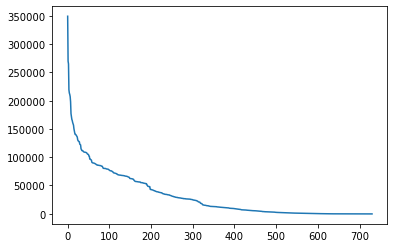

In [469]:
%%time
PSO_Optimizer(0, 50, 500, 0.1, 0.8, 2.4, 0, True)

### b) D = 500

In [412]:
HO_PSO_P0_500_dim = HO_PSO_hyperparameter_optimizer(func_number)

### - Hyperparameter tuning: search candidates 

In [416]:
%%time
HO_PSO_P0_500_dim.grid_search_candidates(500, [500], w = (0.10, 0.20, 0.10), 
                                                   c1 = (1.0, 2.1, 0.5), c2 = (2.3, 2.9, 0.2) , tolerance = 2)

func_number 0
n_dim 500
 
n_particles: [500] count: 1
w count: 1
c1 count: 3
c2 count: 4
 
total number of combinations: 12

 - Searching n_particles =  500 2020-05-21 16:57:19.791029

 - Searching W =  0.1 2020-05-21 16:57:19.791029
new best fit n_particles 500 W 0.1 c1 1.0 c2 2.29 fit 56.830737391990056
new best fit n_particles 500 W 0.1 c1 1.0 c2 2.49 fit 10.84170344924513
Wall time: 37min 43s


In [414]:
%%time
HO_PSO_P0_500_dim.grid_search_candidates(500, [100], w = (0.10, 0.40, 0.10), 
                                                   c1 = (1.0, 2.1, 0.5), c2 = (2.4, 2.6, 0.1) , tolerance = 2)

func_number 0
n_dim 500
 
n_particles: [100] count: 1
w count: 3
c1 count: 3
c2 count: 2
 
total number of combinations: 18

 - Searching n_particles =  100 2020-05-21 16:42:33.871960

 - Searching W =  0.1 2020-05-21 16:42:33.871960
new best fit n_particles 100 W 0.1 c1 1.0 c2 2.4 fit 13693.469306167975
new best fit n_particles 100 W 0.1 c1 1.0 c2 2.5 fit 12920.27191285843
new best fit n_particles 100 W 0.1 c1 1.5 c2 2.5 fit 11028.48052420961

 - Searching W =  0.2 2020-05-21 16:46:21.994370

 - Searching W =  0.3 2020-05-21 16:50:11.142229
Wall time: 11min 25s


In [417]:
HO_PSO_P0_500_dim.show_best_candidates(10)

,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
19,500.0,500.0,0.1,1.0,2.49,10.841703,1000.0,NaN,NaN,NaN,NaN,NaN
23,500.0,500.0,0.1,1.5,2.49,37.298326,1000.0,NaN,NaN,NaN,NaN,NaN
22,500.0,500.0,0.1,1.5,2.29,47.696009,1000.0,NaN,NaN,NaN,NaN,NaN
24,500.0,500.0,0.1,1.5,2.69,55.508666,1000.0,NaN,NaN,NaN,NaN,NaN
18,500.0,500.0,0.1,1.0,2.29,56.830737,1000.0,NaN,NaN,NaN,NaN,NaN
27,500.0,500.0,0.1,2.0,2.49,58.265723,1000.0,NaN,NaN,NaN,NaN,NaN
29,500.0,500.0,0.1,2.0,2.89,60.875574,1000.0,NaN,NaN,NaN,NaN,NaN
28,500.0,500.0,0.1,2.0,2.69,83.720761,1000.0,NaN,NaN,NaN,NaN,NaN
26,500.0,500.0,0.1,2.0,2.29,94.450816,1000.0,NaN,NaN,NaN,NaN,NaN
20,500.0,500.0,0.1,1.0,2.69,99.650082,1000.0,NaN,NaN,NaN,NaN,NaN


### - Compute optimum with PSO algorithm (best candidate)

func_number: 0
n_particles: 500 n_dim: 500
W: 0.1 c1: 1.0 c2: 2.49
func_number: 0
n_particles: 500 n_dim: 500
W: 0.1 c1: 1.0 c2: 2.49
The optimum is 
 [ 9.84256262e+01  7.71920612e+01 -1.90091162e+01  2.50063627e+01
 -2.21358097e+01  6.94027356e+01  7.02205217e+00  6.30088108e+01
 -2.19457288e+01  9.30883970e+01 -9.57396356e+01  9.23157046e+01
  4.24281049e+01  2.76915871e+01 -8.33982771e+00 -6.38607259e+01
  6.70871470e+01  9.46821575e+01 -7.29525979e+01 -5.12829280e+01
  8.28531420e+01  3.61004441e+01  2.39601442e+01  1.25132633e+00
 -1.00603192e+02 -5.48736392e+01  9.55585415e+01  7.26788897e+01
 -9.78779156e+01 -1.98742894e+00 -1.71878107e+01  5.40581843e+01
 -1.63824961e+00  3.23947802e+00  5.51805444e+01  1.85996410e+01
 -7.65992571e+01 -7.85096723e+01  3.20247194e+01  1.00528454e+02
 -3.19628723e+01 -6.44045403e+01 -8.78256045e+01 -3.77961915e+01
 -3.45022134e+01 -2.54454791e+01  8.95442116e+01  4.35081193e+01
  5.73641501e+01  2.43368315e+01  2.82337400e+01  5.13229801e+01
 -7.

(49.91366167958773, 1000)

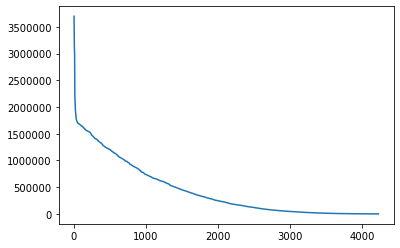

In [471]:
%%time
PSO_Optimizer(0, 500, 500, 0.1, 1.0, 2.49, 0, True)

## F2 : Shifted Schwefel’s Problem 2.21

In [472]:
func_number = 1

### a) D = 50

In [473]:
HO_PSO_P1_50_dim = HO_PSO_hyperparameter_optimizer(func_number)

### - Hyperparameter tuning: search candidates

In [476]:
%%time
HO_PSO_P1_50_dim.grid_search_candidates(50, [200], w = (0.10, 0.40, 0.20), 
                                                   c1 = (1.4, 2.1, 0.2), c2 = (2.2, 2.5, 0.2) , tolerance = 1)

func_number 1
n_dim 50
 
n_particles: [200] count: 1
w count: 2
c1 count: 4
c2 count: 2
 
total number of combinations: 16

 - Searching n_particles =  200 2020-05-22 17:17:45.516142

 - Searching W =  0.1 2020-05-22 17:17:45.516142
new best fit n_particles 200 W 0.1 c1 1.4 c2 2.2 fit -396.52791565126677
new best fit n_particles 200 W 0.1 c1 1.4 c2 2.4 fit -418.0358502637589
new best fit n_particles 200 W 0.1 c1 1.6 c2 2.4 fit -434.9017378359323

 - Searching W =  0.3 2020-05-22 17:18:59.446840
Wall time: 2min 28s


### - Hyperparameter tuning: select best candidate

In [477]:
HO_PSO_P1_50_dim.show_best_candidates(10)

,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
3,50.0,200.0,0.1,1.6,2.4,-434.901738,1000.0,NaN,NaN,NaN,NaN,NaN
7,50.0,200.0,0.1,2.0,2.4,-419.606291,1000.0,NaN,NaN,NaN,NaN,NaN
1,50.0,200.0,0.1,1.4,2.4,-418.035850,1000.0,NaN,NaN,NaN,NaN,NaN
4,50.0,200.0,0.1,1.8,2.2,-417.626095,1000.0,NaN,NaN,NaN,NaN,NaN
13,50.0,200.0,0.3,1.8,2.4,-412.835025,1000.0,NaN,NaN,NaN,NaN,NaN
11,50.0,200.0,0.3,1.6,2.4,-412.579168,1000.0,NaN,NaN,NaN,NaN,NaN
9,50.0,200.0,0.3,1.4,2.4,-410.139674,1000.0,NaN,NaN,NaN,NaN,NaN
10,50.0,200.0,0.3,1.6,2.2,-409.252824,1000.0,NaN,NaN,NaN,NaN,NaN
6,50.0,200.0,0.1,2.0,2.2,-403.305117,1000.0,NaN,NaN,NaN,NaN,NaN
14,50.0,200.0,0.3,2.0,2.2,-402.248004,1000.0,NaN,NaN,NaN,NaN,NaN


In [478]:
HO_PSO_P1_50_dim.select_best_candidate(4, 20)
HO_PSO_P1_50_dim.df_best_candidates

testing candidate: 3 2020-05-22 17:20:26.384919
   n_dim: 50 n_particles: 200.0 w: 0.1 c1: 1.6 c2: 2.4
testing candidate: 7 2020-05-22 17:23:40.976183
   n_dim: 50 n_particles: 200.0 w: 0.1 c1: 2.0 c2: 2.4
testing candidate: 1 2020-05-22 17:26:54.756395
   n_dim: 50 n_particles: 200.0 w: 0.1 c1: 1.4 c2: 2.4
testing candidate: 4 2020-05-22 17:30:09.912681
   n_dim: 50 n_particles: 200.0 w: 0.1 c1: 1.8 c2: 2.2


,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
3,50.0,200.0,0.1,1.6,2.4,-434.901738,1000.0,-419.998163,-377.333377,-410.971893,9.379545,NaN
7,50.0,200.0,0.1,2.0,2.4,-419.606291,1000.0,-427.988758,-367.169311,-407.349551,13.238593,NaN
1,50.0,200.0,0.1,1.4,2.4,-418.035850,1000.0,-433.039875,-397.908738,-416.635903,9.436087,NaN
4,50.0,200.0,0.1,1.8,2.2,-417.626095,1000.0,-418.122537,-386.443000,-401.981518,8.974431,NaN


### - Compute optimum with PSO algorithm (best candidate)

func_number: 1
n_particles: 500 n_dim: 50
W: 0.1 c1: 1.4 c2: 2.4
func_number: 1
n_particles: 500 n_dim: 50
W: 0.1 c1: 1.4 c2: 2.4
The optimum is 
 [-13.87318987 -19.11132519 -42.5648786  -82.1920879  -11.83196481
 -38.72447655  11.46268249 -70.90664981 -60.96281102 -46.6283121
 -47.66685555 -55.08704668 -17.66970949 -26.34962904 -73.35856128
 -58.75611546 -36.93426598 -28.72630753 -65.06849022 -62.33598091
 -33.8148472  -64.97003128 -54.01055168 -42.65622361  -0.41958164
 -34.11088214 -30.83896609 -59.0990939  -41.70430558 -35.81824991
 -62.52433342 -59.73211659 -36.88934045 -48.99011921 -85.05492206
 -67.59833647 -84.02464429 -39.41723876 -47.84042777 -50.24565468
  -3.96057846 -59.88563274 -29.24325599 -34.46177304  11.73060943
 -67.85830432   0.43139824 -53.96608176 -23.46102553 -69.62762384]
The value of F at the optimum is: -435.67231217883295
Wall time: 23.3 s


(-435.67231217883295, 1000)

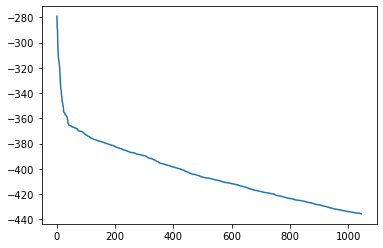

In [483]:
%%time
PSO_Optimizer(1, 50, 500, 0.1, 1.4, 2.4, 0, True)

### b) D = 500

In [419]:
HO_PSO_P1_500_dim = HO_PSO_hyperparameter_optimizer(func_number)

### - Hyperparameter tuning: search candidates 

In [421]:
%%time
HO_PSO_P1_500_dim.grid_search_candidates(500, [500], w = (0.10, 0.40, 0.20), 
                                                   c1 = (1.0, 2.1, 0.5), c2 = (2.3, 2.8, 0.2) , tolerance = 2)

func_number 1
n_dim 500
 
n_particles: [500] count: 1
w count: 2
c1 count: 3
c2 count: 3
 
total number of combinations: 18

 - Searching n_particles =  500 2020-05-21 17:55:57.795986

 - Searching W =  0.1 2020-05-21 17:55:57.795986
new best fit n_particles 500 W 0.1 c1 1.0 c2 2.29 fit -346.2270255963704
new best fit n_particles 500 W 0.1 c1 1.0 c2 2.69 fit -351.55841716421514
new best fit n_particles 500 W 0.1 c1 1.5 c2 2.69 fit -353.7473622009869

 - Searching W =  0.3 2020-05-21 18:24:42.229608
Wall time: 57min 46s


In [422]:
HO_PSO_P1_500_dim.show_best_candidates(10)

,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
5,500.0,500.0,0.1,1.5,2.69,-353.747362,1000.0,NaN,NaN,NaN,NaN,NaN
2,500.0,500.0,0.1,1.0,2.69,-351.558417,1000.0,NaN,NaN,NaN,NaN,NaN
8,500.0,500.0,0.1,2.0,2.69,-350.137528,1000.0,NaN,NaN,NaN,NaN,NaN
16,500.0,500.0,0.3,2.0,2.49,-349.031210,1000.0,NaN,NaN,NaN,NaN,NaN
6,500.0,500.0,0.1,2.0,2.29,-348.476227,1000.0,NaN,NaN,NaN,NaN,NaN
7,500.0,500.0,0.1,2.0,2.49,-346.949251,1000.0,NaN,NaN,NaN,NaN,NaN
0,500.0,500.0,0.1,1.0,2.29,-346.227026,1000.0,NaN,NaN,NaN,NaN,NaN
12,500.0,500.0,0.3,1.5,2.29,-345.792490,1000.0,NaN,NaN,NaN,NaN,NaN
4,500.0,500.0,0.1,1.5,2.49,-345.406421,1000.0,NaN,NaN,NaN,NaN,NaN
15,500.0,500.0,0.3,2.0,2.29,-344.198978,1000.0,NaN,NaN,NaN,NaN,NaN


### - Compute optimum with PSO algorithm (best candidate)

func_number: 1
n_particles: 500 n_dim: 500
W: 0.1 c1: 1.5 c2: 2.7
func_number: 1
n_particles: 500 n_dim: 500
W: 0.1 c1: 1.5 c2: 2.7
The optimum is 
 [ 1.08317509e+01  2.84767997e+01  1.85749225e-01 -4.84416244e+01
  2.30045808e+01  9.35361903e+00  1.83118431e+01  1.34202101e+01
  6.51544468e-01  2.11304956e+01  2.88829820e+00 -2.99273401e+01
 -5.64825295e+00 -9.54186508e+00 -5.56491990e+01 -7.27801376e+00
  7.81127689e+00 -1.05144152e+01 -1.37762394e+01  1.85703140e+01
  2.90327127e+01  1.24897744e+00 -8.12960377e+00  1.36416706e+01
  6.05490953e+00 -3.68948522e+01 -2.28910126e+01 -2.73351694e+01
  2.88932625e+01 -2.24428977e+01 -2.31588576e+01 -6.91240311e+00
 -3.60264854e+00 -3.76473251e+00  1.73213122e+00  5.89510482e+00
  1.32696334e+00  1.12493321e+01  1.27746699e+01  1.31780539e+01
 -3.20504071e-01  2.67155708e+01  1.68107484e+01 -1.29743721e+01
  1.11464241e+01  8.42407668e+00  1.26455755e+01  1.54871893e+01
 -1.00812320e+00 -1.48271066e+01 -6.02075153e+00  1.86053664e+01
  4.09

(-351.14554075490895, 1000)

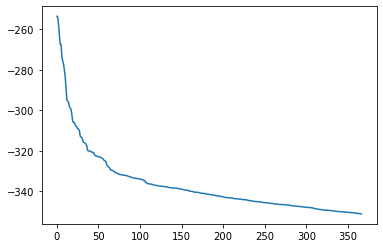

In [484]:
%%time
PSO_Optimizer(1, 500, 500, 0.1, 1.5, 2.7, 0, True)

## F3 : Shifted Rosenbrock’s Function

In [398]:
func_number = 2

### a) D = 50

### - Hyperparameter tuning: search candidates 

In [405]:
%%time
# n_particles = 200
HO_PSO_P2_50_dim.grid_search_candidates(50, [200], w = (0.12, 0.20, 0.05), 
                                                   c1 = (1.0, 1.5, 0.2), c2 = (2.6, 2.9, 0.2) , tolerance = 2)

func_number 2
n_dim 50
 
n_particles: [200] count: 1
w count: 2
c1 count: 3
c2 count: 2
 
total number of combinations: 12

 - Searching n_particles =  200 2020-05-21 16:01:11.468590

 - Searching W =  0.12 2020-05-21 16:01:11.469557
new best fit n_particles 200 W 0.12 c1 1.0 c2 2.6 fit 1097.1052312936688

 - Searching W =  0.17 2020-05-21 16:04:44.993013
new best fit n_particles 200 W 0.17 c1 1.4 c2 2.6 fit 1077.5146851530835
Wall time: 7min 5s


In [403]:
%%time
# n_particles = 500
HO_PSO_P2_50_dim.grid_search_candidates(50, [500], w = (0.12, 0.20, 0.05), 
                                                   c1 = (1.0, 1.5, 0.2), c2 = (2.6, 2.9, 0.2) , tolerance = 2)

func_number 2
n_dim 50
 
n_particles: [500] count: 1
w count: 2
c1 count: 3
c2 count: 2
 
total number of combinations: 12

 - Searching n_particles =  500 2020-05-21 15:42:18.341073

 - Searching W =  0.12 2020-05-21 15:42:18.341073
new best fit n_particles 500 W 0.12 c1 1.0 c2 2.6 fit 1021.4333308928071
new best fit n_particles 500 W 0.12 c1 1.0 c2 2.8 fit 829.0141902439664

 - Searching W =  0.17 2020-05-21 15:51:15.190146
Wall time: 17min 45s


In [401]:
%%time
HO_PSO_P2_50_dim.grid_search_candidates(50, [100], w = (0.02, 0.25, 0.05), 
                                                   c1 = (0.8, 1.5, 0.2), c2 = (2.4, 3.2, 0.2) , tolerance = 2)

func_number 2
n_dim 50
 
n_particles: [100] count: 1
w count: 5
c1 count: 4
c2 count: 4
 
total number of combinations: 80

 - Searching n_particles =  100 2020-05-21 15:14:14.724131

 - Searching W =  0.02 2020-05-21 15:14:14.724131
new best fit n_particles 100 W 0.02 c1 0.8 c2 2.4 fit 4364.737143725597
new best fit n_particles 100 W 0.02 c1 0.8 c2 2.6 fit 1235.1007615593692
new best fit n_particles 100 W 0.02 c1 1.2 c2 2.4 fit 1126.1990396767278
new best fit n_particles 100 W 0.02 c1 1.4 c2 2.4 fit 1021.2850562557597

 - Searching W =  0.07 2020-05-21 15:19:03.805851

 - Searching W =  0.12 2020-05-21 15:23:41.698800
new best fit n_particles 100 W 0.12 c1 1.0 c2 2.8 fit 790.4769199318639

 - Searching W =  0.17 2020-05-21 15:28:19.727254

 - Searching W =  0.22 2020-05-21 15:32:58.240756
Wall time: 23min 26s


### - Hyperparameter tuning: select best candidate

In [406]:
HO_PSO_P2_50_dim.show_best_candidates(10)

,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
92,50.0,100.0,0.12,1.0,2.8,790.476920,1000.0,NaN,NaN,NaN,NaN,NaN
135,50.0,500.0,0.12,1.0,2.8,829.014190,1000.0,NaN,NaN,NaN,NaN,NaN
137,50.0,500.0,0.12,1.2,2.8,907.854579,1000.0,NaN,NaN,NaN,NaN,NaN
140,50.0,500.0,0.17,1.0,2.6,914.264973,1000.0,NaN,NaN,NaN,NaN,NaN
145,50.0,500.0,0.17,1.4,2.8,932.638702,1000.0,NaN,NaN,NaN,NaN,NaN
5,50.0,100.0,0.05,1.3,2.6,961.387869,1000.0,NaN,NaN,NaN,NaN,NaN
142,50.0,500.0,0.17,1.2,2.6,962.920314,1000.0,NaN,NaN,NaN,NaN,NaN
116,50.0,100.0,0.17,1.4,2.8,971.582219,1000.0,NaN,NaN,NaN,NaN,NaN
117,50.0,100.0,0.17,1.4,3.0,1017.443717,1000.0,NaN,NaN,NaN,NaN,NaN
66,50.0,100.0,0.02,1.4,2.4,1021.285056,1000.0,NaN,NaN,NaN,NaN,NaN


In [503]:
HO_PSO_P2_50_dim.select_best_candidate(4, 10)
HO_PSO_P2_50_dim.df_best_candidates

testing candidate: 92 2020-05-23 09:49:33.896602
   n_dim: 50 n_particles: 100.0 w: 0.12 c1: 1.0 c2: 2.8
testing candidate: 135 2020-05-23 09:52:29.062238
   n_dim: 50 n_particles: 500.0 w: 0.12 c1: 1.0 c2: 2.8
testing candidate: 137 2020-05-23 10:07:00.330513
   n_dim: 50 n_particles: 500.0 w: 0.12 c1: 1.2 c2: 2.8
testing candidate: 140 2020-05-23 10:21:31.780793
   n_dim: 50 n_particles: 500.0 w: 0.17 c1: 1.0 c2: 2.6


,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
92,50.0,100.0,0.12,1.0,2.8,790.476920,1000.0,898.542056,3168.221715,1463.028465,659.222956,NaN
135,50.0,500.0,0.12,1.0,2.8,829.014190,1000.0,904.568857,7271.648397,1808.780818,1869.704807,NaN
137,50.0,500.0,0.12,1.2,2.8,907.854579,1000.0,862.470648,2443.770190,1325.344032,532.765280,NaN
140,50.0,500.0,0.17,1.0,2.6,914.264973,1000.0,923.022357,2076.766178,1423.935479,366.125442,NaN


### - Compute optimum with PSO algorithm (best candidate)

func_number: 2
n_particles: 1500 n_dim: 50
W: 0.12 c1: 1.2 c2: 2.8
iteration: 0 fit: 153414933627.8708 at 2020-05-24 14:11:55.233545
iteration: 240 fit: 924.6080970184167 at 2020-05-24 14:12:56.683441
iteration: 480 fit: 924.6080970184167 at 2020-05-24 14:13:58.684162
iteration: 720 fit: 915.793898673915 at 2020-05-24 14:15:00.869636
iteration: 960 fit: 797.8395756915907 at 2020-05-24 14:16:03.950685
func_number: 2
n_particles: 1500 n_dim: 50
W: 0.12 c1: 1.2 c2: 2.8
The optimum is 
 [-76.14407023 -36.97577603 -58.80801152  37.75649674  51.49517487
 -31.51089161  49.60615627  49.00114784 -72.11342856 -31.34743022
 -44.2279267  -21.62146775  70.34070158  47.05479214 -46.65129755
  -9.4749646  -41.77734631 -14.80506494  35.00309521  56.57184955
  57.5120077  -18.36424035  25.82820066 -63.49452659 -29.6666008
 -87.42377033  47.10772705  -8.67235833 -83.197498   -72.91883247
  81.15077202  18.56772166 -46.87061215  76.46140646 -13.76090084
 -82.44608999  71.95312711  84.94453036  27.5035702

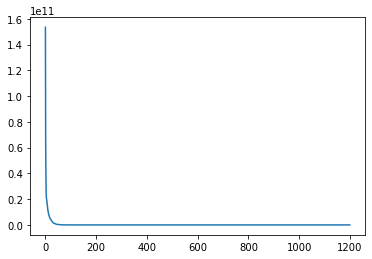

In [547]:
%%time
x, y, z_50 = PSO_Optimizer_2(2, 50, 1500, 0.12, 1.2, 2.8, 0, 1200, True)

### b) D = 500

In [434]:
HO_PSO_P2_500_dim = HO_PSO_hyperparameter_optimizer(2)

### - Hyperparameter tuning: search candidates 

In [435]:
%%time
HO_PSO_P2_500_dim.grid_search_candidates(500, [500], w = (0.12, 0.18, 0.05), 
                                                   c1 = (1.0, 1.3, 0.2), c2 = (2.6, 2.9, 0.2) , tolerance = 2)

func_number 2
n_dim 500
 
n_particles: [500] count: 1
w count: 2
c1 count: 2
c2 count: 2
 
total number of combinations: 8

 - Searching n_particles =  500 2020-05-21 22:25:21.179261

 - Searching W =  0.12 2020-05-21 22:25:21.179261
new best fit n_particles 500 W 0.12 c1 1.0 c2 2.6 fit 491617.5233804492

 - Searching W =  0.17 2020-05-21 23:20:36.653841
Wall time: 1h 50min 14s


In [437]:
%%time
HO_PSO_P2_500_dim.grid_search_candidates(500, [100, 200], w = (0.12, 0.18, 0.05), 
                                                   c1 = (1.0, 1.3, 0.2), c2 = (2.6, 2.9, 0.2) , tolerance = 2)

func_number 2
n_dim 500
 
n_particles: [100, 200] count: 2
w count: 2
c1 count: 2
c2 count: 2
 
total number of combinations: 16

 - Searching n_particles =  100 2020-05-22 00:15:36.098524

 - Searching W =  0.12 2020-05-22 00:15:36.098524
new best fit n_particles 100 W 0.12 c1 1.0 c2 2.6 fit 155243657.4378671
new best fit n_particles 100 W 0.12 c1 1.0 c2 2.8 fit 104607749.9526122

 - Searching W =  0.17 2020-05-22 00:26:35.125542

 - Searching n_particles =  200 2020-05-22 00:37:32.617570

 - Searching W =  0.12 2020-05-22 00:37:32.618569
new best fit n_particles 200 W 0.12 c1 1.0 c2 2.6 fit 9886078.702590428

 - Searching W =  0.17 2020-05-22 00:59:26.515548
new best fit n_particles 200 W 0.17 c1 1.2 c2 2.8 fit 8422912.64585053
Wall time: 1h 5min 39s


In [443]:
%%time
HO_PSO_P2_500_dim.grid_search_candidates(500, [500], w = (0.02, 0.10, 0.05), 
                                                   c1 = (0.8, 1.9, 1.0), c2 = (2.0, 3.1, 1.0) , tolerance = 2)

func_number 2
n_dim 500
 
n_particles: [500] count: 1
w count: 2
c1 count: 2
c2 count: 2
 
total number of combinations: 8

 - Searching n_particles =  500 2020-05-22 07:28:31.958696

 - Searching W =  0.02 2020-05-22 07:28:31.958696
new best fit n_particles 500 W 0.02 c1 0.8 c2 2.0 fit 2093046.9181423371
new best fit n_particles 500 W 0.02 c1 0.8 c2 3.0 fit 512714.1569908551

 - Searching W =  0.07 2020-05-22 08:24:05.356391
new best fit n_particles 500 W 0.07 c1 1.8 c2 3.0 fit 485385.34358092956
Wall time: 1h 59min 11s


In [446]:
%%time
HO_PSO_P2_500_dim.grid_search_candidates(500, [500], w = (0.07, 0.08, 0.01), 
                                                   c1 = (1.7, 2.0, 0.2), c2 = (2.9, 3.3, 0.2) , tolerance = 2)

func_number 2
n_dim 500
 
n_particles: [500] count: 1
w count: 1
c1 count: 2
c2 count: 2
 
total number of combinations: 4

 - Searching n_particles =  500 2020-05-22 09:34:11.677068

 - Searching W =  0.07 2020-05-22 09:34:11.678067
new best fit n_particles 500 W 0.07 c1 1.7 c2 2.9 fit 441331.21364008257
Wall time: 1h 5min 24s


In [501]:
%%time
HO_PSO_P2_500_dim.grid_search_candidates(500, [500], w = (0.03, 0.08, 0.04), 
                                                   c1 = (2.0, 2.6, 0.5), c2 = (1.5, 2.1, 0.5) , tolerance = 2)

func_number 2
n_dim 500
 
n_particles: [500] count: 1
w count: 2
c1 count: 2
c2 count: 2
 
total number of combinations: 8

 - Searching n_particles =  500 2020-05-22 19:29:26.714830

 - Searching W =  0.03 2020-05-22 19:29:26.715795
new best fit n_particles 500 W 0.03 c1 2.0 c2 2.0 fit 2234725.2967912643
new best fit n_particles 500 W 0.03 c1 2.5 c2 2.0 fit 1878605.349705636

 - Searching W =  0.07 2020-05-22 20:30:10.027896
new best fit n_particles 500 W 0.07 c1 2.5 c2 2.0 fit 1454066.0060874973
Wall time: 2h 37s


### - Hyperparameter tuning: select best candidate

In [515]:
HO_PSO_P2_500_dim.show_best_candidates(10)

,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
32,500.0,500.0,0.07,1.7,2.9,441331.213640,1000.0,NaN,NaN,NaN,NaN,NaN
31,500.0,500.0,0.07,1.8,3.0,485385.343581,1000.0,NaN,NaN,NaN,NaN,NaN
0,500.0,500.0,0.12,1.0,2.6,491617.523380,1000.0,NaN,NaN,NaN,NaN,NaN
25,500.0,500.0,0.02,0.8,3.0,512714.156991,1000.0,NaN,NaN,NaN,NaN,NaN
29,500.0,500.0,0.07,0.8,3.0,618325.925421,1000.0,NaN,NaN,NaN,NaN,NaN
5,500.0,500.0,0.17,1.0,2.8,622825.201725,1000.0,NaN,NaN,NaN,NaN,NaN
3,500.0,500.0,0.12,1.2,2.8,625456.759958,1000.0,NaN,NaN,NaN,NaN,NaN
1,500.0,500.0,0.12,1.0,2.8,717704.493073,1000.0,NaN,NaN,NaN,NaN,NaN
34,500.0,500.0,0.07,1.9,2.9,726749.742762,1000.0,NaN,NaN,NaN,NaN,NaN
27,500.0,500.0,0.02,1.8,3.0,729792.502342,1000.0,NaN,NaN,NaN,NaN,NaN


### - Compute optimum with PSO algorithm (best candidate)

func_number: 2
n_particles: 3000 n_dim: 500
W: 0.07 c1: 1.7 c2: 2.9
iteration: 0 fit: 3005992020052.5737 at 2020-05-23 21:44:30.945319
iteration: 600 fit: 6445448.405864364 at 2020-05-23 22:33:35.558829
iteration: 1200 fit: 137707.2927859909 at 2020-05-23 23:22:12.685153
iteration: 1800 fit: 137707.2927859909 at 2020-05-24 00:11:43.687497
iteration: 2400 fit: 129167.63073552793 at 2020-05-24 01:00:41.315972
func_number: 2
n_particles: 3000 n_dim: 500
W: 0.07 c1: 1.7 c2: 2.9
The optimum is 
 [-76.90548199 -37.42212918 -59.38702595  36.99486968  51.24523336
 -31.06904754  51.09787003  48.59800693 -71.0478557  -30.8442074
 -43.87525356 -20.60350489  71.42059248  48.40641332 -46.69309357
  -9.24845722 -39.73956704 -13.06183456  37.09915738  58.29605523
  59.08457985 -17.6260531   26.92533143 -62.69491111 -28.87412253
 -86.20987602  48.22611575  -7.88244831 -82.33096522 -73.4105305
  81.4390051   19.94122443 -45.42046988  76.2574639  -14.00991936
 -82.87420028  69.92596479  86.19347092  28.

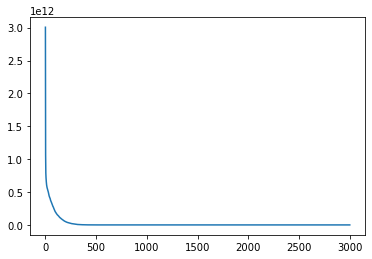

In [530]:
%%time
x, y, z = PSO_Optimizer_2(2, 500, 3000, 0.07, 1.7, 2.9, 0, 3000, True)

## F4 : Shifted Rastrigin’s Function

In [407]:
func_number = 3

### a) D = 50

### - Hyperparameter tuning: search candidates 

In [374]:
%%time
HO_PSO_P3_50_dim = HO_PSO_hyperparameter_optimizer(func_number)

HO_PSO_P3_50_dim.grid_search_candidates(50, [100], w = (0.05, 0.60, 0.10), 
                                                   c1 = (0.9, 2.1, 0.4), c2 = (2.2, 2.9, 0.8) , tolerance = 2)

func_number 3
n_dim 50
 
n_particles: [100] count: 1
w count: 6
c1 count: 3
c2 count: 1
 
total number of combinations: 18

 - Searching n_particles =  100 2020-05-21 11:51:52.235561

 - Searching W =  0.05 2020-05-21 11:51:52.235561
new best fit n_particles 100 W 0.05 c1 0.9 c2 2.2 fit 548.5391519138977
new best fit n_particles 100 W 0.05 c1 1.3 c2 2.2 fit 432.87665000063555

 - Searching W =  0.15 2020-05-21 11:52:23.567789
new best fit n_particles 100 W 0.15 c1 1.3 c2 2.2 fit 420.5171659638138

 - Searching W =  0.25 2020-05-21 11:52:55.237579

 - Searching W =  0.35 2020-05-21 11:53:26.574906

 - Searching W =  0.45 2020-05-21 11:53:58.113655

 - Searching W =  0.55 2020-05-21 11:54:29.040349
Wall time: 3min 8s


In [409]:
%%time
# n_particles = 500
HO_PSO_P3_50_dim.grid_search_candidates(50, [500], w = (0.05, 0.11, 0.05), 
                                                   c1 = (0.7, 1.3, 0.4), c2 = (2.2, 2.7, 0.2) , tolerance = 2)

func_number 3
n_dim 50
 
n_particles: [500] count: 1
w count: 2
c1 count: 2
c2 count: 3
 
total number of combinations: 12

 - Searching n_particles =  500 2020-05-21 16:10:42.000360

 - Searching W =  0.05 2020-05-21 16:10:42.001356
new best fit n_particles 500 W 0.05 c1 0.7 c2 2.2 fit 427.7109848741318
new best fit n_particles 500 W 0.05 c1 0.7 c2 2.4 fit 371.14457583543447
new best fit n_particles 500 W 0.05 c1 0.7 c2 2.6 fit 120.81664419254645

 - Searching W =  0.1 2020-05-21 16:16:10.004186
Wall time: 10min 45s


In [396]:
HO_PSO_P3_50_dim.grid_search_candidates(50, [100], w = (0.02, 0.07, 0.02), 
                                                   c1 = (0.6, 1.3, 0.4), c2 = (2.2, 2.7, 0.2) , tolerance = 2)

func_number 3
n_dim 50
 
n_particles: [100] count: 1
w count: 3
c1 count: 2
c2 count: 3
 
total number of combinations: 18

 - Searching n_particles =  100 2020-05-21 14:41:05.547389

 - Searching W =  0.02 2020-05-21 14:41:05.547389
new best fit n_particles 100 W 0.02 c1 0.6 c2 2.2 fit 427.50972233236143
new best fit n_particles 100 W 0.02 c1 0.6 c2 2.4 fit 393.28306024049834
new best fit n_particles 100 W 0.02 c1 1.0 c2 2.6 fit 354.72969002691684

 - Searching W =  0.04 2020-05-21 14:42:09.175430

 - Searching W =  0.06 2020-05-21 14:43:11.803459
new best fit n_particles 100 W 0.06 c1 0.6 c2 2.4 fit 345.3619167559634
new best fit n_particles 100 W 0.06 c1 0.6 c2 2.6 fit 307.0413198804781


In [393]:
HO_PSO_P3_50_dim.grid_search_candidates(50, [100], w = (0.05, 0.40, 0.10), 
                                                   c1 = (0.7, 1.3, 0.2), c2 = (2.2, 2.7, 0.2) , tolerance = 2)

func_number 3
n_dim 50
 
n_particles: [100] count: 1
w count: 4
c1 count: 3
c2 count: 4
 
total number of combinations: 48

 - Searching n_particles =  100 2020-05-21 13:40:27.413377

 - Searching W =  0.05 2020-05-21 13:40:27.413377
new best fit n_particles 100 W 0.05 c1 0.7 c2 2.2 fit 487.09604692703033
new best fit n_particles 100 W 0.05 c1 0.9 c2 2.6 fit 424.70944989853206
new best fit n_particles 100 W 0.05 c1 0.9 c2 2.8 fit 343.65751881343795
new best fit n_particles 100 W 0.05 c1 1.1 c2 2.2 fit 286.71945873064567
new best fit n_particles 100 W 0.05 c1 1.1 c2 2.6 fit 257.6467340188908

 - Searching W =  0.15 2020-05-21 13:42:33.693751

 - Searching W =  0.25 2020-05-21 13:44:38.689814

 - Searching W =  0.35 2020-05-21 13:46:43.134494


In [385]:
HO_PSO_P3_50_dim.grid_search_candidates(50, [100], w = (0.05, 0.40, 0.10), 
                                                   c1 = (0.7, 1.5, 0.2), c2 = (1.8, 2.5, 0.2) , tolerance = 2)

func_number 3
n_dim 50
 
n_particles: [100] count: 1
w count: 4
c1 count: 4
c2 count: 4
 
total number of combinations: 64

 - Searching n_particles =  100 2020-05-21 12:50:07.084585

 - Searching W =  0.05 2020-05-21 12:50:07.084585
new best fit n_particles 100 W 0.05 c1 0.7 c2 1.8 fit 504.2297814226083
new best fit n_particles 100 W 0.05 c1 0.7 c2 2.4 fit 273.1537003861498

 - Searching W =  0.15 2020-05-21 12:52:54.645518

 - Searching W =  0.25 2020-05-21 12:55:42.531265

 - Searching W =  0.35 2020-05-21 12:58:31.715564


### - Hyperparameter tuning: select best candidate

In [410]:
HO_PSO_P3_50_dim.show_best_candidates(10)

,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
151,50.0,500.0,0.05,0.7,2.6,120.816644,1000.0,NaN,NaN,NaN,NaN,NaN
157,50.0,500.0,0.10,0.7,2.6,241.154813,1000.0,NaN,NaN,NaN,NaN,NaN
93,50.0,100.0,0.05,1.1,2.6,257.646734,1000.0,NaN,NaN,NaN,NaN,NaN
22,50.0,100.0,0.05,0.7,2.4,273.153700,1000.0,NaN,NaN,NaN,NaN,NaN
91,50.0,100.0,0.05,1.1,2.2,286.719459,1000.0,NaN,NaN,NaN,NaN,NaN
145,50.0,100.0,0.06,0.6,2.6,307.041320,1000.0,NaN,NaN,NaN,NaN,NaN
107,50.0,100.0,0.25,0.7,2.2,326.976055,1000.0,NaN,NaN,NaN,NaN,NaN
46,50.0,100.0,0.15,1.1,2.4,335.224850,1000.0,NaN,NaN,NaN,NaN,NaN
95,50.0,100.0,0.15,0.7,2.2,343.146230,1000.0,NaN,NaN,NaN,NaN,NaN
90,50.0,100.0,0.05,0.9,2.8,343.657519,1000.0,NaN,NaN,NaN,NaN,NaN


In [504]:
HO_PSO_P3_50_dim.select_best_candidate(5, 10)
HO_PSO_P3_50_dim.df_best_candidates

testing candidate: 151 2020-05-23 10:36:14.392951
   n_dim: 50 n_particles: 500.0 w: 0.05 c1: 0.7 c2: 2.6
testing candidate: 157 2020-05-23 10:45:17.893845
   n_dim: 50 n_particles: 500.0 w: 0.1 c1: 0.7 c2: 2.6
testing candidate: 93 2020-05-23 10:54:10.131708
   n_dim: 50 n_particles: 100.0 w: 0.05 c1: 1.1 c2: 2.6
testing candidate: 22 2020-05-23 10:55:56.973476
   n_dim: 50 n_particles: 100.0 w: 0.05 c1: 0.7 c2: 2.4
testing candidate: 91 2020-05-23 10:57:43.638979
   n_dim: 50 n_particles: 100.0 w: 0.05 c1: 1.1 c2: 2.2


,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
151,50.0,500.0,0.05,0.7,2.6,120.816644,1000.0,226.929253,482.125846,384.058137,85.990266,NaN
157,50.0,500.0,0.10,0.7,2.6,241.154813,1000.0,216.776698,483.682991,383.109138,80.707975,NaN
93,50.0,100.0,0.05,1.1,2.6,257.646734,1000.0,158.337424,560.566337,449.900693,135.912445,NaN
22,50.0,100.0,0.05,0.7,2.4,273.153700,1000.0,318.699534,552.594182,444.238389,86.944918,NaN
91,50.0,100.0,0.05,1.1,2.2,286.719459,1000.0,318.266772,614.371309,492.196743,78.267153,NaN


### - Compute optimum with PSO algorithm (best candidate)

func_number: 3
n_particles: 500 n_dim: 50
W: 0.1 c1: 0.7 c2: 2.6
func_number: 3
n_particles: 500 n_dim: 50
W: 0.1 c1: 0.7 c2: 2.6
The optimum is 
 [ 0.97383728  2.25338518  0.3632198  -0.22792892  2.07936052 -0.51851903
 -2.27111936 -0.66124955  1.98948491  1.29901048  3.1276071   2.75503781
 -2.66343039 -0.40413521  1.91907618  0.22588898  1.43347436  0.17980875
 -4.01805807 -1.5664776  -0.94500307  2.29682369 -1.85831777 -3.55030901
 -2.49162151 -1.12694049 -1.52714438 -0.77469681 -1.43907589  1.05037471
  0.81110712  2.68187006 -0.58426997 -1.70253136 -0.5389087  -0.53023701
 -4.76279455  0.58350283  0.69766578 -1.33521975  2.35951372  3.20447376
  1.42238086  2.21703029 -4.82426045  3.66531687  1.71580914 -5.58760439
  1.23270381  4.76169753]
The value of F at the optimum is: 347.80724731663474
Wall time: 2min 38s


(347.80724731663474, 3000)

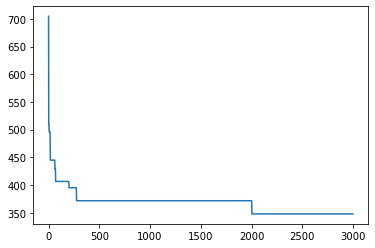

In [511]:
%%time
PSO_Optimizer_2(3, 50, 500, 0.10, 0.7, 2.6, 0, 3000, True)

### b) D = 500

In [432]:
HO_PSO_P3_500_dim = HO_PSO_hyperparameter_optimizer(3)

### - Hyperparameter tuning: search candidates 

In [433]:
%%time
HO_PSO_P3_500_dim.grid_search_candidates(500, [500], w = (0.05, 0.11, 0.05), 
                                                   c1 = (0.7, 1.2, 0.4), c2 = (2.4, 2.7, 0.2) , tolerance = 2)

func_number 3
n_dim 500
 
n_particles: [500] count: 1
w count: 2
c1 count: 2
c2 count: 2
 
total number of combinations: 8

 - Searching n_particles =  500 2020-05-21 21:21:35.867739

 - Searching W =  0.05 2020-05-21 21:21:35.867739
new best fit n_particles 500 W 0.05 c1 0.7 c2 2.4 fit 9058.340114205193
new best fit n_particles 500 W 0.05 c1 0.7 c2 2.6 fit 8440.160115998124

 - Searching W =  0.1 2020-05-21 21:53:27.524349
new best fit n_particles 500 W 0.1 c1 0.7 c2 2.6 fit 7511.961479251988
Wall time: 1h 3min 45s


In [438]:
%%time
HO_PSO_P3_500_dim.grid_search_candidates(500, [100, 200], w = (0.05, 0.11, 0.05), 
                                                   c1 = (0.7, 1.2, 0.4), c2 = (2.4, 2.7, 0.2) , tolerance = 2)

func_number 3
n_dim 500
 
n_particles: [100, 200] count: 2
w count: 2
c1 count: 2
c2 count: 2
 
total number of combinations: 16

 - Searching n_particles =  100 2020-05-22 01:21:15.802079

 - Searching W =  0.05 2020-05-22 01:21:15.802079
new best fit n_particles 100 W 0.05 c1 0.7 c2 2.4 fit 9587.846312590356
new best fit n_particles 100 W 0.05 c1 0.7 c2 2.6 fit 8844.972657940405

 - Searching W =  0.1 2020-05-22 01:27:40.764806

 - Searching n_particles =  200 2020-05-22 01:34:10.298968

 - Searching W =  0.05 2020-05-22 01:34:10.298968

 - Searching W =  0.1 2020-05-22 01:47:04.084472
new best fit n_particles 200 W 0.1 c1 1.1 c2 2.6 fit 8570.581670568656
Wall time: 38min 37s


In [448]:
%%time
HO_PSO_P3_500_dim.grid_search_candidates(500, [500], w = (0.05, 0.11, 0.05), 
                                                   c1 = (0.5, 1.2, 0.4), c2 = (2.5, 2.8, 0.2) , tolerance = 2)

func_number 3
n_dim 500
 
n_particles: [500] count: 1
w count: 2
c1 count: 2
c2 count: 2
 
total number of combinations: 8

 - Searching n_particles =  500 2020-05-22 10:48:09.941072

 - Searching W =  0.05 2020-05-22 10:48:09.941072
new best fit n_particles 500 W 0.05 c1 0.5 c2 2.5 fit 9347.01990222189
new best fit n_particles 500 W 0.05 c1 0.5 c2 2.7 fit 8730.958821426202

 - Searching W =  0.1 2020-05-22 11:25:26.728763
Wall time: 1h 15min 27s


In [450]:
%%time
HO_PSO_P3_500_dim.grid_search_candidates(500, [500], w = (0.05, 0.11, 0.05), 
                                                   c1 = (0.7, 0.8, 0.4), c2 = (2.5, 2.8, 0.2) , tolerance = 2)

func_number 3
n_dim 500
 
n_particles: [500] count: 1
w count: 2
c1 count: 1
c2 count: 2
 
total number of combinations: 4

 - Searching n_particles =  500 2020-05-22 12:16:01.540580

 - Searching W =  0.05 2020-05-22 12:16:01.540580
new best fit n_particles 500 W 0.05 c1 0.7 c2 2.5 fit 9117.891920981827
new best fit n_particles 500 W 0.05 c1 0.7 c2 2.7 fit 9090.418467247748

 - Searching W =  0.1 2020-05-22 12:35:23.858673
new best fit n_particles 500 W 0.1 c1 0.7 c2 2.5 fit 8759.24642817649
Wall time: 38min 26s


In [451]:
HO_PSO_P3_500_dim.show_best_candidates(10)

,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
5,500.0,500.0,0.10,0.7,2.6,7511.961479,1000.0,NaN,NaN,NaN,NaN,NaN
1,500.0,500.0,0.05,0.7,2.6,8440.160116,1000.0,NaN,NaN,NaN,NaN,NaN
3,500.0,500.0,0.05,1.1,2.6,8555.147354,1000.0,NaN,NaN,NaN,NaN,NaN
23,500.0,200.0,0.10,1.1,2.6,8570.581671,1000.0,NaN,NaN,NaN,NaN,NaN
25,500.0,500.0,0.05,0.5,2.7,8730.958821,1000.0,NaN,NaN,NaN,NaN,NaN
34,500.0,500.0,0.10,0.7,2.5,8759.246428,1000.0,NaN,NaN,NaN,NaN,NaN
2,500.0,500.0,0.05,1.1,2.4,8783.674647,1000.0,NaN,NaN,NaN,NaN,NaN
9,500.0,100.0,0.05,0.7,2.6,8844.972658,1000.0,NaN,NaN,NaN,NaN,NaN
31,500.0,500.0,0.10,0.9,2.7,8932.412705,1000.0,NaN,NaN,NaN,NaN,NaN
20,500.0,200.0,0.10,0.7,2.4,8999.009141,1000.0,NaN,NaN,NaN,NaN,NaN


### - Compute optimum with PSO algorithm (best candidate)

func_number: 3
n_particles: 2000 n_dim: 500
W: 0.1 c1: 0.7 c2: 2.6
iteration: 0 fit: 11561.744078254718 at 2020-05-24 15:40:53.256546
iteration: 240 fit: 8672.616213887872 at 2020-05-24 15:48:37.241989
iteration: 480 fit: 8466.849481091567 at 2020-05-24 15:56:18.487485
iteration: 720 fit: 8397.20829793349 at 2020-05-24 16:04:00.755346
iteration: 960 fit: 8239.281714509905 at 2020-05-24 16:11:44.653744
func_number: 3
n_particles: 2000 n_dim: 500
W: 0.1 c1: 0.7 c2: 2.6
The optimum is 
 [ 6.13961425e-01  3.57090129e+00 -1.73736876e+00  7.80671569e-01
  9.67880039e-01 -4.83076601e-01  8.28438029e-02  2.36610408e+00
 -2.74215716e+00  2.48223894e+00 -4.78453275e-01  7.20994390e-01
  4.76327277e-01  7.23333132e-01  1.67791887e+00 -9.25195422e-01
 -2.75851757e-01 -5.02294437e+00 -2.80316963e+00  1.51828585e+00
 -6.45337414e-01 -1.73083933e+00 -2.81430109e+00 -4.19878698e-01
  2.38695848e-01 -1.37106632e+00 -1.37445461e-01 -1.04578238e+00
 -3.38355301e-01  2.43384725e+00  9.97955317e-04  3.5344

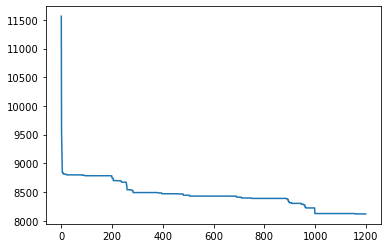

In [548]:
%%time
x, y, z = PSO_Optimizer_2(3, 500, 2000, 0.10, 0.7, 2.6, 0, 1200, True)

## F5 : Shifted Griewank’s Function

In [423]:
func_number = 4

### a) D = 50

### - Hyperparameter tuning: search candidates 

In [377]:
%%time
HO_PSO_P4_50_dim = HO_PSO_hyperparameter_optimizer(func_number)

HO_PSO_P4_50_dim.grid_search_candidates(50, [100], w = (0.05, 0.60, 0.10), 
                                                   c1 = (0.9, 2.1, 0.4), c2 = (2.2, 2.9, 0.8) , tolerance = 2)

func_number 4
n_dim 50
 
n_particles: [100] count: 1
w count: 6
c1 count: 3
c2 count: 1
 
total number of combinations: 18

 - Searching n_particles =  100 2020-05-21 12:06:03.185722

 - Searching W =  0.05 2020-05-21 12:06:03.186725
new best fit n_particles 100 W 0.05 c1 0.9 c2 2.2 fit -178.02262912706837
new best fit n_particles 100 W 0.05 c1 1.3 c2 2.2 fit -178.0425430967213

 - Searching W =  0.15 2020-05-21 12:06:17.806325
new best fit n_particles 100 W 0.15 c1 1.7 c2 2.2 fit -178.05250540417273

 - Searching W =  0.25 2020-05-21 12:06:32.323127
new best fit n_particles 100 W 0.25 c1 0.9 c2 2.2 fit -178.08276314884128

 - Searching W =  0.35 2020-05-21 12:06:54.277761

 - Searching W =  0.45 2020-05-21 12:07:20.834052

 - Searching W =  0.55 2020-05-21 12:07:52.221246
Wall time: 2min 19s


### - Hyperparameter tuning: select best candidate

In [378]:
HO_PSO_P4_50_dim.show_best_candidates(10)

,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
6,50.0,100.0,0.25,0.9,2.2,-178.082763,536.0,NaN,NaN,NaN,NaN,NaN
5,50.0,100.0,0.15,1.7,2.2,-178.052505,434.0,NaN,NaN,NaN,NaN,NaN
1,50.0,100.0,0.05,1.3,2.2,-178.042543,403.0,NaN,NaN,NaN,NaN,NaN
0,50.0,100.0,0.05,0.9,2.2,-178.022629,472.0,NaN,NaN,NaN,NaN,NaN
7,50.0,100.0,0.25,1.3,2.2,-178.020902,526.0,NaN,NaN,NaN,NaN,NaN
9,50.0,100.0,0.35,0.9,2.2,-178.010259,500.0,NaN,NaN,NaN,NaN,NaN
3,50.0,100.0,0.15,0.9,2.2,-178.008507,473.0,NaN,NaN,NaN,NaN,NaN
4,50.0,100.0,0.15,1.3,2.2,-178.004216,479.0,NaN,NaN,NaN,NaN,NaN
2,50.0,100.0,0.05,1.7,2.2,-178.001617,521.0,NaN,NaN,NaN,NaN,NaN
10,50.0,100.0,0.35,1.3,2.2,413.866225,1000.0,NaN,NaN,NaN,NaN,NaN


In [485]:
HO_PSO_P4_50_dim.select_best_candidate(4, 10)
HO_PSO_P4_50_dim.df_best_candidates

testing candidate: 6 2020-05-22 17:56:24.453696
   n_dim: 50 n_particles: 100.0 w: 0.25 c1: 0.9 c2: 2.2
testing candidate: 5 2020-05-22 17:57:47.207253
   n_dim: 50 n_particles: 100.0 w: 0.15 c1: 1.7 c2: 2.2
testing candidate: 1 2020-05-22 17:58:49.982730
   n_dim: 50 n_particles: 100.0 w: 0.05 c1: 1.3 c2: 2.2
testing candidate: 0 2020-05-22 17:59:49.622970
   n_dim: 50 n_particles: 100.0 w: 0.05 c1: 0.9 c2: 2.2


,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
6,50.0,100.0,0.25,0.9,2.2,-178.082763,536.0,-178.043894,71.717895,-136.816420,84.703104,NaN
5,50.0,100.0,0.15,1.7,2.2,-178.052505,434.0,-178.082149,-178.001784,-178.030651,0.022141,NaN
1,50.0,100.0,0.05,1.3,2.2,-178.042543,403.0,-178.056879,-178.002040,-178.025307,0.014448,NaN
0,50.0,100.0,0.05,0.9,2.2,-178.022629,472.0,-178.046222,-178.002356,-178.025386,0.015314,NaN


### - Compute optimum with PSO algorithm (best candidate)

func_number: 4
n_particles: 100 n_dim: 50
W: 0.15 c1: 1.7 c2: 2.2
func_number: 4
n_particles: 100 n_dim: 50
W: 0.15 c1: 1.7 c2: 2.2
The optimum is 
 [ 540.02020033 -322.68785455  128.00755544  -16.37773451  469.55246228
  314.02365726  -52.16868895 -577.94874745  385.76887237  -66.61740957
  138.68894664  350.26742148  506.29698643  285.30577375 -388.85832842
 -113.50414502  522.8758995   499.72758099 -107.4789968   472.15750214
 -530.39064478 -176.60930326  375.28784603 -588.58552777 -433.41014906
 -355.93436173 -361.11085307  123.74686331 -273.32584639 -360.9234604
 -580.2680329   296.74451291  -66.61355065  517.77426444  -40.90932319
  -97.42899958  415.908009     30.06947419 -355.99148676  206.43167874
  405.82827152 -577.0720674   217.63154134 -144.12575123  397.11449739
    3.08009693  251.10334218  -86.15511547 -234.95132664 -373.23065169]
The value of F at the optimum is: -179.7828813235704
Wall time: 12.8 s


(-179.7828813235704, 1000)

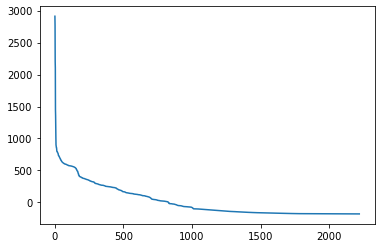

In [487]:
%%time
PSO_Optimizer(4, 50, 100, 0.15, 1.7, 2.2, 0, True)

### b) D = 500

In [424]:
HO_PSO_P4_500_dim = HO_PSO_hyperparameter_optimizer(func_number)

### - Hyperparameter tuning: search candidates 

In [431]:
%%time
HO_PSO_P4_500_dim.grid_search_candidates(500, [500], w = (0.05, 0.30, 0.10), 
                                                   c1 = (0.9, 2.1, 0.4), c2 = (2.2, 2.3, 0.1) , tolerance = 2)

func_number 4
n_dim 500
 
n_particles: [500] count: 1
w count: 3
c1 count: 3
c2 count: 1
 
total number of combinations: 9

 - Searching n_particles =  500 2020-05-21 20:12:17.653050

 - Searching W =  0.05 2020-05-21 20:12:17.653050
new best fit n_particles 500 W 0.05 c1 0.9 c2 2.2 fit 1334.467325398656
new best fit n_particles 500 W 0.05 c1 1.7 c2 2.2 fit 1311.7171138076635

 - Searching W =  0.15 2020-05-21 20:35:32.087156

 - Searching W =  0.25 2020-05-21 20:58:36.364752
Wall time: 1h 9min 18s


In [458]:
HO_PSO_P4_500_dim.show_best_candidates(10)

,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
11,500.0,500.0,0.05,1.7,2.2,1311.717114,1000.0,NaN,NaN,NaN,NaN,NaN
9,500.0,500.0,0.05,0.9,2.2,1334.467325,1000.0,NaN,NaN,NaN,NaN,NaN
10,500.0,500.0,0.05,1.3,2.2,1351.903665,1000.0,NaN,NaN,NaN,NaN,NaN
12,500.0,500.0,0.15,0.9,2.2,1383.692085,1000.0,NaN,NaN,NaN,NaN,NaN
14,500.0,500.0,0.15,1.7,2.2,1386.017916,1000.0,NaN,NaN,NaN,NaN,NaN
13,500.0,500.0,0.15,1.3,2.2,1391.240389,1000.0,NaN,NaN,NaN,NaN,NaN
15,500.0,500.0,0.25,0.9,2.2,1706.495184,1000.0,NaN,NaN,NaN,NaN,NaN
17,500.0,500.0,0.25,1.7,2.2,1717.700585,1000.0,NaN,NaN,NaN,NaN,NaN
16,500.0,500.0,0.25,1.3,2.2,13417.433432,1000.0,NaN,NaN,NaN,NaN,NaN


### - Compute optimum with PSO algorithm (best candidate)

func_number: 4
n_particles: 500 n_dim: 500
W: 0.05 c1: 1.7 c2: 2.2
func_number: 4
n_particles: 500 n_dim: 500
W: 0.05 c1: 1.7 c2: 2.2
The optimum is 
 [ 5.39924638e+02 -3.18458090e+02  1.28913761e+02 -1.68176302e+01
  4.68536924e+02  3.09608931e+02 -5.33698452e+01 -5.77378156e+02
  3.84798643e+02 -6.47540740e+01  1.33180636e+02  3.46418995e+02
  5.04641190e+02  2.89660489e+02 -3.90082502e+02 -1.12649698e+02
  5.24961096e+02  5.01808720e+02 -1.07006434e+02  4.71034353e+02
 -5.30095845e+02 -1.79164875e+02  3.70940255e+02 -5.84558703e+02
 -4.36670931e+02 -3.56585516e+02 -3.62557357e+02  1.24145941e+02
 -2.79943230e+02 -3.59581754e+02 -5.78549624e+02  2.95888278e+02
 -6.72904118e+01  5.11923256e+02 -3.89255014e+01 -1.00486605e+02
  4.21037700e+02  3.06505824e+01 -3.52304644e+02  2.09331121e+02
  4.07496493e+02 -5.77379058e+02  2.14398453e+02 -1.46110725e+02
  4.02684437e+02  2.04512269e+00  2.44857403e+02 -8.33223565e+01
 -2.37559822e+02 -3.71912244e+02 -3.67168831e+02  2.13002924e+02
 -2.

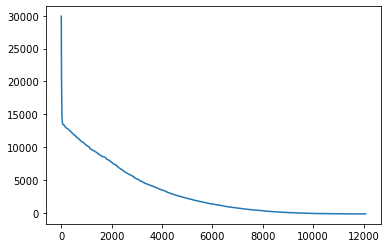

In [490]:
%%time
# F5: 3K iterations, 500 particles
_ , _  = PSO_Optimizer_2(4, 500, 500, 0.05, 1.7, 2.2, 2, 3000, plot_results = True)

## F6 : Shifted Ackley’s Function

In [427]:
func_number = 5

### a) D = 50

### - Hyperparameter tuning: search candidates 

In [380]:
%%time
HO_PSO_P5_50_dim = HO_PSO_hyperparameter_optimizer(func_number)

HO_PSO_P5_50_dim.grid_search_candidates(50, [100], w = (0.05, 0.60, 0.10), 
                                                   c1 = (0.9, 2.1, 0.4), c2 = (2.2, 2.9, 0.8) , tolerance = 2)

func_number 5
n_dim 50
 
n_particles: [100] count: 1
w count: 6
c1 count: 3
c2 count: 1
 
total number of combinations: 18

 - Searching n_particles =  100 2020-05-21 12:08:22.323511

 - Searching W =  0.05 2020-05-21 12:08:22.324508
new best fit n_particles 100 W 0.05 c1 0.9 c2 2.2 fit -119.41868744770758

 - Searching W =  0.15 2020-05-21 12:08:45.366309

 - Searching W =  0.25 2020-05-21 12:09:09.287431

 - Searching W =  0.35 2020-05-21 12:09:32.685645

 - Searching W =  0.45 2020-05-21 12:09:55.512081

 - Searching W =  0.55 2020-05-21 12:10:19.400675
Wall time: 2min 19s


In [390]:
HO_PSO_P5_50_dim.grid_search_candidates(50, [100], w = (0.10, 0.60, 0.10), 
                                                   c1 = (1.1, 2.1, 0.4), c2 = (1.7, 2.5, 0.2) , tolerance = 2)

func_number 5
n_dim 50
 
n_particles: [100] count: 1
w count: 5
c1 count: 3
c2 count: 4
 
total number of combinations: 60

 - Searching n_particles =  100 2020-05-21 13:28:20.896364

 - Searching W =  0.1 2020-05-21 13:28:20.896364
new best fit n_particles 100 W 0.1 c1 1.1 c2 1.7 fit -119.05624057873975
new best fit n_particles 100 W 0.1 c1 1.1 c2 1.9 fit -119.62342428048765

 - Searching W =  0.2 2020-05-21 13:29:54.041310
new best fit n_particles 100 W 0.2 c1 1.1 c2 1.9 fit -119.73363108409644

 - Searching W =  0.3 2020-05-21 13:31:27.852940
new best fit n_particles 100 W 0.3 c1 1.1 c2 2.1 fit -119.95937232018994

 - Searching W =  0.4 2020-05-21 13:33:00.534356

 - Searching W =  0.5 2020-05-21 13:34:32.999671


### - Hyperparameter tuning: select best candidate

In [391]:
HO_PSO_P5_50_dim.show_best_candidates(10)

,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
44,50.0,100.0,0.30,1.1,2.1,-119.959372,1000.0,NaN,NaN,NaN,NaN,NaN
52,50.0,100.0,0.30,1.9,2.1,-119.847065,1000.0,NaN,NaN,NaN,NaN,NaN
31,50.0,100.0,0.20,1.1,1.9,-119.733631,1000.0,NaN,NaN,NaN,NaN,NaN
19,50.0,100.0,0.10,1.1,1.9,-119.623424,1000.0,NaN,NaN,NaN,NaN,NaN
23,50.0,100.0,0.10,1.5,1.9,-119.561186,1000.0,NaN,NaN,NaN,NaN,NaN
22,50.0,100.0,0.10,1.5,1.7,-119.499105,1000.0,NaN,NaN,NaN,NaN,NaN
75,50.0,100.0,0.50,1.9,1.9,-119.464912,1000.0,NaN,NaN,NaN,NaN,NaN
0,50.0,100.0,0.05,0.9,2.2,-119.418687,1000.0,NaN,NaN,NaN,NaN,NaN
64,50.0,100.0,0.40,1.9,2.1,-119.412034,1000.0,NaN,NaN,NaN,NaN,NaN
21,50.0,100.0,0.10,1.1,2.3,-119.393939,1000.0,NaN,NaN,NaN,NaN,NaN


In [456]:
HO_PSO_P5_50_dim.select_best_candidate(6, 20)
HO_PSO_P5_50_dim.df_best_candidates

testing candidate: 44 2020-05-22 14:49:50.507101
   n_dim: 50 n_particles: 100.0 w: 0.3 c1: 1.1 c2: 2.1
testing candidate: 52 2020-05-22 14:53:08.812152
   n_dim: 50 n_particles: 100.0 w: 0.3 c1: 1.9 c2: 2.1
testing candidate: 31 2020-05-22 14:56:28.132658
   n_dim: 50 n_particles: 100.0 w: 0.2 c1: 1.1 c2: 1.9
testing candidate: 19 2020-05-22 14:59:57.714348
   n_dim: 50 n_particles: 100.0 w: 0.1 c1: 1.1 c2: 1.9
testing candidate: 23 2020-05-22 15:03:17.488478
   n_dim: 50 n_particles: 100.0 w: 0.1 c1: 1.5 c2: 1.9
testing candidate: 22 2020-05-22 15:06:20.123076
   n_dim: 50 n_particles: 100.0 w: 0.1 c1: 1.5 c2: 1.7


,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
44,50.0,100.0,0.3,1.1,2.1,-119.959372,1000.0,-119.465180,-118.881015,-119.125289,0.193677,NaN
52,50.0,100.0,0.3,1.9,2.1,-119.847065,1000.0,-119.332409,-118.768521,-119.084047,0.149580,NaN
31,50.0,100.0,0.2,1.1,1.9,-119.733631,1000.0,-119.617768,-118.870755,-119.117754,0.158432,NaN
19,50.0,100.0,0.1,1.1,1.9,-119.623424,1000.0,-119.612500,-118.770650,-119.189891,0.183281,NaN
23,50.0,100.0,0.1,1.5,1.9,-119.561186,1000.0,-119.471425,-118.854978,-119.120600,0.166629,NaN
22,50.0,100.0,0.1,1.5,1.7,-119.499105,1000.0,-119.663968,-118.792554,-119.140219,0.228059,NaN


### - Compute optimum with PSO algorithm (best candidate)

func_number: 5
n_particles: 100 n_dim: 50
W: 0.3 c1: 1.9 c2: 2.1
func_number: 5
n_particles: 100 n_dim: 50
W: 0.3 c1: 1.9 c2: 2.1
The optimum is 
 [ 13.52261962  14.93870718 -23.32073255   4.58317704 -18.70290209
 -27.10698128   3.45494595 -22.06858404 -25.62092826 -17.2278414
  23.59384345  -1.44713955 -19.52847989  -3.62613706 -20.31890614
 -13.76087777 -10.6618273  -10.32092098 -13.41429348  30.99780192
 -19.82818541 -13.49766593  11.34663161 -12.44491346 -21.85269442
  -6.77488013 -26.60030009   2.13299501   9.61402455 -11.06609454
   3.80099359  22.74397354 -23.2796667    7.21823499 -21.18542856
 -25.97700957  23.83048655 -14.90256549  26.50799799   3.12334925
  26.02274086 -22.96971516  -5.41062594  -0.94456432 -19.05252585
  12.19936561 -17.36396895  -9.89423264  21.14325388  26.37970647]
The value of F at the optimum is: -119.1098411914152
Wall time: 8.63 s


(-119.1098411914152, 1000)

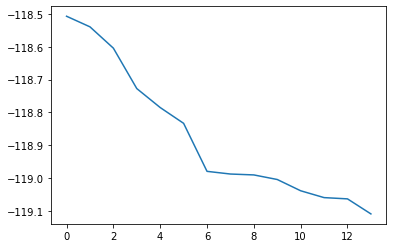

In [492]:
%%time
PSO_Optimizer(5, 50, 100, 0.3, 1.9, 2.1, 0, True)

### b) D = 500

In [428]:
%%time
HO_PSO_P5_500_dim = HO_PSO_hyperparameter_optimizer(func_number)

Wall time: 6 ms


### - Hyperparameter tuning: search candidates 

In [430]:
HO_PSO_P5_500_dim.grid_search_candidates(500, [500], w = (0.1, 0.40, 0.20), 
                                                   c1 = (1.1, 2.1, 0.4), c2 = (1.9, 2.2, 0.2) , tolerance = 2)

func_number 5
n_dim 500
 
n_particles: [500] count: 1
w count: 2
c1 count: 3
c2 count: 2
 
total number of combinations: 12

 - Searching n_particles =  500 2020-05-21 19:03:35.119575

 - Searching W =  0.1 2020-05-21 19:03:35.119575
new best fit n_particles 500 W 0.1 c1 1.1 c2 1.9 fit -118.89949454967284
new best fit n_particles 500 W 0.1 c1 1.9 c2 1.9 fit -118.91526810331419

 - Searching W =  0.3 2020-05-21 19:37:31.958305


### - Hyperparameter tuning: select best candidate

In [496]:
HO_PSO_P5_500_dim.show_best_candidates(10)

,n_dim,n_particles,w,c1,c2,fit_single_run_value,fit_single_run_iterations,fit_mult_run_min,fit_mult_run_max,fit_mult_run_avg,fit_mult_run_std,fit_mult_run_values
4,500.0,500.0,0.1,1.9,1.9,-118.915268,1000.0,NaN,NaN,NaN,NaN,NaN
0,500.0,500.0,0.1,1.1,1.9,-118.899495,1000.0,NaN,NaN,NaN,NaN,NaN
7,500.0,500.0,0.3,1.1,2.1,-118.894409,1000.0,NaN,NaN,NaN,NaN,NaN
2,500.0,500.0,0.1,1.5,1.9,-118.880618,1000.0,NaN,NaN,NaN,NaN,NaN
1,500.0,500.0,0.1,1.1,2.1,-118.878952,1000.0,NaN,NaN,NaN,NaN,NaN
9,500.0,500.0,0.3,1.5,2.1,-118.868368,1000.0,NaN,NaN,NaN,NaN,NaN
10,500.0,500.0,0.3,1.9,1.9,-118.866811,1000.0,NaN,NaN,NaN,NaN,NaN
5,500.0,500.0,0.1,1.9,2.1,-118.863145,1000.0,NaN,NaN,NaN,NaN,NaN
3,500.0,500.0,0.1,1.5,2.1,-118.841913,1000.0,NaN,NaN,NaN,NaN,NaN
11,500.0,500.0,0.3,1.9,2.1,-118.838220,1000.0,NaN,NaN,NaN,NaN,NaN


func_number: 5
n_particles: 500 n_dim: 500
W: 0.1 c1: 1.9 c2: 1.9
func_number: 5
n_particles: 500 n_dim: 500
W: 0.1 c1: 1.9 c2: 1.9
The optimum is 
 [-1.34770287e+00  4.26682934e+00  7.30190863e+00 -2.87746434e+00
 -1.06785639e+01 -1.41576674e+01  4.64548048e+00  7.39916538e+00
  4.11298462e+00 -6.57459374e+00  3.54884002e+00 -2.45851607e+00
  1.25814444e+01  4.54736132e+00 -1.84426681e+01 -1.28451637e+01
 -1.18965688e+01 -7.30657780e+00 -1.32771891e+01 -6.70631907e-01
 -7.50821938e+00  7.56261207e+00  1.12464813e+01  1.37544942e+00
 -7.66481153e+00 -3.74812039e+00  2.93854626e+00  6.41995691e+00
  3.70323371e+00 -2.30027026e+00  2.85901528e+00  1.91312968e+00
  1.52022472e+01  1.22926931e+01 -8.84715044e+00  5.49258103e+00
  9.64051549e+00  7.17448433e+00  9.73236538e+00 -3.02564440e+00
  1.57307225e+00 -1.22628464e+01  1.81383793e+01  6.64377576e+00
  5.60502805e+00  1.24723200e+00 -2.21300368e+00  1.48354513e+01
 -5.00388359e-01 -8.47926294e+00  5.94240300e+00  4.44666985e+00
 -6.03

(-118.98532401805605, 3000)

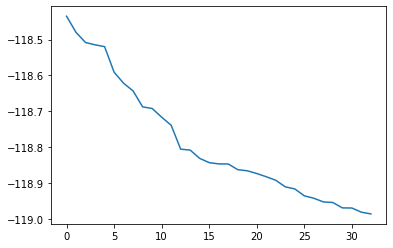

In [499]:
%%time
PSO_Optimizer_2(5, 500, 500, 0.1, 1.9, 1.9, 0, 3000, True)